<a href="https://colab.research.google.com/github/akinzayn/HPV-Research/blob/main/Penile_HPV_EDA_Note_9_%5BCategorical_Variables%5D_with_Report_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Summary Of Report**

The analyses were carried out on 24 categorical variables to test the prevelence of high and low HPV on the variables. The same analyses were carried out on the high and low HPV seperately. A chi-square test was carried out to determine the significance at a p-value of 0.05.

> Age, race, marital status, alcohol,arsenic level(6), arsenic by quantile(4) and total arsenic by quantile(1) were significant for only high HPV.

> Gender, smoking and education variable were significant for both high and low HPV. 
 
 
> None of the variables were significant for only low HPV.






Below are the lists of signficant variables and their 
  p-values.


### **Variables Signifinant For Only High HPV**


1. Age, 
   p-value (~ 0.005)

2. Race,
   p-value (~ 0.04)

3. Marital status
   p-value (~ 0.001)

4. Alcohol,
   p-value ( ~ 0)

5. Arsenic level (6),
   p-value (~ 0.01 )

6. Arsenic by quantile (4),
   p-value (~ 0.01)

7. Total arsenic by quantile(1),
   p-value (~ 0.02)

### **Variables significant for both high and Low HPV**


1. Gender: High HPV, p-value (~ 0)
           Low HPV, p-value ( ~ 0)

2. Education: High HPV, p-value (~ 0.0005)
              Low HPV, p-value (~ 0.0004)

3. Smoking: High HPV, p-value (~ 0)
            Low HPV, p-value (~ 0.009) 

# **Data Preparation**

In [ ]:
#@title
#  https://stackoverflow.com/questions/34818723/export-notebook-to-pdf-without-code



# Assuming using Firefox(57) + Win7 or Any browser where you have access to console

# Run Jupyter notebook and download the notebook in the browser: File->Download as->HTML and you will get a html page with code and output.
# Open the exported HTML with browser and activate the browser console with key F12
# Run following command in the console:

# document.querySelectorAll("div.input").forEach(function(a){a.remove()})
# The code removes all input div DOM. Then right mouse button and chose "Save Page As" and Save the "Complete page" (not single page).

# You will get a page with an associated folder in windows. Use a trick by zip the html page and then extract to unbind the associated. The folder is useless.

# Now it is a single html page without code. You can re-distribute it or print it as PDF.

# If you are not using Firefox or Windows, please adjust the above 3-6 steps.




# I think now is document.querySelectorAll("div.jp-InputArea.jp-Cell-inputArea").forEach(function(a){a.remove()}) 
# but this for example will keep the errors and markdown with maybe you don't want. 
# To remove all input cells, not only code cells you could use:
#  document.querySelectorAll("jp-Cell jp-CodeCell jp-Notebook-cell").forEach(function(a){a.remove()}) 
#  but is a method to check which columns you want and remove them checking the name of the div.

In [ ]:
# clearing workspace
rm(list = ls())


In [ ]:
# loading packages
# to install magick

install.packages("pacman")
library(pacman)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:

p_load('tidyverse', "magrittr", "readxl", "googledrive", "ggrepel")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


ggrepel installed



In [ ]:
# loading work space and displaying variables in the workspace

#load("HSV_df.RData")
# ls()
# creating backup and displaying first 6 rows

drive_deauth()
drive_user()
public_file = drive_get(as_id("1i5Z2FeC_oPyOmDfA0p6eXR1iHgOdgGYqEhLd7WrQ5SQ"))
downloaded_file = drive_download(public_file, overwrite = TRUE)

defaultW <- getOption("warn")
options(warn = -1)
HSV_df = read_excel("data_pHPV.all_rev3.xlsx")
options(warn = defaultW)

HSV_df_back_up = HSV_df
#head(HSV_df)

ℹ Not logged in as any specific Google user.

File downloaded:

• data_pHPV.all_rev3 <id: 1i5Z2FeC_oPyOmDfA0p6eXR1iHgOdgGYqEhLd7WrQ5SQ>

Saved locally as:

• data_pHPV.all_rev3.xlsx



In [ ]:
HSV_df <- as.data.frame(sapply(HSV_df, unlist))
HSV_df %<>% 
   mutate(across(where(is.character), ~na_if(., "NA")))

In [ ]:
HSV_df$RIDAGEYRCAT = cut(as.numeric(HSV_df$RIDAGEYR), breaks = c(18, 25, 45, 65, Inf), right = FALSE)


In [ ]:
# Gender
HSV_df$RIAGENDR = factor(HSV_df$RIAGENDR)
levels(HSV_df$RIAGENDR) = c("Male", "Female") 

# High HPV
HSV_df$high.HPV = factor(HSV_df$high.HPV)
levels(HSV_df$high.HPV) = c("Negative", "Positive") 

# Low HPV
HSV_df$low.HPV = factor(HSV_df$low.HPV)
levels(HSV_df$low.HPV) = c("Negative", "Positive") 

# Race
HSV_df$RIDRETH1 = factor(HSV_df$RIDRETH1)
levels(HSV_df$RIDRETH1) = c("Mex-Amer", "Other-Hisp","Non-Hisp-WT","Non-Hisp-BK", "Others") 

# Education
HSV_df$DMDEDUC2 = factor(HSV_df$DMDEDUC2)
levels(HSV_df$DMDEDUC2) = c("Below 9th Grade", "9-11 Grade","HS or GED","Some College or AA", "Graduate") 

# Marital Status
HSV_df$DMDMARTL = factor(HSV_df$DMDMARTL)
levels(HSV_df$DMDMARTL) = c("Married", "Widowed","Divorced","Separated", "Never married", "Living with partner") 

# Smoking
HSV_df$LBDCOTLC = factor(HSV_df$LBDCOTLC)
levels(HSV_df$LBDCOTLC) = c("Above limit", "Below Limit") 

# Alcohol
HSV_df$ALQ101 = factor(HSV_df$ALQ101)
levels(HSV_df$ALQ101) = c("Yes", "No") 

# Poverty Income Level
HSV_df$PIR = factor(HSV_df$PIR)
# levels(HSV_df$PIR) = c("Yes", "No") 

# Body mass index
HSV_df$BMI.f = factor(HSV_df$BMI.f)
levels(HSV_df$BMI.f) = c("Underweight", "Normal weight" , "Overweight" , "Obesity") 


# Arsenic Level(1)
HSV_df$URDUA3LC.f = factor(HSV_df$URDUA3LC.f)
levels(HSV_df$URDUA3LC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (2)
HSV_df$URDUA5LC.f = factor(HSV_df$URDUA5LC.f)
levels(HSV_df$URDUA5LC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (3)
HSV_df$URDUABLC.f = factor(HSV_df$URDUABLC.f)
levels(HSV_df$URDUABLC.f) = c("Above limit", "Below Limit") 


# Arsenic Level (4)
HSV_df$URDUDALC.f = factor(HSV_df$URDUACLC.f)  
levels(HSV_df$URDUDALC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (5)
HSV_df$URDUDALC.f = factor(HSV_df$URDUDALC.f)
levels(HSV_df$URDUDALC.f) = c("Above limit", "Below Limit") 

# Arsenic Level (6)
HSV_df$URDUMMAL.f = factor(HSV_df$URDUMMAL.f)
levels(HSV_df$URDUMMAL.f) = c("Above limit", "Below Limit") 


HSV_df_backup_postprep = HSV_df

In [ ]:

# freq function

freq = function(var, name = deparse(substitute(var))){
tbl = table( var)
freq_tbl = tbl %>% as.data.frame()
prop_tbl = as.data.frame(prop.table(tbl) * 100) %>% as.data.frame() %>% select(Freq) %>% rename( "% Freq" = Freq)
total = data.frame(var = "Total", Freq = sum(freq_tbl$Freq), "% Freq" = sum(prop_tbl$`% Freq`))
df = cbind(freq_tbl, prop_tbl)
colnames(total) = colnames(df)
df = rbind(df,total)
xname = c(name, colnames(df)[2:length(colnames(df))])
colnames(df) = xname
  return(df)
}

# ctable function

ctable_fn = function( x, y  ){

tbl = table( x, y) %>% as.data.frame.matrix()

prop_tbl = prop.table(tbl) 

tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))

prop_tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))

prop_tbl =  (prop_tbl * 100) %>% round(2)

break_point = dim(tbl)[2]
for(i in 1: dim(tbl)[2]){
  tbl[,i] = paste0(tbl[,i], " [ " , prop_tbl[,i],  "% ]" )
}


return(tbl)

}


# setting figure size

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
fig(width = 12, heigth = 6.75)

# **Analysis of Categorical Variables**

## **Gender**

### **High HPV Section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(RIAGENDR != "NA")

HSV_df %$% freq(RIAGENDR)


RIAGENDR,Freq,% Freq
<fct>,<int>,<dbl>
Male,3598,100
Female,0,0
Total,3598,100


From the frequency table above, the female is approximately 51.62 percent of the total sample and the male is approximately 48.37 percent.


In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = RIAGENDR)
tbl = HSV_df %$% table(high.HPV, RIAGENDR)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Male,Female,Total
,<chr>,<chr>,<chr>
Negative,2781 [ 77.29% ],0 [ 0% ],2781 [ 77.29% ]
Positive,817 [ 22.71% ],0 [ 0% ],817 [ 22.71% ]
Total,3598 [ 100% ],0 [ 0% ],3598 [ 100% ]




 Chi-Square Test P-value:  NaN 
Fisher Exact Test P-value:  1 





For the Chi-square test above, the p-value (0) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the gender variable. 


In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,RIAGENDR) %>% group_by(RIAGENDR, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIAGENDR) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
  mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


RIAGENDR,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Male,Negative,2781,77.29,3598,77.29,75.92,78.66
Male,Positive,817,22.71,3598,22.71,21.34,24.08



The male(5.66) percent shows the highest positive rate for high HPV.














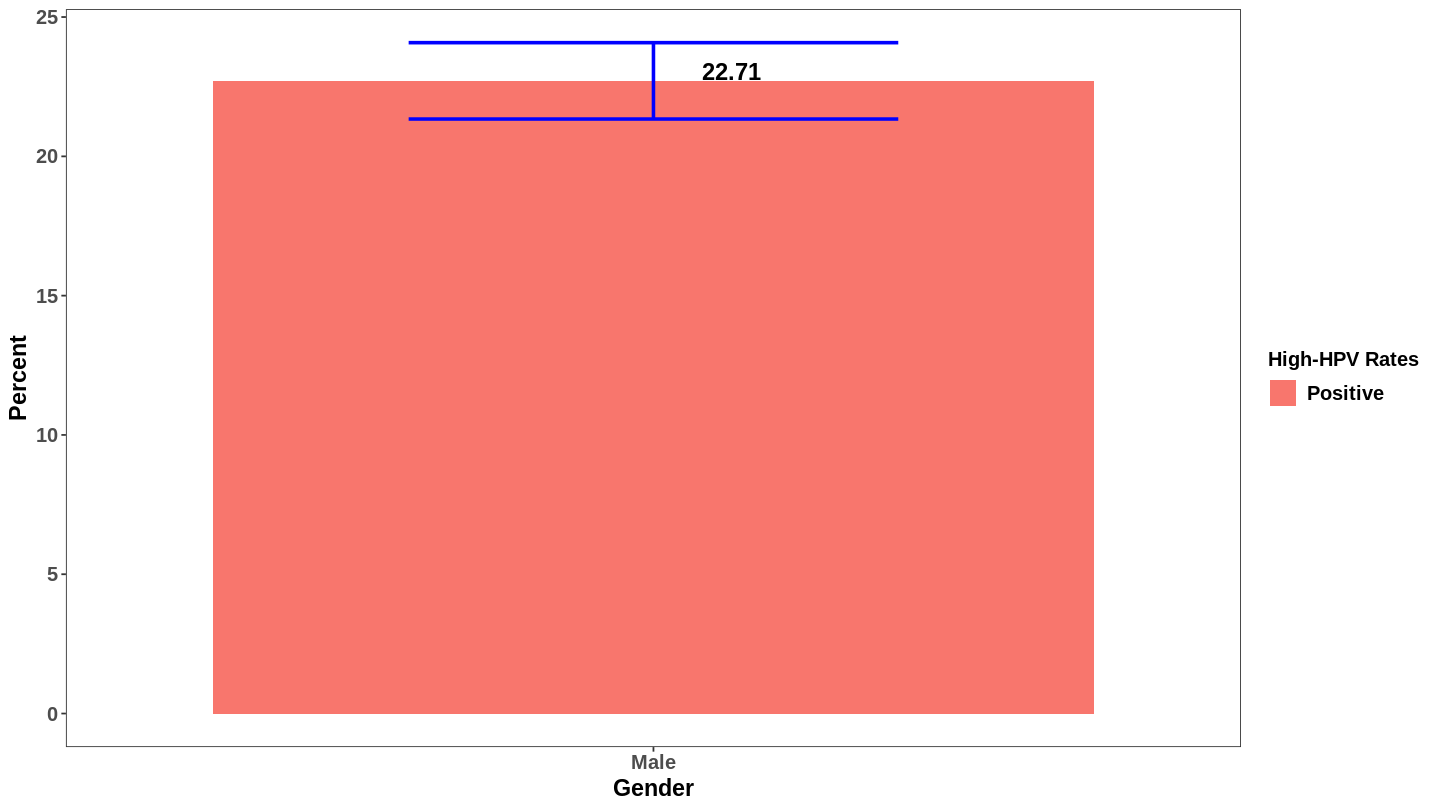

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(RIAGENDR), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Gender", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5)+
            theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))


 

The bar plot above shows the proportion of male and female that tested positve for high HPV  and their confidence intervals. The proportion of male was 5.66 percent and the proportion of female was 1.42 percent.


### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(RIAGENDR != "NA")

HSV_df %$% freq(RIAGENDR)

cat("\n\n\n")


RIAGENDR,Freq,% Freq
<fct>,<int>,<dbl>
Male,3598,100
Female,0,0
Total,3598,100


From the frequency table above, the female is approximately 51.62 percent of the total sample and the male is approximately 48.37 percent.


In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = RIAGENDR)
tbl = HSV_df %$% table(low.HPV, RIAGENDR)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")







,Male,Female,Total
,<chr>,<chr>,<chr>
Negative,3416 [ 94.94% ],0 [ 0% ],3416 [ 94.94% ]
Positive,182 [ 5.06% ],0 [ 0% ],182 [ 5.06% ]
Total,3598 [ 100% ],0 [ 0% ],3598 [ 100% ]




 Chi-Square Test P-value:  NaN 
Fisher Exact Test P-value:  1 


For the Chi-square test above, the p-value (0) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the gender variable. 





In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,RIAGENDR) %>% group_by(RIAGENDR, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIAGENDR) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var



RIAGENDR,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Male,Negative,3416,94.94,3598,94.94,94.23,95.66
Male,Positive,182,5.06,3598,5.06,4.34,5.77



The male(0.84) percent shows the highest positive rate for low HPV.














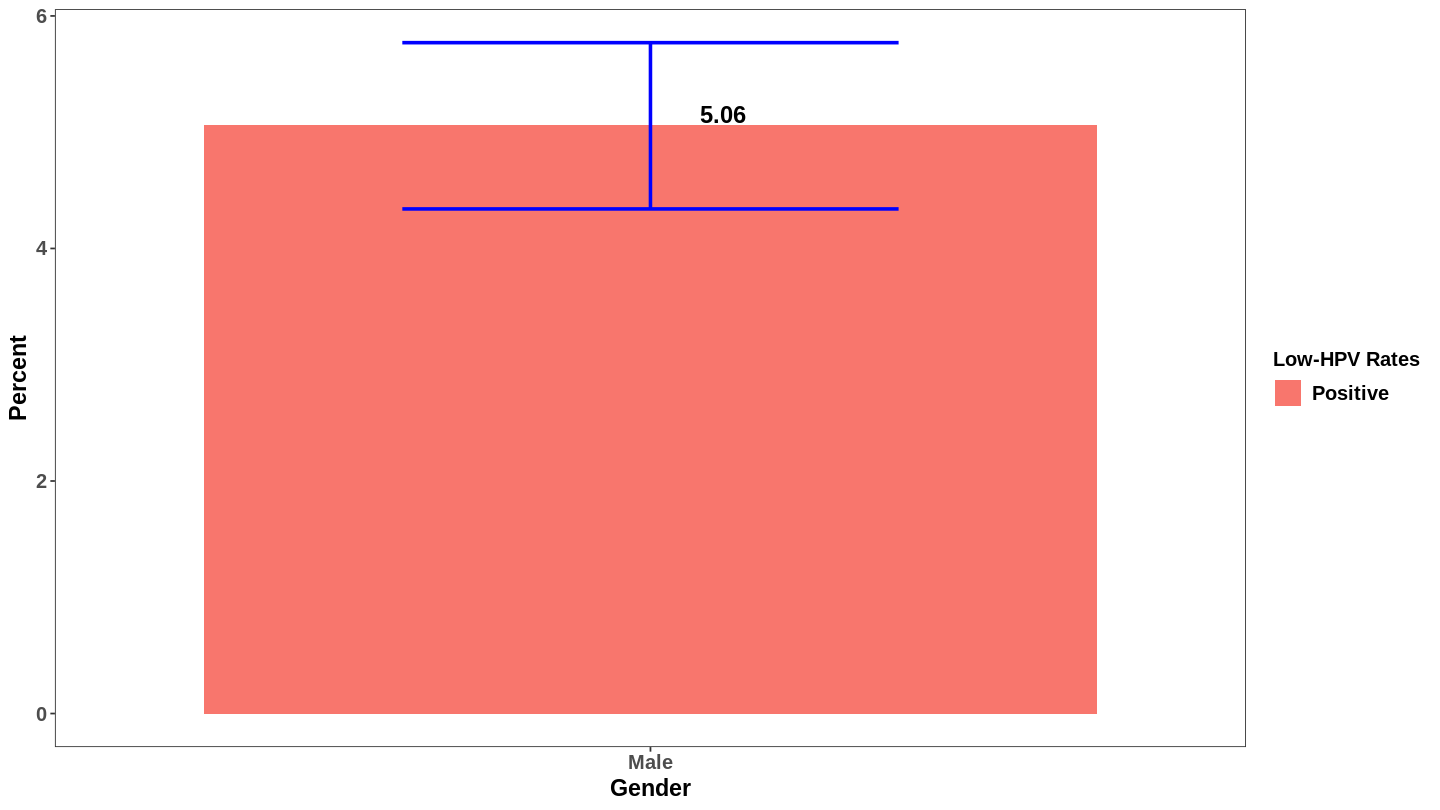

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(RIAGENDR), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Gender", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))






The bar plot above shows the proportion of male and female that tested positve for high HPV and their confidence intervals. The proportion of male was 0.84 percent and the proportion of female was 0.11 percent.



## **Age**

### **High HPV section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(RIDAGEYRCAT != "NA")

HSV_df %$% freq(RIDAGEYRCAT)



RIDAGEYRCAT,Freq,% Freq
<fct>,<int>,<dbl>
"[18,25)",689,19.14953
"[25,45)",1681,46.72040
"[45,65)",1228,34.13007
"[65,Inf)",0,0.00000
Total,3598,100.00000


From the frequency table above, the sample within the ages of 25 and 45 (38.34) percent was the highest sample collected. Followed closely by the samples within the ages of 45 and 65 (37.55) percent.

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = RIDAGEYRCAT)
tbl = HSV_df %$% table(high.HPV, RIDAGEYRCAT)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")



,"[18,25)","[25,45)","[45,65)","[65,Inf)",Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,562 [ 15.62% ],1269 [ 35.27% ],950 [ 26.4% ],0 [ 0% ],2781 [ 77.29% ]
Positive,127 [ 3.53% ],412 [ 11.45% ],278 [ 7.73% ],0 [ 0% ],817 [ 22.71% ]
Total,689 [ 19.15% ],1681 [ 46.72% ],1228 [ 34.13% ],0 [ 0% ],3598 [ 100% ]




 Chi-Square Test P-value:  NaN 
Fisher Exact Test P-value:  0.00529 


For the Chi-square test above, the p-value (0.006) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the age variable. 


In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,RIDAGEYRCAT) %>% group_by(RIDAGEYRCAT, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIDAGEYRCAT) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var



RIDAGEYRCAT,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
"[18,25)",Negative,562,15.62,689,81.57,78.67,84.46
"[18,25)",Positive,127,3.53,689,18.43,15.54,21.33
"[25,45)",Negative,1269,35.27,1681,75.49,73.43,77.55
"[25,45)",Positive,412,11.45,1681,24.51,22.45,26.57
"[45,65)",Negative,950,26.40,1228,77.36,75.02,79.70
"[45,65)",Positive,278,7.73,1228,22.64,20.30,24.98


The ages 45 to 65(4.14) percent shows the highest positive rate for high HPV.














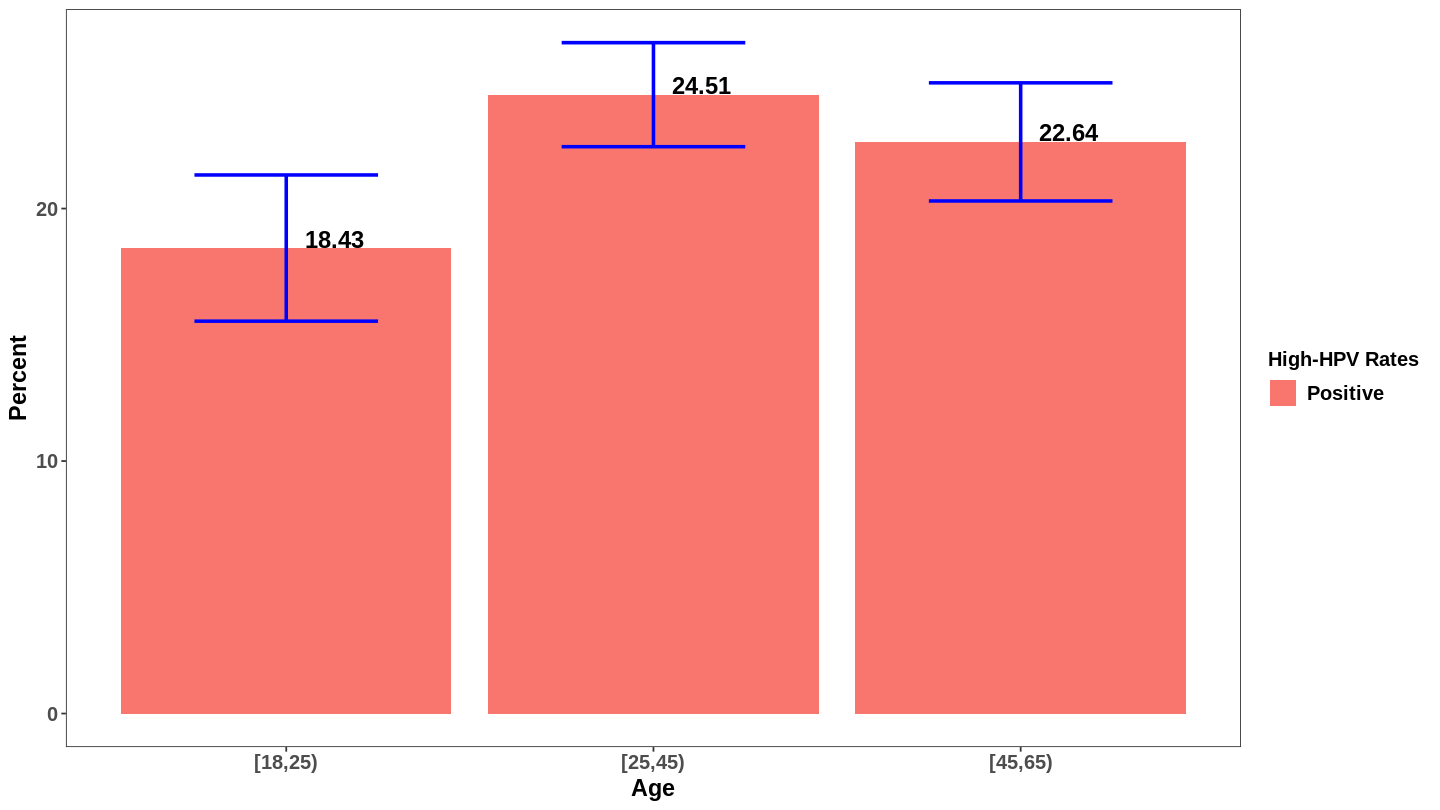

In [ ]:


high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(RIDAGEYRCAT), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Age", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the proportions of people within ages that tested positive for high HPV ages in percentage, and their confidence intervals. 2.15 percent within the ages of 18 to 25 tested positive for high HPV. 3.31 percent within the ages of 25 to 45 tested positive for high HPV. 4.14 percent within the ages of 45 to 65 tested positive for high HPV. 3.7 percent within the ages of 65 and above tested positive for high HPV.

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(RIDAGEYRCAT != "NA")

HSV_df %$% freq(RIDAGEYRCAT)




RIDAGEYRCAT,Freq,% Freq
<fct>,<int>,<dbl>
"[18,25)",689,19.14953
"[25,45)",1681,46.72040
"[45,65)",1228,34.13007
"[65,Inf)",0,0.00000
Total,3598,100.00000


From the frequency table above, the sample within the ages of 25 and 45 (38.34) percent was the highest sample collected. Followed closely by the samples within the ages of 45 and 65 (37.55) percent.

In [ ]:


cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = RIDAGEYRCAT)
tbl = HSV_df %$% table(low.HPV, RIDAGEYRCAT)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")



,"[18,25)","[25,45)","[45,65)","[65,Inf)",Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,673 [ 18.7% ],1582 [ 43.97% ],1161 [ 32.27% ],0 [ 0% ],3416 [ 94.94% ]
Positive,16 [ 0.44% ],99 [ 2.75% ],67 [ 1.86% ],0 [ 0% ],182 [ 5.06% ]
Total,689 [ 19.15% ],1681 [ 46.72% ],1228 [ 34.13% ],0 [ 0% ],3598 [ 100% ]




 Chi-Square Test P-value:  NaN 
Fisher Exact Test P-value:  0.00043 



For the Chi-square test above, the p-value (0.61) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the age variable.


In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,RIDAGEYRCAT) %>% group_by(RIDAGEYRCAT, low.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIDAGEYRCAT) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

low_hpv_var



RIDAGEYRCAT,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
"[18,25)",Negative,673,18.70,689,97.68,96.55,98.80
"[18,25)",Positive,16,0.44,689,2.32,1.20,3.45
"[25,45)",Negative,1582,43.97,1681,94.11,92.99,95.24
"[25,45)",Positive,99,2.75,1681,5.89,4.76,7.01
"[45,65)",Negative,1161,32.27,1228,94.54,93.27,95.81
"[45,65)",Positive,67,1.86,1228,5.46,4.19,6.73


The ages from 65 and above(0.66) percent shows the highest positive rate for low HPV.

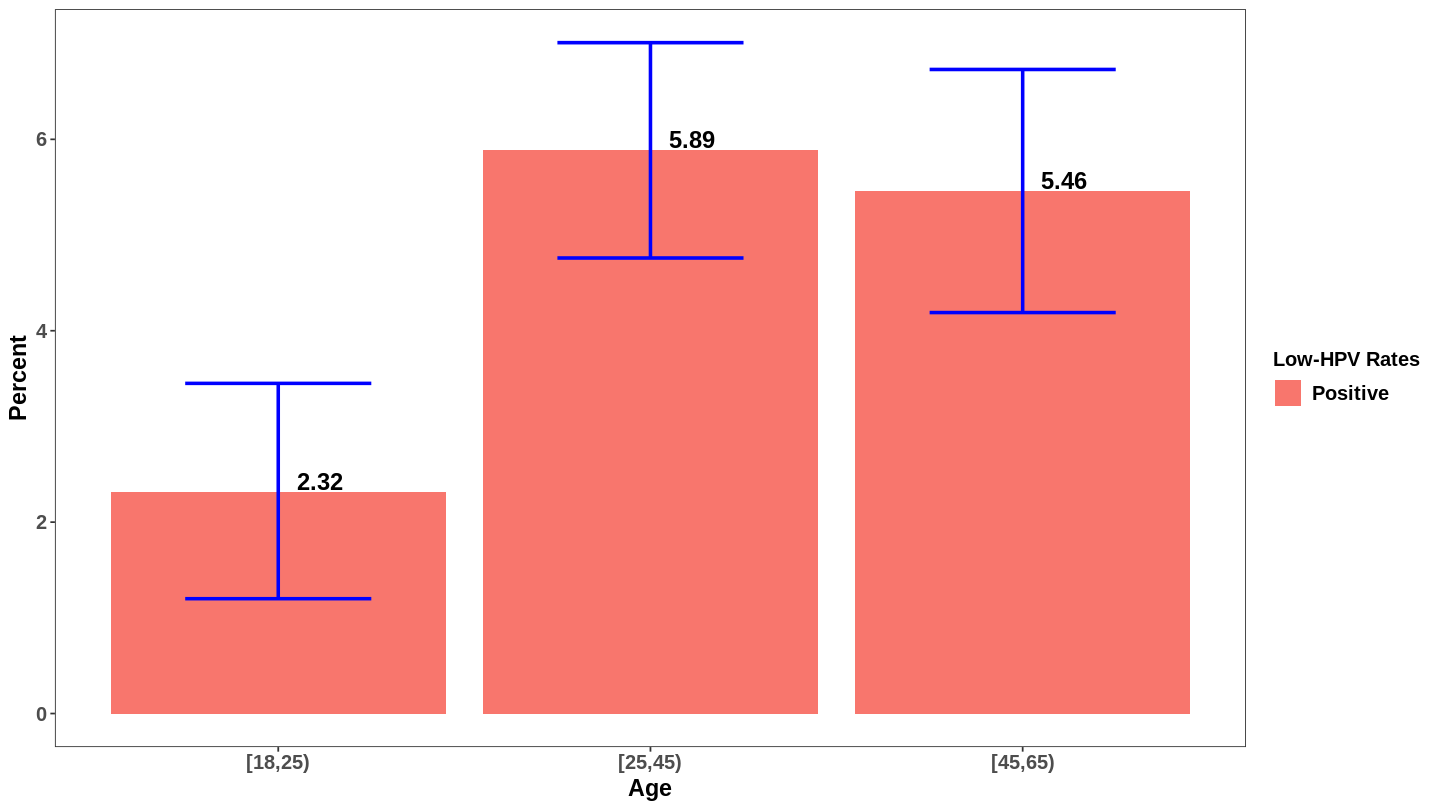

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(RIDAGEYRCAT), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Age", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The bar plot above shows the proportions of people within ages that tested positive for low HPV ages in percentage and their confidence intervals. 0.28 percent within the ages of 18-25 tested positive for low HPV. 0.46 percent within the ages of 25-45 tested positive for low HPV. 0.50 percent within the ages of 45-65 tested positive for low HPV. 0.66 percent within the ages of 65 and above tested positive for low HPV.

## **Race**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(RIDRETH1 != "NA")

HSV_df %$% freq(RIDRETH1)

cat("\n\n\n")

RIDRETH1,Freq,% Freq
<fct>,<int>,<dbl>
Mex-Amer,581,16.147860
Other-Hisp,353,9.811006
Non-Hisp-WT,1280,35.575320
Non-Hisp-BK,738,20.511395
Others,646,17.954419
Total,3598,100.000000


From the frequency table above, the non-hispanic-white (34.02) percent has the highest percent of the total sample collected. And the lowest is other-hispanic (11.38) percent.

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = RIDRETH1)
tbl = HSV_df %$% table(high.HPV, RIDRETH1)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")


,Mex-Amer,Other-Hisp,Non-Hisp-WT,Non-Hisp-BK,Others,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,483 [ 13.42% ],268 [ 7.45% ],981 [ 27.27% ],493 [ 13.7% ],556 [ 15.45% ],2781 [ 77.29% ]
Positive,98 [ 2.72% ],85 [ 2.36% ],299 [ 8.31% ],245 [ 6.81% ],90 [ 2.5% ],817 [ 22.71% ]
Total,581 [ 16.15% ],353 [ 9.81% ],1280 [ 35.58% ],738 [ 20.51% ],646 [ 17.95% ],3598 [ 100% ]


In [ ]:

cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


 Chi-Square Test P-value:  0 
Fisher Exact Test P-value:  0 





For the Chi-square test above, the p-value (0.03) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the race variable. 

In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,RIDRETH1) %>% group_by(RIDRETH1, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIDRETH1) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var




RIDRETH1,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Mex-Amer,Negative,483,13.42,581,83.13,80.09,86.18
Mex-Amer,Positive,98,2.72,581,16.87,13.82,19.91
Other-Hisp,Negative,268,7.45,353,75.92,71.46,80.38
Other-Hisp,Positive,85,2.36,353,24.08,19.62,28.54
Non-Hisp-WT,Negative,981,27.27,1280,76.64,74.32,78.96
Non-Hisp-WT,Positive,299,8.31,1280,23.36,21.04,25.68
Non-Hisp-BK,Negative,493,13.70,738,66.80,63.40,70.20
Non-Hisp-BK,Positive,245,6.81,738,33.20,29.80,36.60
Others,Negative,556,15.45,646,86.07,83.40,88.74


The non-hispanic-black(4.35) percent shows the highest positive rate for high HPV.

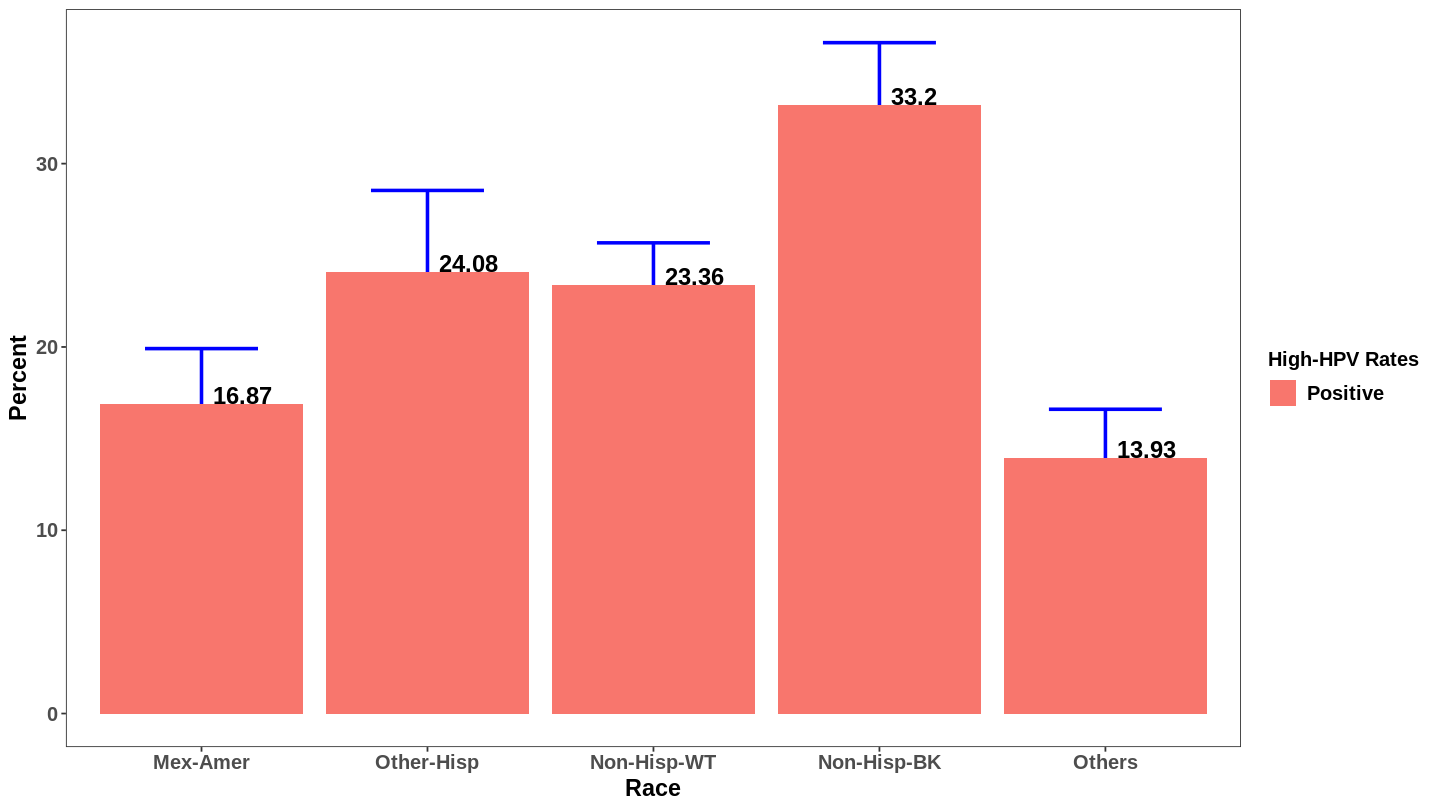

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(RIDRETH1), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Race", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The bar plot above shows the percentage proportion of the races that tested positive for high HPV and their confidence intervals. The proportion of Mexican-Hispanic was  is 2.92 percent, other-Hispanic was 2.98 percent, non-Hispanic-White-Hispanic was 3.77 percent,  non-Hispanic-Black was 4.35 percent and others was 2.56 percent.


### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(RIDRETH1 != "NA")

HSV_df %$% freq(RIDRETH1)

cat("\n\n\n")


RIDRETH1,Freq,% Freq
<fct>,<int>,<dbl>
Mex-Amer,581,16.147860
Other-Hisp,353,9.811006
Non-Hisp-WT,1280,35.575320
Non-Hisp-BK,738,20.511395
Others,646,17.954419
Total,3598,100.000000


From the frequency table above, the non-hispanic-white (34.02) percent has the highest percent of the total sample collected. And the lowest is other-hispanic (11.38) percent.

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = RIDRETH1)
tbl = HSV_df %$% table(low.HPV, RIDRETH1)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Mex-Amer,Other-Hisp,Non-Hisp-WT,Non-Hisp-BK,Others,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,567 [ 15.76% ],333 [ 9.26% ],1210 [ 33.63% ],681 [ 18.93% ],625 [ 17.37% ],3416 [ 94.94% ]
Positive,14 [ 0.39% ],20 [ 0.56% ],70 [ 1.95% ],57 [ 1.58% ],21 [ 0.58% ],182 [ 5.06% ]
Total,581 [ 16.15% ],353 [ 9.81% ],1280 [ 35.58% ],738 [ 20.51% ],646 [ 17.95% ],3598 [ 100% ]




 Chi-Square Test P-value:  6e-05 
Fisher Exact Test P-value:  5e-05 






For the Chi-square test above, the p-value (0.43) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the race variable.


In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,RIDRETH1) %>% group_by(RIDRETH1, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(RIDRETH1) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var



RIDRETH1,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Mex-Amer,Negative,567,15.76,581,97.59,96.34,98.84
Mex-Amer,Positive,14,0.39,581,2.41,1.16,3.66
Other-Hisp,Negative,333,9.26,353,94.33,91.92,96.75
Other-Hisp,Positive,20,0.56,353,5.67,3.25,8.08
Non-Hisp-WT,Negative,1210,33.63,1280,94.53,93.29,95.78
Non-Hisp-WT,Positive,70,1.95,1280,5.47,4.22,6.71
Non-Hisp-BK,Negative,681,18.93,738,92.28,90.35,94.20
Non-Hisp-BK,Positive,57,1.58,738,7.72,5.80,9.65
Others,Negative,625,17.37,646,96.75,95.38,98.12


The non-hispanic-black(0.70) percent shows the highest positive rate for low HPV.

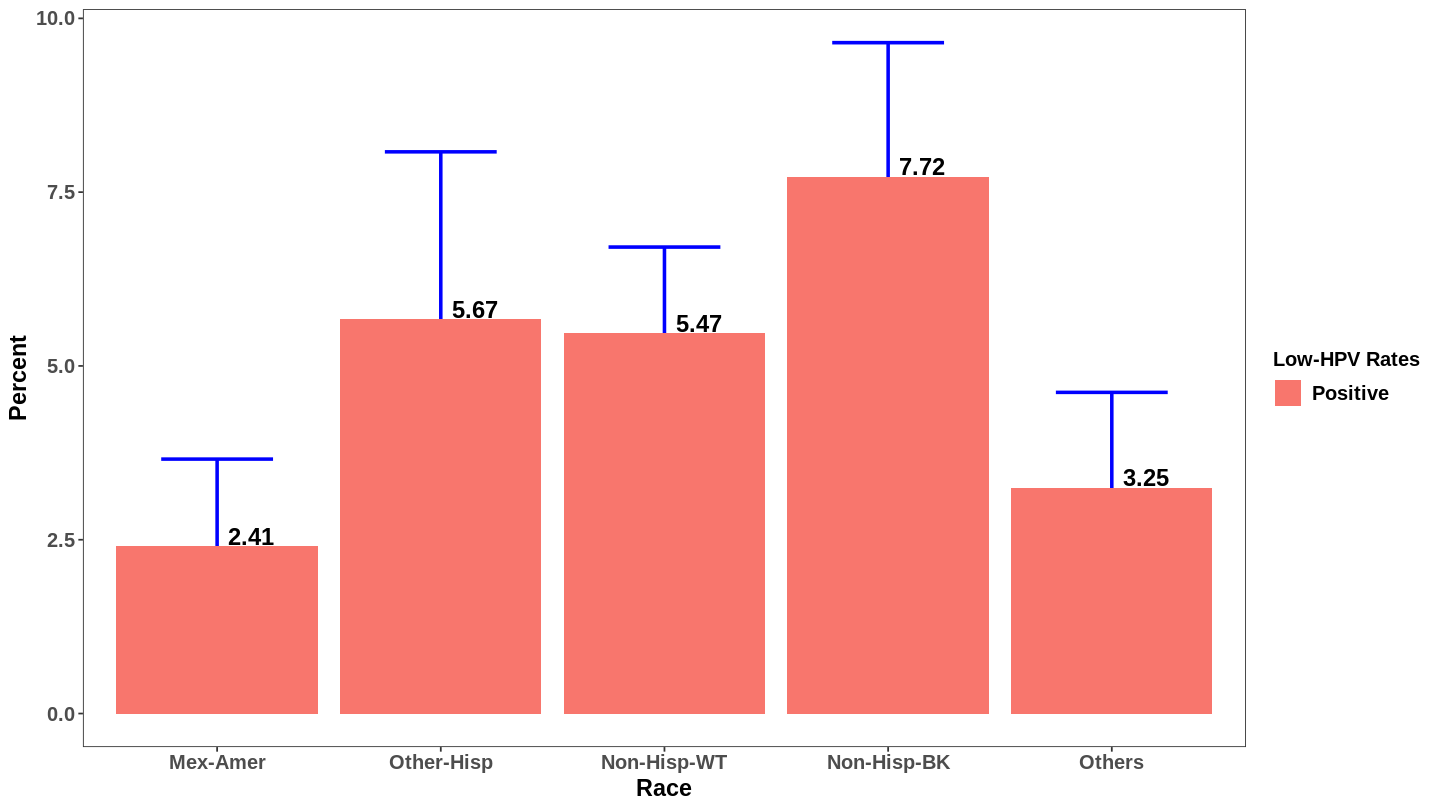

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(RIDRETH1), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Race", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() + geom_bar(position="dodge", stat="identity", width = 0.9) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The bar plot above shows the percentage proportion of the races that tested positive for high HPV and their confidence intervals. The proportion of Mexican-Hispanic was 0.39 percent, other-Hispanic was 0.48 percent, non-Hispanic-White-Hispanic was 0.42 percent,non-Hispanic-Black was 0.7 percent, and others was 0.28 percent.




### **Combined plot**

In [ ]:
low_hpv_var["low.HPV"] = rep("low HPV", length(low_hpv_var$low.HPV))
high_hpv_var["high.HPV"] = rep("high HPV", length(high_hpv_var$high.HPV))

colnames(low_hpv_var) = c("RIDRETH1",	"HPVtype",	"Count",	"OverallPercentage",	"WithinGroupSum",	"Percentage",	"Lower_CI",	"Upper_CI")
colnames(high_hpv_var) = c("RIDRETH1",	"HPVtype",	"Count",	"OverallPercentage",	"WithinGroupSum",	"Percentage",	"Lower_CI",	"Upper_CI")

hpv_var_all = rbind(high_hpv_var,low_hpv_var)

hpv_var_all



RIDRETH1,HPVtype,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Mex-Amer,high HPV,98,2.72,581,16.87,13.82,19.91
Other-Hisp,high HPV,85,2.36,353,24.08,19.62,28.54
Non-Hisp-WT,high HPV,299,8.31,1280,23.36,21.04,25.68
Non-Hisp-BK,high HPV,245,6.81,738,33.20,29.80,36.60
Others,high HPV,90,2.50,646,13.93,11.26,16.60
Mex-Amer,low HPV,14,0.39,581,2.41,1.16,3.66
Other-Hisp,low HPV,20,0.56,353,5.67,3.25,8.08
Non-Hisp-WT,low HPV,70,1.95,1280,5.47,4.22,6.71
Non-Hisp-BK,low HPV,57,1.58,738,7.72,5.80,9.65


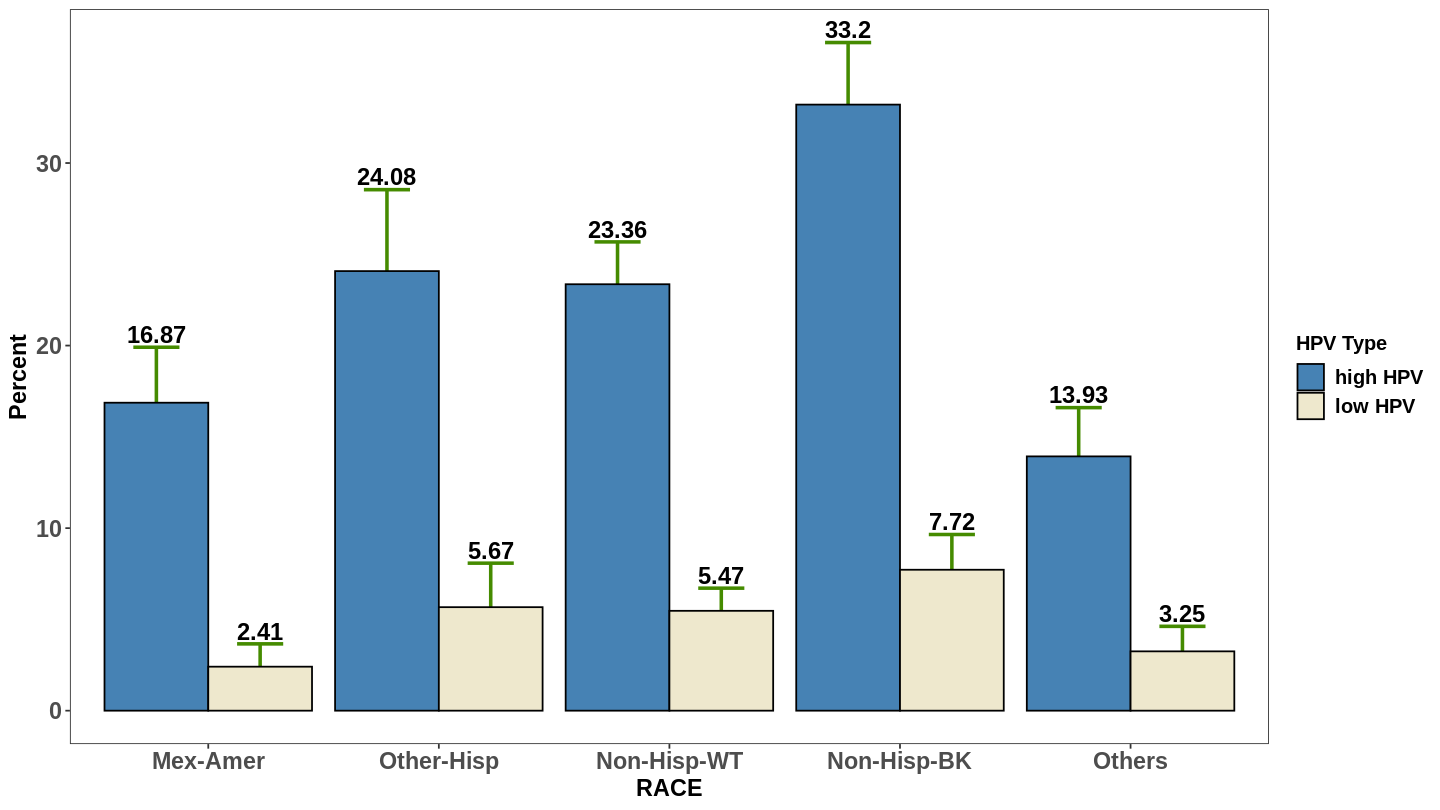

In [ ]:
race_plot = ggplot(hpv_var_all, aes(x = factor(RIDRETH1), y = Percentage, fill = factor(HPVtype))) +
  geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI),position = position_dodge(0.9), width = .4, color = "chartreuse4", size = 1)+
  labs(x = "RACE", y = "Percent", fill = "HPV Type") + 
  geom_text( aes(label = Percentage,  y = Upper_CI), position = position_dodge(.9), vjust = -0.25, fontface = "bold", size = 5) +
  geom_col(position="dodge", width = 0.9, color = "black") +
  scale_fill_manual(values = c("steelblue", "cornsilk2")) +
  theme_minimal(base_size = 18)+
  theme_bw() + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=14 ,face="bold"),
  axis.title=element_text(size=14,face="bold"))
  ggsave("racePlot",  device = "png", width = 12, height = 6.75)
race_plot

## **Education**

### **High HPV Section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(DMDEDUC2 != "NA")

HSV_df %$% freq(DMDEDUC2)


DMDEDUC2,Freq,% Freq
<fct>,<int>,<dbl>
Below 9th Grade,242,7.265086
9-11 Grade,467,14.019814
HS or GED,782,23.476434
Some College or AA,972,29.180426
Graduate,868,26.058241
Total,3331,100.000000


From the frequency table above, some College or AA (31.3) percent has the highest percentage of the total sample collected. 

In [ ]:


cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = DMDEDUC2)
tbl = HSV_df %$% table(high.HPV, DMDEDUC2)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")



,Below 9th Grade,9-11 Grade,HS or GED,Some College or AA,Graduate,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,203 [ 6.09% ],330 [ 9.91% ],542 [ 16.27% ],739 [ 22.19% ],728 [ 21.86% ],2542 [ 76.31% ]
Positive,39 [ 1.17% ],137 [ 4.11% ],240 [ 7.21% ],233 [ 6.99% ],140 [ 4.2% ],789 [ 23.69% ]
Total,242 [ 7.27% ],467 [ 14.02% ],782 [ 23.48% ],972 [ 29.18% ],868 [ 26.06% ],3331 [ 100% ]




 Chi-Square Test P-value:  0 
Fisher Exact Test P-value:  0 


For the Chi-square test above, the p-value less (0.0004) than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the education variable. 

In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,DMDEDUC2) %>% group_by(DMDEDUC2, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(DMDEDUC2) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var



DMDEDUC2,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Below 9th Grade,Negative,203,6.09,242,83.88,79.25,88.52
Below 9th Grade,Positive,39,1.17,242,16.12,11.48,20.75
9-11 Grade,Negative,330,9.91,467,70.66,66.53,74.79
9-11 Grade,Positive,137,4.11,467,29.34,25.21,33.47
HS or GED,Negative,542,16.27,782,69.31,66.08,72.54
HS or GED,Positive,240,7.21,782,30.69,27.46,33.92
Some College or AA,Negative,739,22.19,972,76.03,73.34,78.71
Some College or AA,Positive,233,6.99,972,23.97,21.29,26.66
Graduate,Negative,728,21.86,868,83.87,81.42,86.32


Students from 9th to 11th grade(4.71)  percent shows the highest positive rate for high HPV, followed closely by some college or AA(4.32) percent.

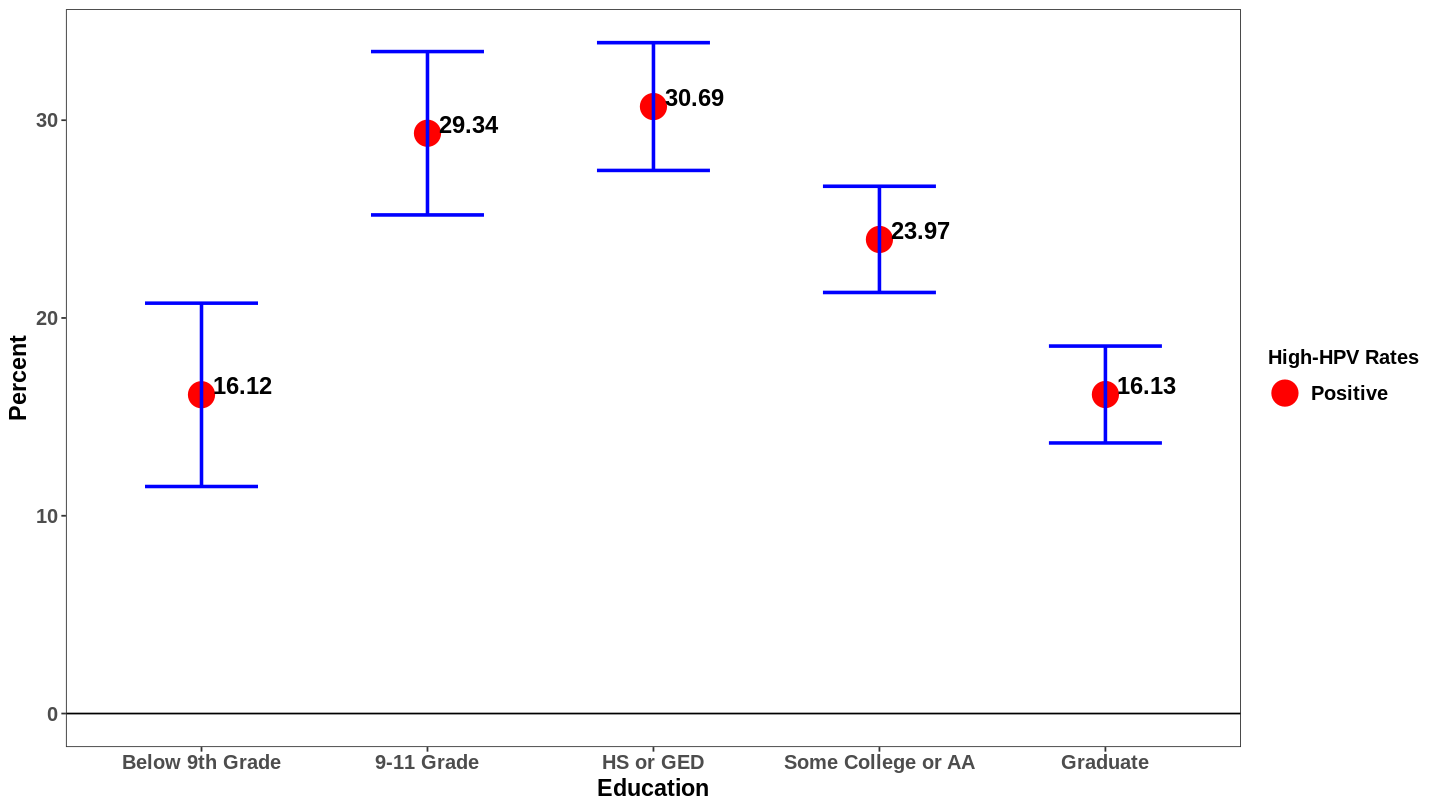

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(DMDEDUC2), y = Percentage, fill = factor(high.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
   geom_hline(yintercept = 0) +
  labs(x = "Education", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))

        

The bar plot above shows the percentage proportion of the levels of education that tested positive for high HPV and their confidence intervals. The proportion of below 9th grade was 2.77 percent, 9th to 11th grade was 4.71 percent, high school or GED was 3.81 percent, some college or AA was 4.32 percent, and graduate was 2.27 percent.




### **Low HPV Section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(DMDEDUC2 != "NA")

HSV_df %$% freq(DMDEDUC2)


DMDEDUC2,Freq,% Freq
<fct>,<int>,<dbl>
Below 9th Grade,242,7.265086
9-11 Grade,467,14.019814
HS or GED,782,23.476434
Some College or AA,972,29.180426
Graduate,868,26.058241
Total,3331,100.000000


From the frequency table above, some College or AA (31.3) percent has the highest percentage of the total sample collected. 

In [ ]:


cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = DMDEDUC2)
tbl = HSV_df %$% table(low.HPV, DMDEDUC2)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Below 9th Grade,9-11 Grade,HS or GED,Some College or AA,Graduate,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,232 [ 6.96% ],430 [ 12.91% ],743 [ 22.31% ],909 [ 27.29% ],838 [ 25.16% ],3152 [ 94.63% ]
Positive,10 [ 0.3% ],37 [ 1.11% ],39 [ 1.17% ],63 [ 1.89% ],30 [ 0.9% ],179 [ 5.37% ]
Total,242 [ 7.27% ],467 [ 14.02% ],782 [ 23.48% ],972 [ 29.18% ],868 [ 26.06% ],3331 [ 100% ]




 Chi-Square Test P-value:  0.00368 
Fisher Exact Test P-value:  0.00376 





For the Chi-square test above, the p-value (0.007) less than significance level (0.05) indicates there is evidence to conclude that the low HPV prevelence is significantly associated with the education variable. 

In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,DMDEDUC2) %>% group_by(DMDEDUC2, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(DMDEDUC2) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var

cat("\n\n\n")


DMDEDUC2,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Below 9th Grade,Negative,232,6.96,242,95.87,93.36,98.38
Below 9th Grade,Positive,10,0.30,242,4.13,1.62,6.64
9-11 Grade,Negative,430,12.91,467,92.08,89.63,94.53
9-11 Grade,Positive,37,1.11,467,7.92,5.47,10.37
HS or GED,Negative,743,22.31,782,95.01,93.49,96.54
HS or GED,Positive,39,1.17,782,4.99,3.46,6.51
Some College or AA,Negative,909,27.29,972,93.52,91.97,95.07
Some College or AA,Positive,63,1.89,972,6.48,4.93,8.03
Graduate,Negative,838,25.16,868,96.54,95.33,97.76


Students in high school or GED(0.86)  percent shows the highest positive rate for high HPV, followed closely by 9th to 11th grade(0.83)  percent.

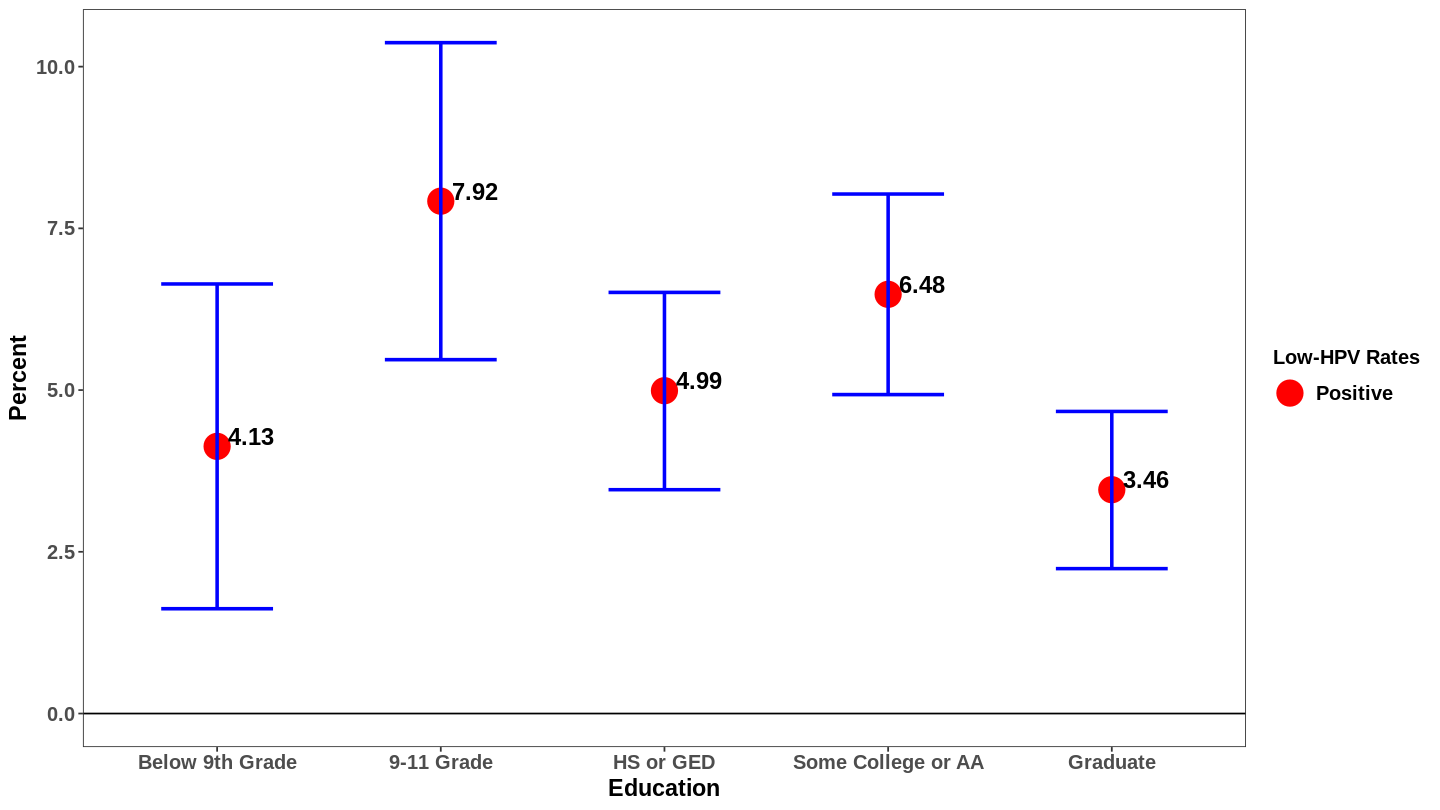

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(DMDEDUC2), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
   geom_point( colour = "red", size = 7) +
   geom_hline(yintercept = 0) +
  labs(x = "Education", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The plot above shows the percentage proportion of the levels of education that tested positive for low HPV, and their confidence intervals. The proportion of below 9th grade was 0.14 percent, 9th to 11th grade was 0.83 percent, high school or GED was 0.86 percent, some college or AA was 0.45 percent, and graduate was 0.18 percent.

##**Marital Status**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(DMDMARTL != "NA")

HSV_df %$% freq(DMDMARTL)

cat("\n\n\n")


DMDMARTL,Freq,% Freq
<fct>,<int>,<dbl>
Married,1727,51.8774407
Widowed,21,0.6308201
Divorced,243,7.2994893
Separated,81,2.4331631
Never married,866,26.0138180
Living with partner,391,11.7452688
Total,3329,100.0000000


From the frequency table above, the married group (51.39) percent has the highest percentage of the total sample collected. The lowest is the widowed (2.84) percent.

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = DMDMARTL)
tbl = HSV_df %$% table(high.HPV, DMDMARTL)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Married,Widowed,Divorced,Separated,Never married,Living with partner,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1446 [ 43.44% ],12 [ 0.36% ],155 [ 4.66% ],54 [ 1.62% ],613 [ 18.41% ],260 [ 7.81% ],2540 [ 76.3% ]
Positive,281 [ 8.44% ],9 [ 0.27% ],88 [ 2.64% ],27 [ 0.81% ],253 [ 7.6% ],131 [ 3.94% ],789 [ 23.7% ]
Total,1727 [ 51.88% ],21 [ 0.63% ],243 [ 7.3% ],81 [ 2.43% ],866 [ 26.01% ],391 [ 11.75% ],3329 [ 100% ]




 Chi-Square Test P-value:  0 
Fisher Exact Test P-value:  0 





For the Chi-square test above, the p-value (0.002) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the marital status. 

In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,DMDMARTL) %>% group_by(DMDMARTL, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(DMDMARTL) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var

cat("\n\n\n")



DMDMARTL,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Married,Negative,1446,43.44,1727,83.73,81.99,85.47
Married,Positive,281,8.44,1727,16.27,14.53,18.01
Widowed,Negative,12,0.36,21,57.14,35.98,78.31
Widowed,Positive,9,0.27,21,42.86,21.69,64.02
Divorced,Negative,155,4.66,243,63.79,57.74,69.83
Divorced,Positive,88,2.64,243,36.21,30.17,42.26
Separated,Negative,54,1.62,81,66.67,56.40,76.93
Separated,Positive,27,0.81,81,33.33,23.07,43.60
Never married,Negative,613,18.41,866,70.79,67.76,73.81


People living with partner(5.36) percent shows the highest positive rate for high HPV, followed  by divorced(4.66) percent and seperated(4.41) percent.

 







png 
  3

png 
  2

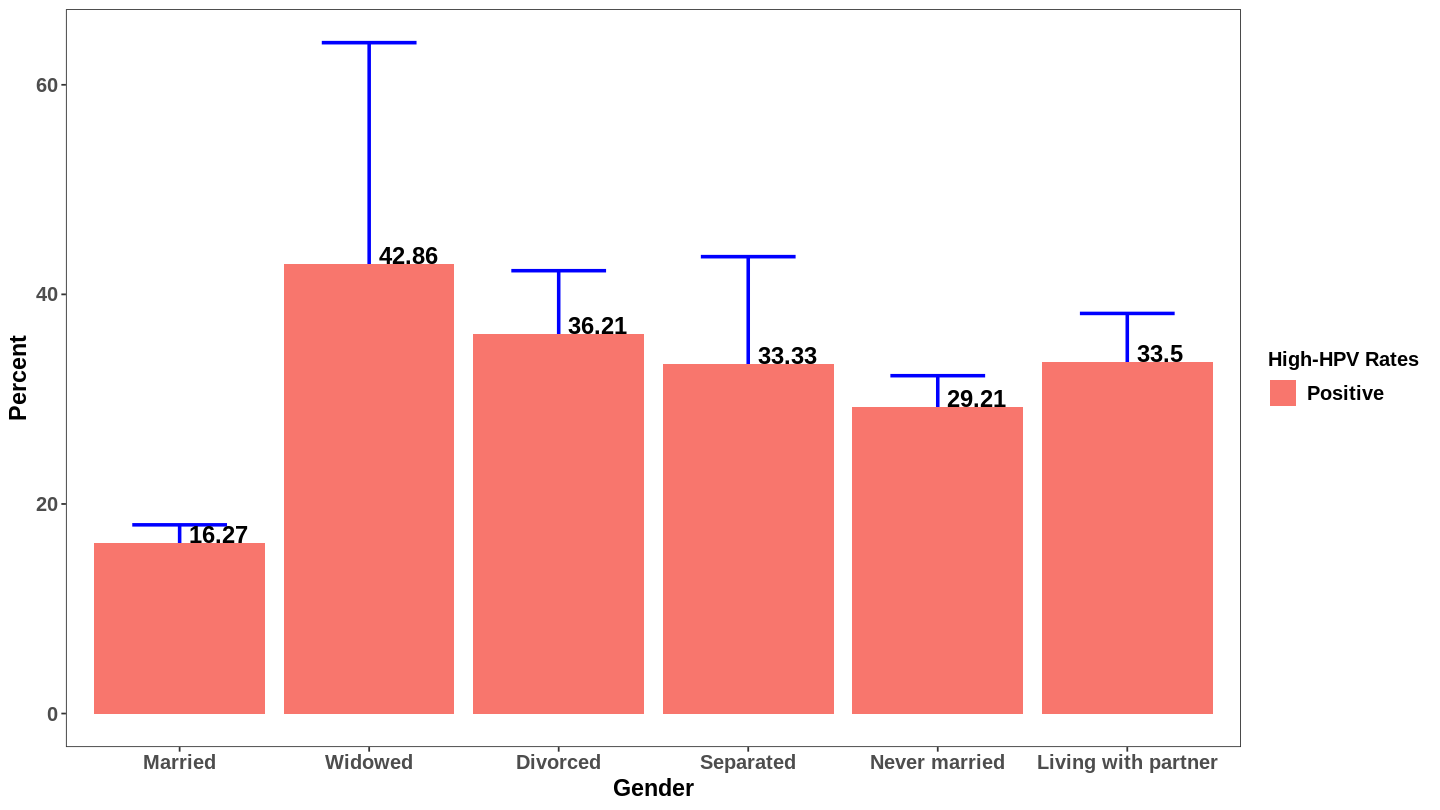

In [ ]:
fig(width = 12, heigth = 6.75)

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive") %>% filter(!is.na(DMDMARTL)) 


ggplot(high_hpv_var, aes(x = factor(DMDMARTL), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Gender", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
    geom_bar(position="dodge", stat="identity", width = 0.9) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))

dev.copy(png,'myplot.png')

dev.off()



The bar plot above shows the percentage proportion of the levels of marital status that tested positive for high HPV, and their confidence interval. The proportion of married was 2.82 percent, widowed was 4.12 percent, divorced was 4.66 percent, seperated was 4.41 percent, never married was 3.93 percent and living with partner was 5.36 percent.


### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(DMDMARTL != "NA")

HSV_df %$% freq(DMDMARTL)

cat("\n\n\n")


DMDMARTL,Freq,% Freq
<fct>,<int>,<dbl>
Married,1727,51.8774407
Widowed,21,0.6308201
Divorced,243,7.2994893
Separated,81,2.4331631
Never married,866,26.0138180
Living with partner,391,11.7452688
Total,3329,100.0000000


From the frequency table above, the married group (51.39) percent has the highest percentage of the total sample collected. The lowest is the widowed (2.84) percent.

The total sample was 8556. Of which, 51.390837 were married, 51.390837 percent were widowed, 10.787751 were divorced, 3.447873 percent were seperated, 21.727443 were never married, 9.805984 percent lived with partner.

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = DMDMARTL)
tbl = HSV_df %$% table(low.HPV, DMDMARTL)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Married,Widowed,Divorced,Separated,Never married,Living with partner,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1667 [ 50.08% ],21 [ 0.63% ],224 [ 6.73% ],75 [ 2.25% ],806 [ 24.21% ],357 [ 10.72% ],3150 [ 94.62% ]
Positive,60 [ 1.8% ],0 [ 0% ],19 [ 0.57% ],6 [ 0.18% ],60 [ 1.8% ],34 [ 1.02% ],179 [ 5.38% ]
Total,1727 [ 51.88% ],21 [ 0.63% ],243 [ 7.3% ],81 [ 2.43% ],866 [ 26.01% ],391 [ 11.75% ],3329 [ 100% ]




 Chi-Square Test P-value:  2e-05 
Fisher Exact Test P-value:  2e-05 






For the Chi-square test above, the p-value (0.14) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the marital status.


In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,DMDMARTL) %>% group_by(DMDMARTL, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(DMDMARTL) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = max(round(Lower_CI,4) * 100,0), Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


cat("\n\n\n")


DMDMARTL,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Married,Negative,1667,50.08,1727,96.53,95.66,97.39
Married,Positive,60,1.80,1727,3.47,2.61,4.34
Widowed,Negative,21,0.63,21,100.00,100.00,100.00
Divorced,Negative,224,6.73,243,92.18,88.81,95.56
Divorced,Positive,19,0.57,243,7.82,4.44,11.19
Separated,Negative,75,2.25,81,92.59,86.89,98.30
Separated,Positive,6,0.18,81,7.41,1.70,13.11
Never married,Negative,806,24.21,866,93.07,91.38,94.76
Never married,Positive,60,1.80,866,6.93,5.24,8.62


The never married group(0.81) percent shows the highest positive rate for low HPV, followed by divorced(0.76) percent. None of the widowed tested positive for low HPV.





 







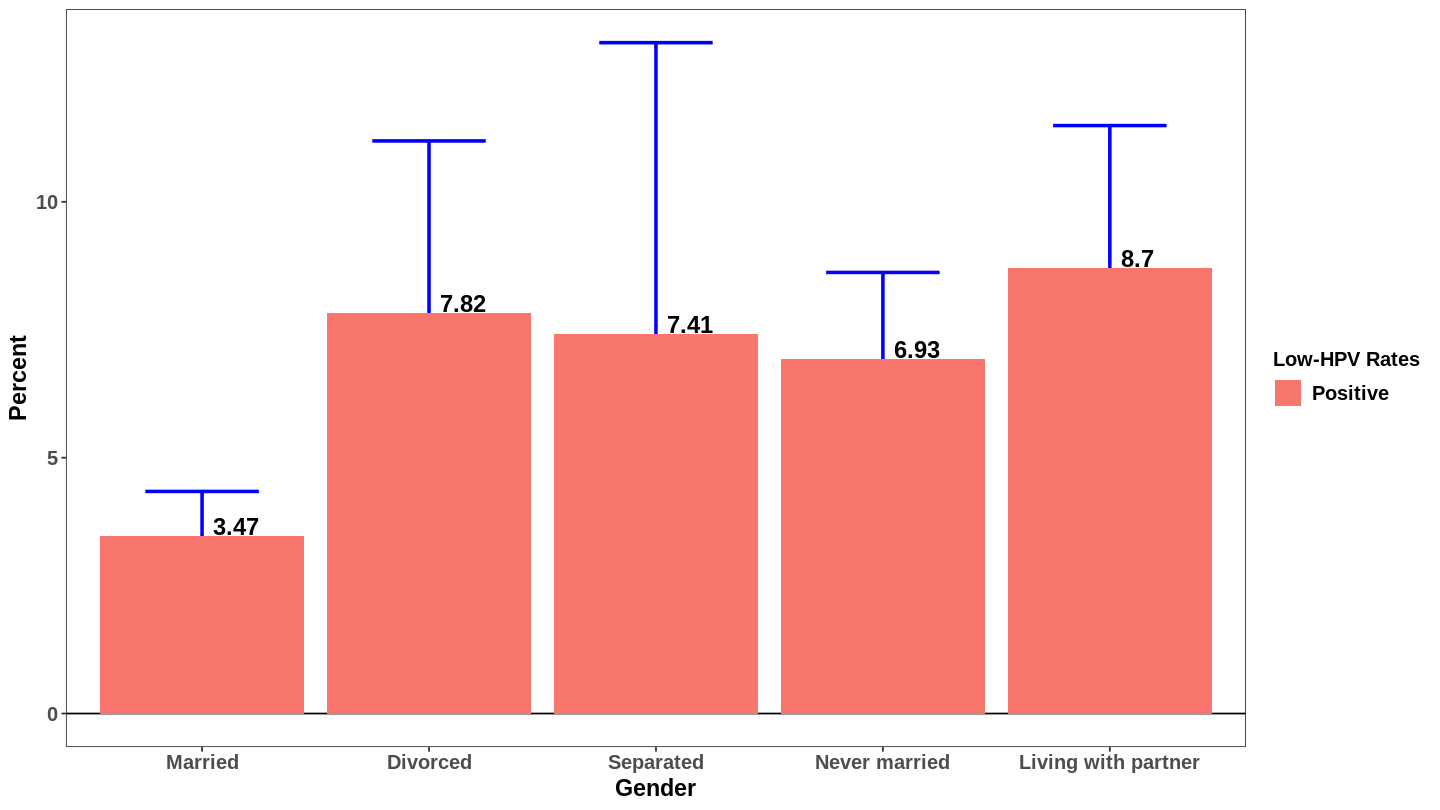

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(DMDMARTL), y = Percentage, fill = factor(low.HPV))) +
 geom_bar(position="dodge", stat="identity", width = 0.9) +
#  geom_point( colour = "red", size = 7) +
 geom_hline(yintercept = 0) +
  labs(x = "Gender", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
   geom_bar(position="dodge", stat="identity", width = 0.9) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The plot above shows the percentage proportion of the levels of marital status that tested positive for low HPV, and their confidence intervals. The proportion of married was 0.36 percent, widowed was 0.76 percent, seperated was 0.34 percent, never married was 0.81 percent and living with partner was 0.36 percent. None of the widowed tested positve for low HPV.


### **Combined Plot**

In [ ]:
low_hpv_var["low.HPV"] = rep("low HPV", length(low_hpv_var$low.HPV))
high_hpv_var["high.HPV"] = rep("high HPV", length(high_hpv_var$high.HPV))

colnames(low_hpv_var) = c("DMDMARTL",	"HPVtype",	"Count",	"OverallPercentage",	"WithinGroupSum",	"Percentage",	"Lower_CI",	"Upper_CI")
colnames(high_hpv_var) = c("DMDMARTL",	"HPVtype",	"Count",	"OverallPercentage",	"WithinGroupSum",	"Percentage",	"Lower_CI",	"Upper_CI")

hpv_var_all = rbind(high_hpv_var,low_hpv_var)

hpv_var_all

DMDMARTL,HPVtype,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Married,high HPV,281,8.44,1727,16.27,14.53,18.01
Widowed,high HPV,9,0.27,21,42.86,21.69,64.02
Divorced,high HPV,88,2.64,243,36.21,30.17,42.26
Separated,high HPV,27,0.81,81,33.33,23.07,43.60
Never married,high HPV,253,7.60,866,29.21,26.19,32.24
Living with partner,high HPV,131,3.94,391,33.50,28.83,38.18
Married,low HPV,60,1.80,1727,3.47,2.61,4.34
Divorced,low HPV,19,0.57,243,7.82,4.44,11.19
Separated,low HPV,6,0.18,81,7.41,1.70,13.11


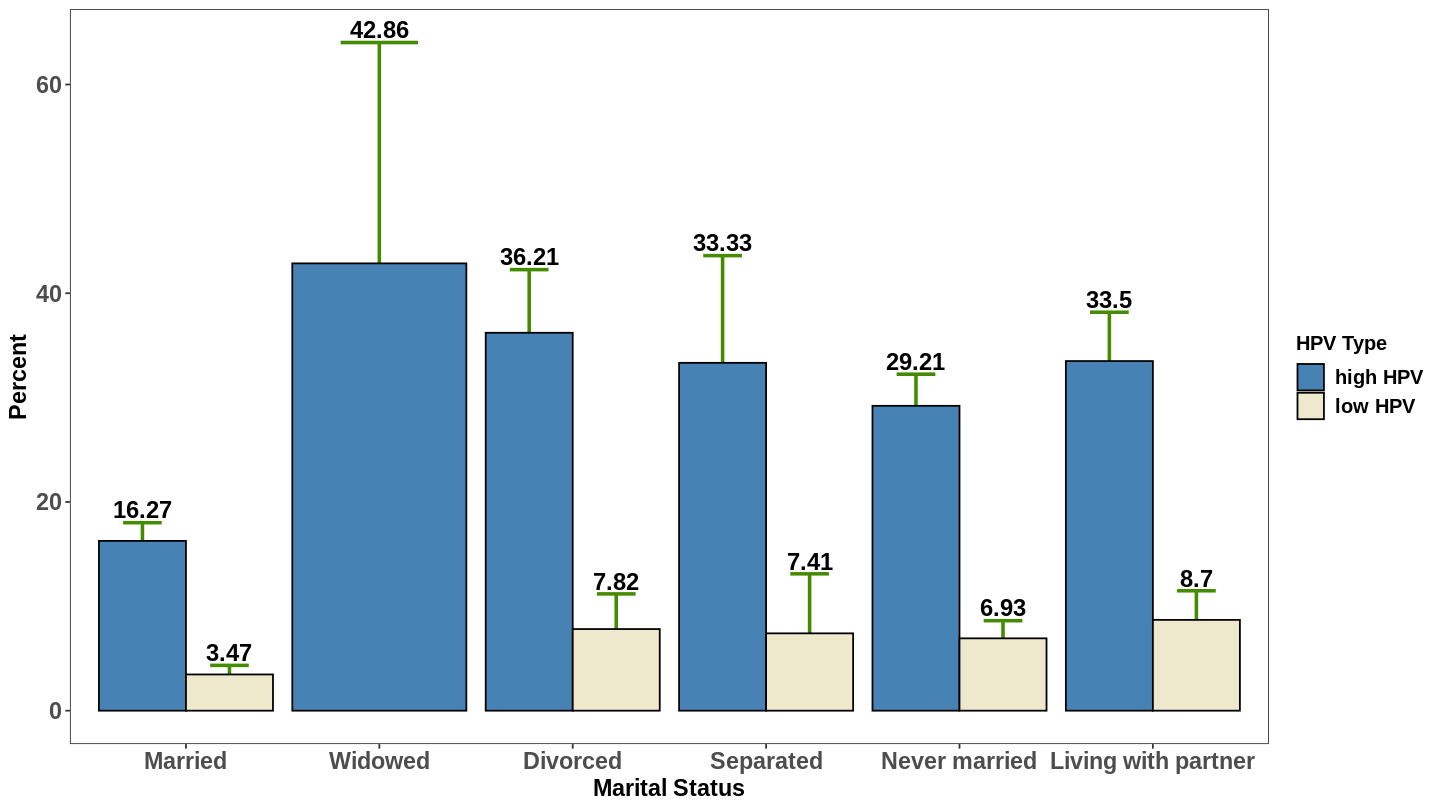

In [ ]:
marital_plot = ggplot(hpv_var_all, aes(x = factor(DMDMARTL), y = Percentage, fill = factor(HPVtype))) +
  geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI),position = position_dodge(0.9), width = .4, color = "chartreuse4", size = 1)+
  labs(x = "Marital Status", y = "Percent", fill = "HPV Type") + 
  geom_text( aes(label = Percentage,  y = Upper_CI), position = position_dodge(.9), vjust = -0.25, fontface = "bold", size = 5) +
  geom_col(position="dodge", width = 0.9, color = "black") +
  scale_fill_manual(values = c("steelblue", "cornsilk2")) +
  theme_minimal(base_size = 18)+
  theme_bw() + 
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=14 ,face="bold"),
  axis.title=element_text(size=14,face="bold"))
  ggsave("maritalPlot",  device = "pdf", width = 12, height = 6.75)
marital_plot

## **Smoking**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(LBDCOTLC != "NA")

HSV_df %$% freq(LBDCOTLC)

cat("\n\n\n")




LBDCOTLC,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,2614,76.12114
Below Limit,820,23.87886
Total,3434,100.00000


From the frequency table above, the above detection (69.91) percent has the highest percentage of the total sample collected. 

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = LBDCOTLC)
tbl = HSV_df %$% table(high.HPV, LBDCOTLC)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,1948 [ 56.73% ],710 [ 20.68% ],2658 [ 77.4% ]
Positive,666 [ 19.39% ],110 [ 3.2% ],776 [ 22.6% ]
Total,2614 [ 76.12% ],820 [ 23.88% ],3434 [ 100% ]




 Chi-Square Test P-value:  0 
Fisher Exact Test P-value:  0 





For the Chi-square test above, the p-value less (0) than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the smoking variable. 

In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,LBDCOTLC) %>% group_by(LBDCOTLC, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(LBDCOTLC) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var

cat("\n\n\n")


LBDCOTLC,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,1948,56.73,2614,74.52,72.85,76.19
Above limit,Positive,666,19.39,2614,25.48,23.81,27.15
Below Limit,Negative,710,20.68,820,86.59,84.25,88.92
Below Limit,Positive,110,3.20,820,13.41,11.08,15.75


Above limit(4.09) percent shows the highest positive rate for high HPV.









 







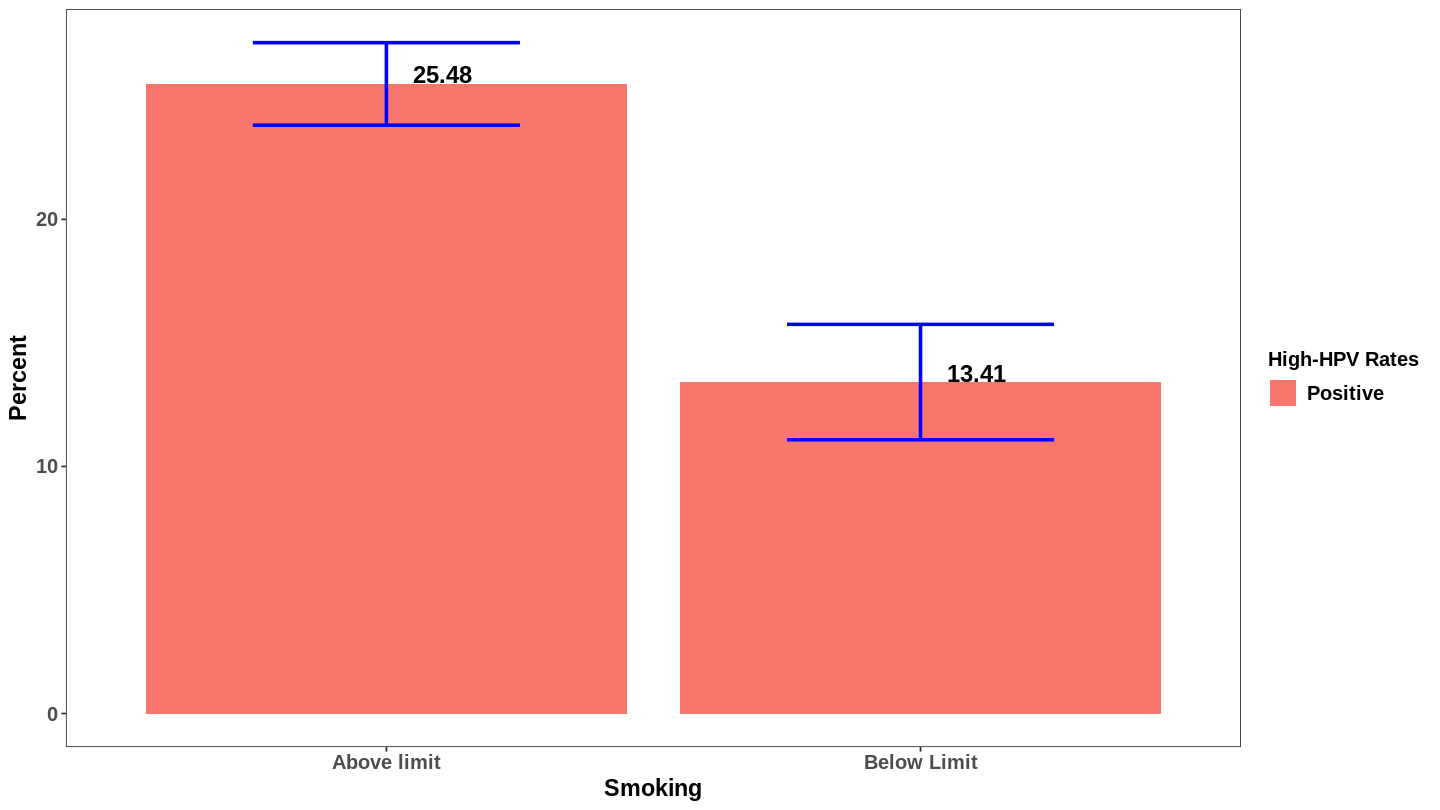

In [ ]:


high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(LBDCOTLC), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Smoking", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion of the levels of smoking that tested positive for high HPV, and their confidence intervals. The proportion above limit was 4.09 percent and below limit was 1.91 percent.

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(LBDCOTLC != "NA")

HSV_df %$% freq(LBDCOTLC)

cat("\n\n\n")


LBDCOTLC,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,2614,76.12114
Below Limit,820,23.87886
Total,3434,100.00000


From the frequency table above, the above detection (69.91) percent has the highest percentage of the total sample collected. 

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = LBDCOTLC)
tbl = HSV_df %$% table(low.HPV, LBDCOTLC)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,2467 [ 71.84% ],793 [ 23.09% ],3260 [ 94.93% ]
Positive,147 [ 4.28% ],27 [ 0.79% ],174 [ 5.07% ]
Total,2614 [ 76.12% ],820 [ 23.88% ],3434 [ 100% ]




 Chi-Square Test P-value:  0.01035 
Fisher Exact Test P-value:  0.00789 





For the Chi-square test above, the p-value (0.009) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the smoking variable. 

In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,LBDCOTLC) %>% group_by(LBDCOTLC, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(LBDCOTLC) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var

cat("\n\n\n")



LBDCOTLC,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,2467,71.84,2614,94.38,93.49,95.26
Above limit,Positive,147,4.28,2614,5.62,4.74,6.51
Below Limit,Negative,793,23.09,820,96.71,95.49,97.93
Below Limit,Positive,27,0.79,820,3.29,2.07,4.51


Above limit(0.59) percent shows the highest positive rate for low HPV.









 







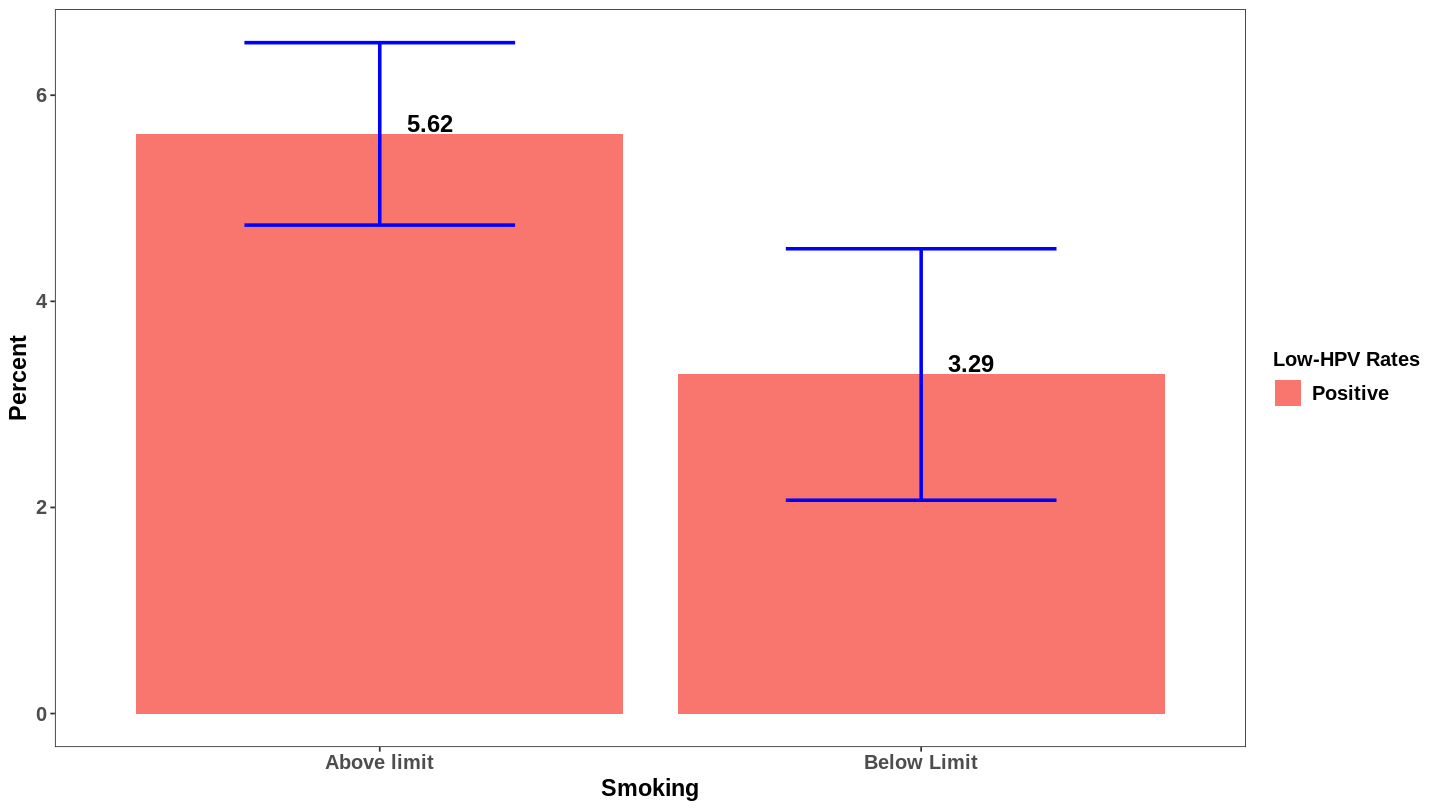

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(LBDCOTLC), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Smoking", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The bar plot above shows the percentage proportion of the levels of smoking status that tested positive for low HPV, and their confidence intervals. The proportion above limit was 0.59 percent and below limit was 0.15 percent.

## **Alcohol**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(ALQ101 != "NA")

HSV_df %$% freq(ALQ101)

cat("\n\n\n")


ALQ101,Freq,% Freq
<fct>,<int>,<dbl>
Yes,2678,80.01195
No,669,19.98805
Total,3347,100.00000


From the frequency table above, the "yes" group (70.17)  percent has the highest percentage of the total sample collected. 


In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = ALQ101)
tbl = HSV_df %$% table(high.HPV, ALQ101)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Yes,No,Total
,<chr>,<chr>,<chr>
Negative,2014 [ 60.17% ],585 [ 17.48% ],2599 [ 77.65% ]
Positive,664 [ 19.84% ],84 [ 2.51% ],748 [ 22.35% ]
Total,2678 [ 80.01% ],669 [ 19.99% ],3347 [ 100% ]




 Chi-Square Test P-value:  0 
Fisher Exact Test P-value:  0 





For the Chi-square test above, the p-value (0) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the alcohol variable. 

In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,ALQ101) %>% group_by(ALQ101, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(ALQ101) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var



ALQ101,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Yes,Negative,2014,60.17,2678,75.21,73.57,76.84
Yes,Positive,664,19.84,2678,24.79,23.16,26.43
No,Negative,585,17.48,669,87.44,84.93,89.95
No,Positive,84,2.51,669,12.56,10.05,15.07


The yes group(4.16) percent i.e took at least 12 alcohol drinks in one year, shows the highest positive rate for high HPV.










 







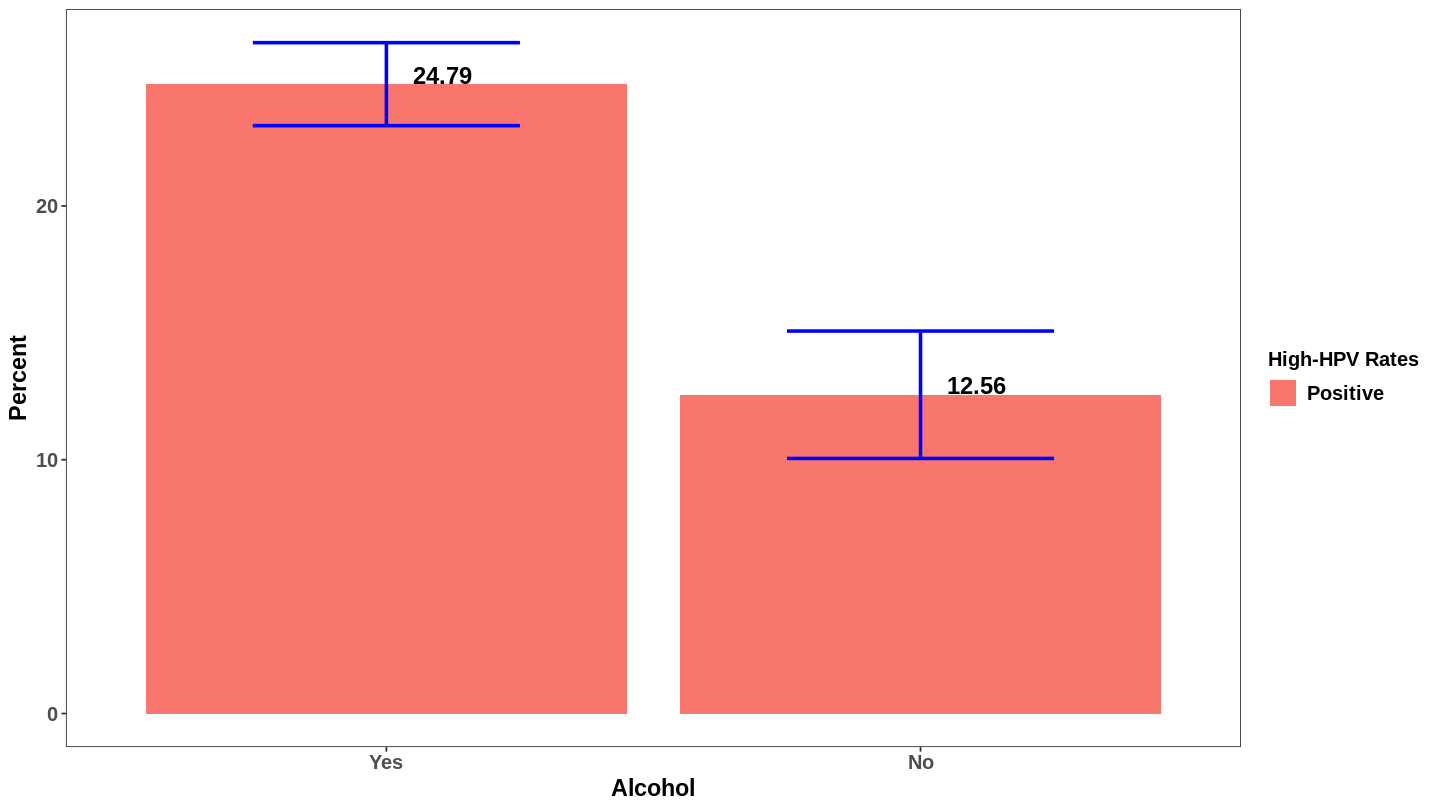

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(ALQ101), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Alcohol", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the percentage proportion of the levels of alcohol status that tested positive for high HPV, and their confidence intervals. The proportion that took at least 12 alcohol drink in a year(Yes) was 4.16 percent and the proportion that took less than 12 bottles in a year(No) was 2.09 percent.

### **Low HPV Section**

In [ ]:





HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(ALQ101 != "NA")

HSV_df %$% freq(ALQ101)

cat("\n\n\n")



ALQ101,Freq,% Freq
<fct>,<int>,<dbl>
Yes,2678,80.01195
No,669,19.98805
Total,3347,100.00000


From the frequency table above, the "yes" group (70.17)  percent has the highest percentage of the total sample collected. 


In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = ALQ101)
tbl = HSV_df %$% table(low.HPV, ALQ101)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Yes,No,Total
,<chr>,<chr>,<chr>
Negative,2530 [ 75.59% ],650 [ 19.42% ],3180 [ 95.01% ]
Positive,148 [ 4.42% ],19 [ 0.57% ],167 [ 4.99% ]
Total,2678 [ 80.01% ],669 [ 19.99% ],3347 [ 100% ]




 Chi-Square Test P-value:  0.00586 
Fisher Exact Test P-value:  0.00379 






For the Chi-square test above, the p-value (0.09) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the alcohol variable.


In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,ALQ101) %>% group_by(ALQ101, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(ALQ101) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var

cat("\n\n\n")



ALQ101,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Yes,Negative,2530,75.59,2678,94.47,93.61,95.34
Yes,Positive,148,4.42,2678,5.53,4.66,6.39
No,Negative,650,19.42,669,97.16,95.90,98.42
No,Positive,19,0.57,669,2.84,1.58,4.10


The yes group(0.54) percent i.e took at least 12 alcohol drinks in one year ,shows the highest positive rate for low HPV.










 







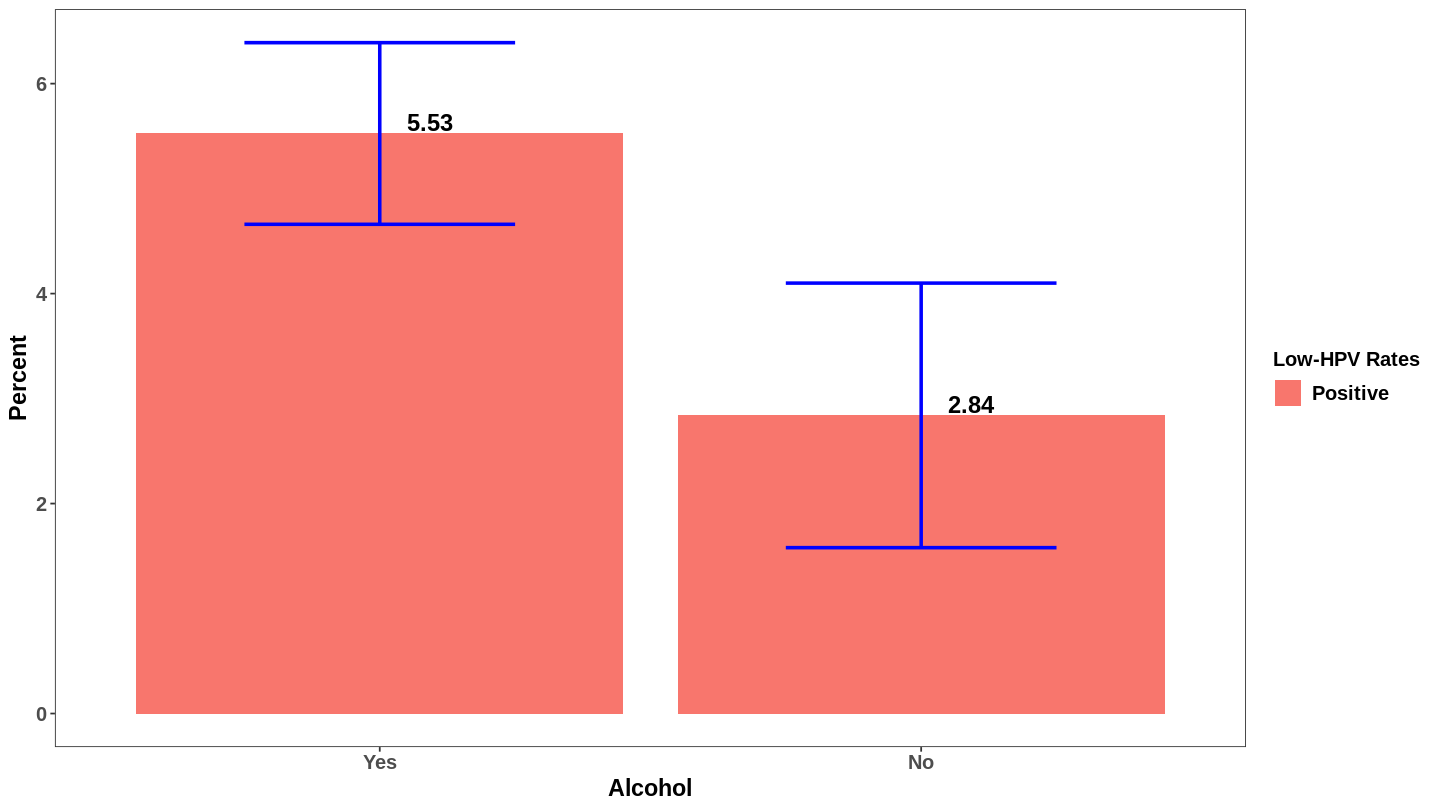

In [ ]:


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(ALQ101), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Alcohol", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))









The bar plot above shows the percentage proportion of the levels of alcohol status that tested positive for low HPV, and their confidence intervals. The proportion that took at least 12 alcohol drink in a year(Yes) was 0.54 percent and the proportion that took less than 12 bottles in a year(No) was 0.24 percent.


## **Arsenic Level(1)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUA3LC.f != "NA")

HSV_df %$% freq(URDUA3LC.f)

cat("\n\n\n")


URDUA3LC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,1221,75.13846
Below Limit,404,24.86154
Total,1625,100.00000


From the frequency table above, the above detection limit (65.53) percent has the highest percentage of the total sample collected. 

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUA3LC.f)
tbl = HSV_df %$% table(high.HPV, URDUA3LC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,901 [ 55.45% ],298 [ 18.34% ],1199 [ 73.78% ]
Positive,320 [ 19.69% ],106 [ 6.52% ],426 [ 26.22% ]
Total,1221 [ 75.14% ],404 [ 24.86% ],1625 [ 100% ]




 Chi-Square Test P-value:  1 
Fisher Exact Test P-value:  1 






For the Chi-square test above, the p-value (0.31) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic level(1) variable.


In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,URDUA3LC.f) %>% group_by(URDUA3LC.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUA3LC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var

cat("\n\n\n")



URDUA3LC.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,901,55.45,1221,73.79,71.33,76.26
Above limit,Positive,320,19.69,1221,26.21,23.74,28.67
Below Limit,Negative,298,18.34,404,73.76,69.47,78.05
Below Limit,Positive,106,6.52,404,26.24,21.95,30.53


The above detection limit group(4.54) percent shows the highest positive rate for high HPV in arsenic level(1).












 







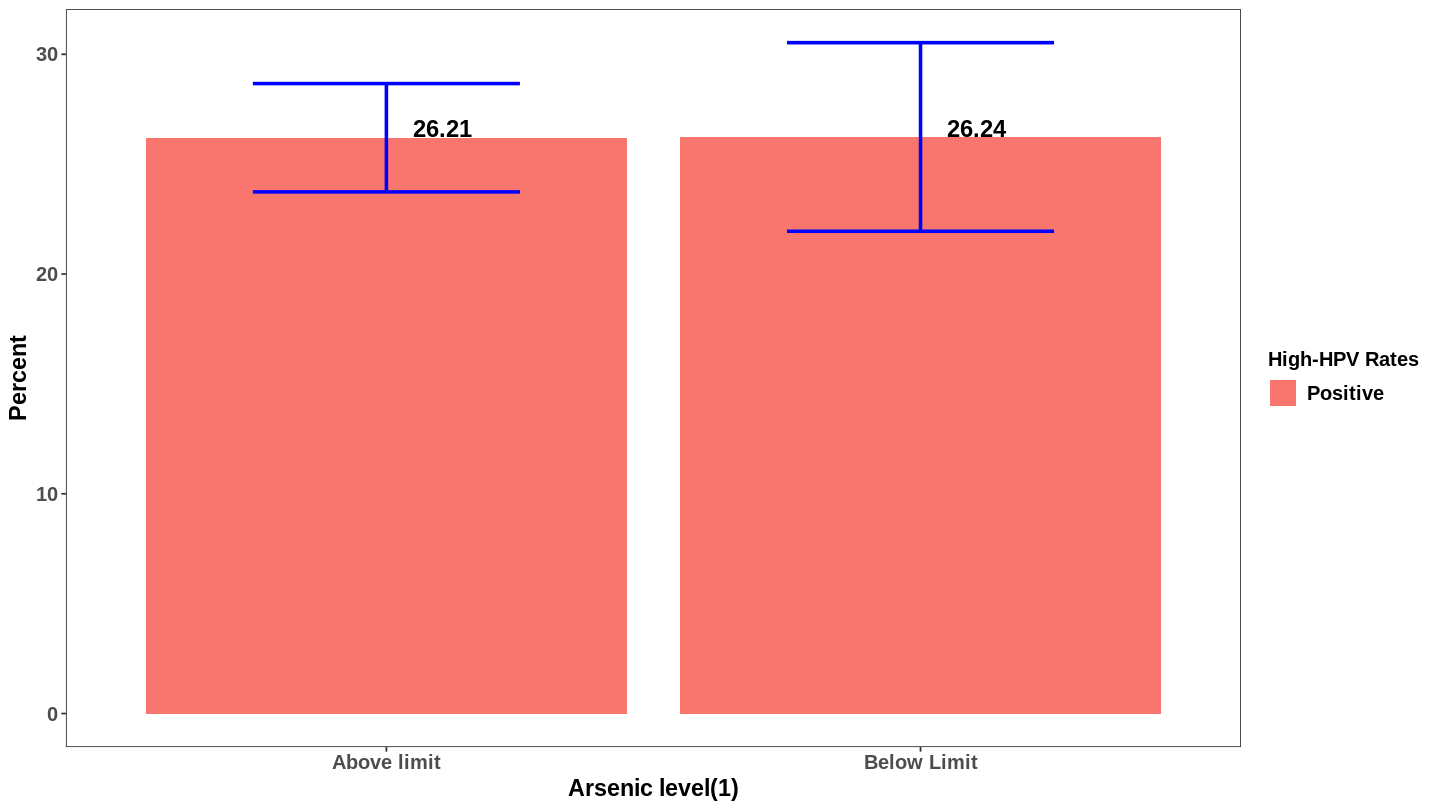

In [ ]:

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUA3LC.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(1)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the percentage proportion of arseniclevel(1) that tested positive for high HPV, and their confidence intervals. The proportion above detection limit was 4.54 percent and below detection limit was 3.79 percent.



### **Low HPV Section**

In [ ]:




HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUA3LC.f != "NA")

HSV_df %$% freq(URDUA3LC.f)

cat("\n\n\n")


URDUA3LC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,1221,75.13846
Below Limit,404,24.86154
Total,1625,100.00000


From the frequency table above, the above detection (65.53) percent has the highest percentage of the total sample collected. 

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUA3LC.f)
tbl = HSV_df %$% table(low.HPV, URDUA3LC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,1146 [ 70.52% ],384 [ 23.63% ],1530 [ 94.15% ]
Positive,75 [ 4.62% ],20 [ 1.23% ],95 [ 5.85% ]
Total,1221 [ 75.14% ],404 [ 24.86% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.44553 
Fisher Exact Test P-value:  0.46276 






For the Chi-square test above, the p-value (0.63) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(1) variable.


In [ ]:


low_hpv_var = HSV_df %>% select(low.HPV,URDUA3LC.f) %>% group_by(URDUA3LC.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUA3LC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URDUA3LC.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,1146,70.52,1221,93.86,92.51,95.20
Above limit,Positive,75,4.62,1221,6.14,4.80,7.49
Below Limit,Negative,384,23.63,404,95.05,92.93,97.16
Below Limit,Positive,20,1.23,404,4.95,2.84,7.07


The above detection limit group(0.63) percent shows the highest positive rate for low HPV in arsenic level(1).













 







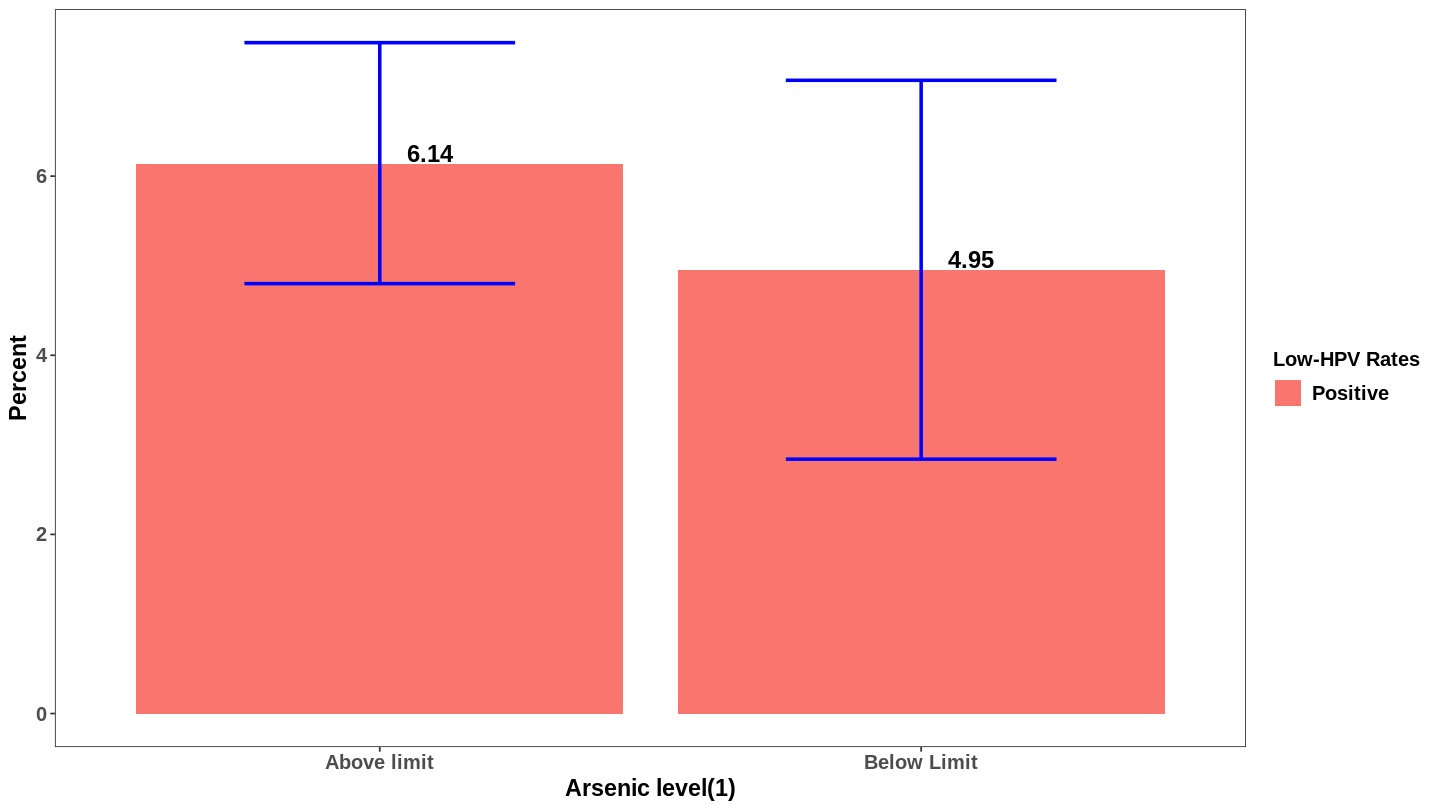

In [ ]:

cat("\n\n\n")


low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUA3LC.f), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(1)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))








The bar plot above shows the percentage proportion of arsenic level(1) that tested positive for low HPV, and their confidence intervals. The proportion above detection limit was 0.63 percent and below detection limit was 0.45 percent.

In [ ]:
# setting figure size

fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
fig(width = 12, heigth = 6.75)

## **Arsenic level(2)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUA5LC.f != "NA")

HSV_df %$% freq(URDUA5LC.f)

cat("\n\n\n")




URDUA5LC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,47,2.892308
Below Limit,1578,97.107692
Total,1625,100.000000


From the frequency table above, the below detection limit (97.53) percent has the highest percentage of the total sample collected. 

In [ ]:

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUA5LC.f)
tbl = HSV_df %$% table(high.HPV, URDUA5LC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")



,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,31 [ 1.91% ],1168 [ 71.88% ],1199 [ 73.78% ]
Positive,16 [ 0.98% ],410 [ 25.23% ],426 [ 26.22% ]
Total,47 [ 2.89% ],1578 [ 97.11% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.28469 
Fisher Exact Test P-value:  0.23844 





For the Chi-square test above, the p-value (0.48) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic level(2) variable.

In [ ]:


high_hpv_var = HSV_df %>% select(high.HPV,URDUA5LC.f) %>% group_by(URDUA5LC.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUA5LC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var

cat("\n\n\n")



URDUA5LC.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,31,1.91,47,65.96,52.41,79.50
Above limit,Positive,16,0.98,47,34.04,20.50,47.59
Below Limit,Negative,1168,71.88,1578,74.02,71.85,76.18
Below Limit,Positive,410,25.23,1578,25.98,23.82,28.15


The above detection limit group(6.25) percent shows the highest positive rate for high HPV in arsenic level(2).













 







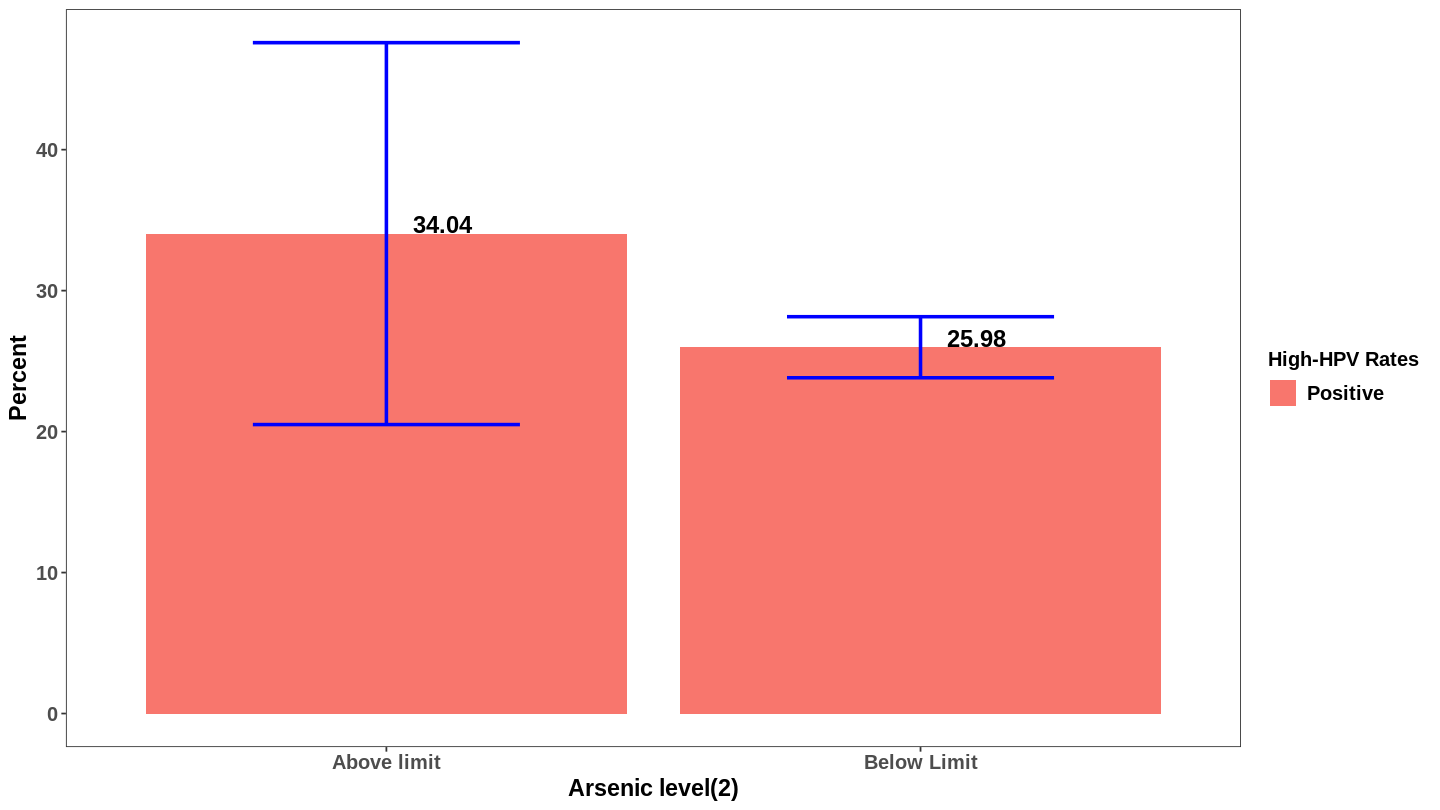

In [ ]:


high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUA5LC.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(2)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion of arsenic leve(2) that tested positive for high HPV, and their confidence intervals. The proportion above detection limit was 6.25 percent and below detection limit was 4.23 percent.

### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUA5LC.f != "NA")

HSV_df %$% freq(URDUA5LC.f)

cat("\n\n\n")


URDUA5LC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,47,2.892308
Below Limit,1578,97.107692
Total,1625,100.000000


From the frequency table above, the below detection limit (97.53) percent has the highest percentage of the total sample collected. 

In [ ]:

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUA5LC.f)
tbl = HSV_df %$% table(low.HPV, URDUA5LC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,45 [ 2.77% ],1485 [ 91.38% ],1530 [ 94.15% ]
Positive,2 [ 0.12% ],93 [ 5.72% ],95 [ 5.85% ]
Total,47 [ 2.89% ],1578 [ 97.11% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.87582 
Fisher Exact Test P-value:  1 






For the Chi-square test above, the p-value greater (1.00) than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(2) variable.


In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,URDUA5LC.f) %>% group_by(URDUA5LC.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUA5LC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URDUA5LC.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,45,2.77,47,95.74,89.97,101.52
Above limit,Positive,2,0.12,47,4.26,-1.52,10.03
Below Limit,Negative,1485,91.38,1578,94.11,92.94,95.27
Below Limit,Positive,93,5.72,1578,5.89,4.73,7.06


The above detection limit group(1.04) percent shows the highest positive rate for low HPV in arsenic level(2).













 







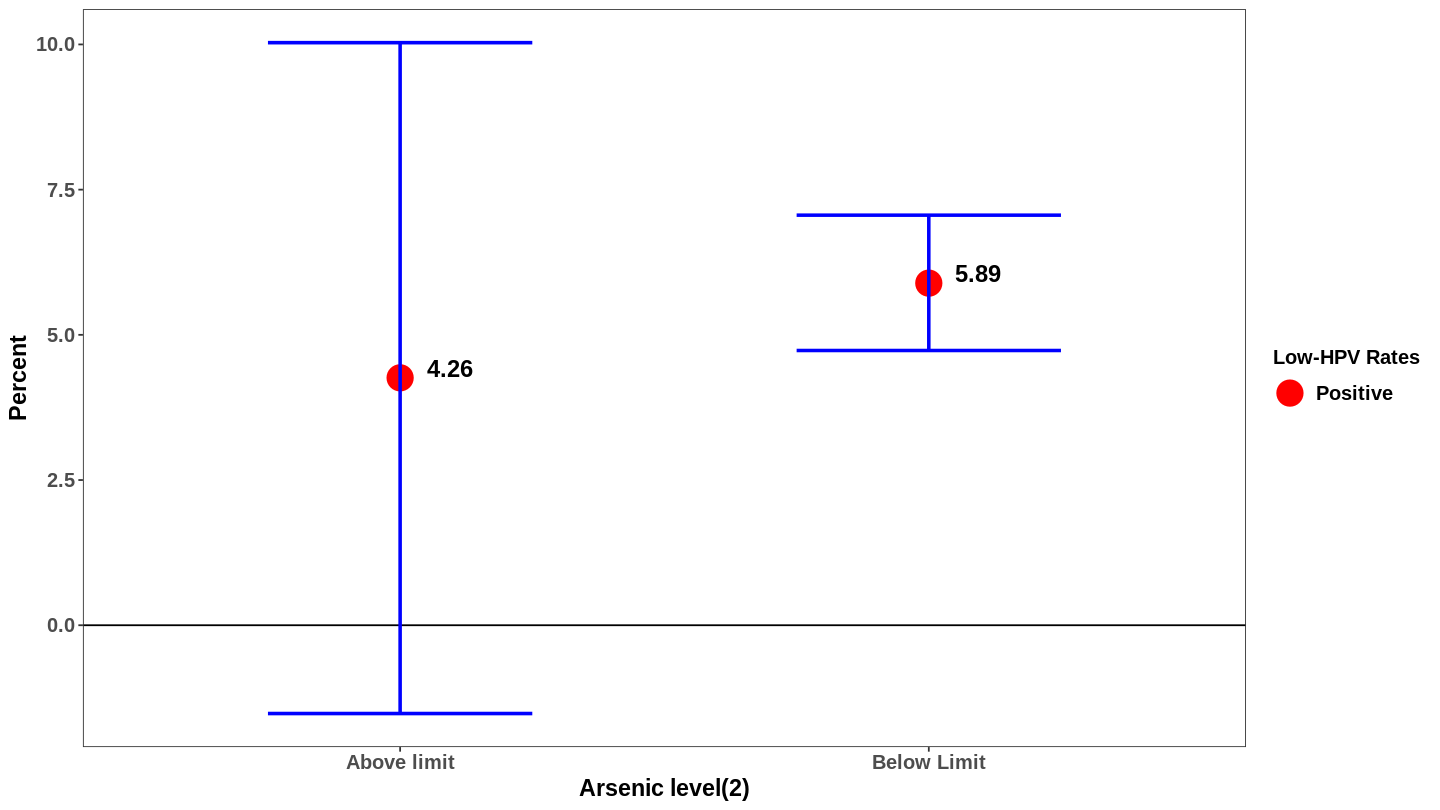

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUA5LC.f), y = Percentage, fill = factor(low.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
 geom_point( colour = "red", size = 7) +
 geom_hline(yintercept = 0) +
  labs(x = "Arsenic level(2)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))








The plot above shows the percentage proportion of arsenic level(2) that tested positive for low HPV and their confidence intervals. The proportion above detection limit was 1.04 percent and below detection limit was 0.55 percent.






# **Arsenic level(3)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUABLC.f != "NA")

HSV_df %$% freq(URDUABLC.f)

cat("\n\n\n")


URDUABLC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,789,48.55385
Below Limit,836,51.44615
Total,1625,100.00000


From the frequency table above, the below detection limit (52.89) percent has the highest percentage of the total sample collected. Followed closely by below detection limit (47.10) percent. 

In [ ]:


defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUABLC.f)
tbl = HSV_df %$% table(high.HPV, URDUABLC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,590 [ 36.31% ],609 [ 37.48% ],1199 [ 73.78% ]
Positive,199 [ 12.25% ],227 [ 13.97% ],426 [ 26.22% ]
Total,789 [ 48.55% ],836 [ 51.45% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.4075 
Fisher Exact Test P-value:  0.39742 



For the Chi-square test above, the p-value (0.97) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic level(3) variable.


In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URDUABLC.f) %>% group_by(URDUABLC.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUABLC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URDUABLC.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,590,36.31,789,74.78,71.75,77.81
Above limit,Positive,199,12.25,789,25.22,22.19,28.25
Below Limit,Negative,609,37.48,836,72.85,69.83,75.86
Below Limit,Positive,227,13.97,836,27.15,24.14,30.17


The below detection limit group(2.28) percent shows the highest positive rate for high HPV in arsenic level(3).













 







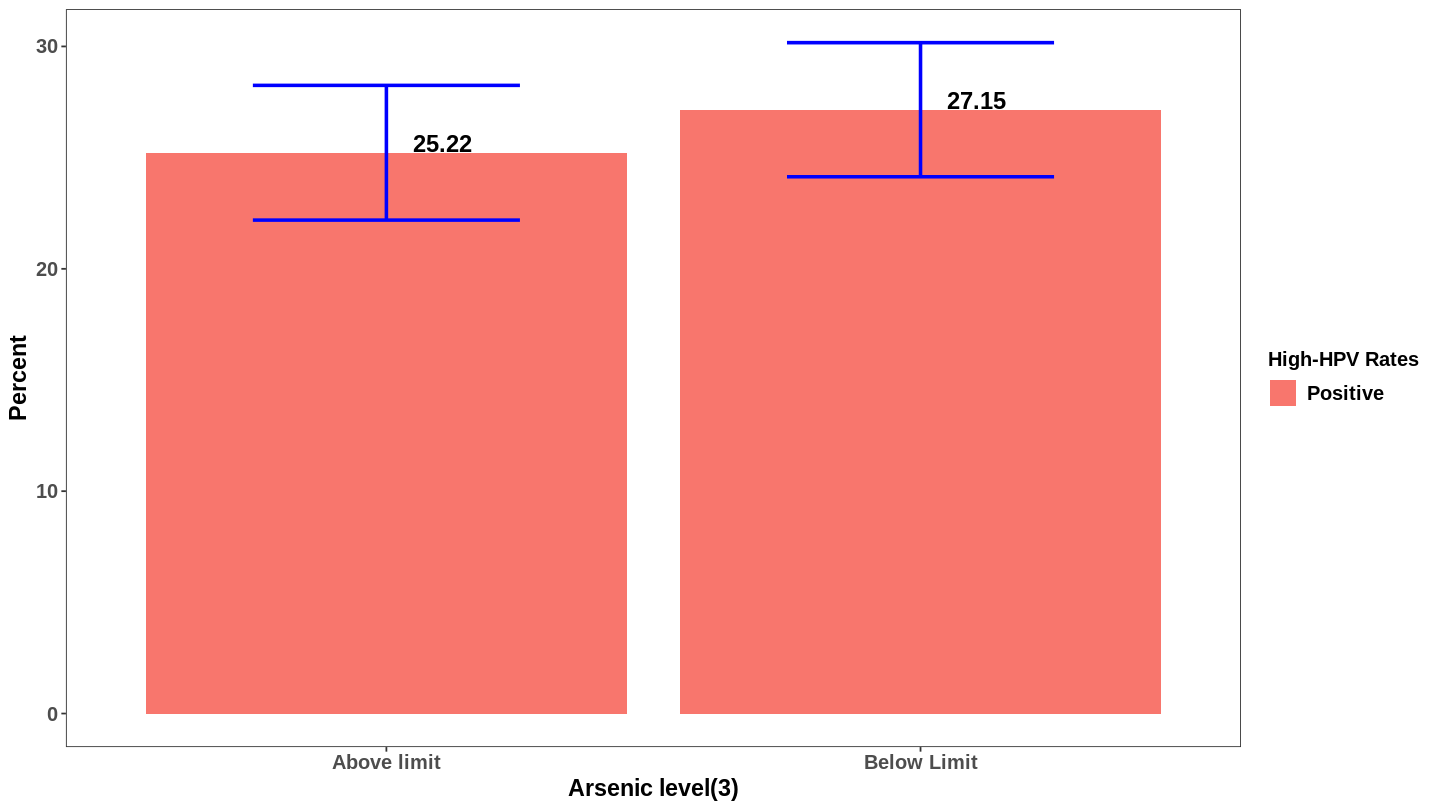

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUABLC.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(3)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))





The bar plot above shows the percentage proportion of arsenic level(3) that tested positive for high HPV, and their confidence intervals. The proportion that was above detection limit was 4.25 percent and below detection limit was 4.31 percent.

### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUABLC.f != "NA")

HSV_df %$% freq(URDUABLC.f)


URDUABLC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,789,48.55385
Below Limit,836,51.44615
Total,1625,100.00000


From the frequency table above, the below detection limit (52.89) percent has the highest percentage of the total sample collected. Followed closely by below detection limit (47.10) percent. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUABLC.f)
tbl = HSV_df %$% table(low.HPV, URDUABLC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,739 [ 45.48% ],791 [ 48.68% ],1530 [ 94.15% ]
Positive,50 [ 3.08% ],45 [ 2.77% ],95 [ 5.85% ]
Total,789 [ 48.55% ],836 [ 51.45% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.47537 
Fisher Exact Test P-value:  0.45932 


For the Chi-square test above, the p-value (1.00) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(3) variable.







In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URDUABLC.f) %>% group_by(URDUABLC.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUABLC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URDUABLC.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,739,45.48,789,93.66,91.96,95.36
Above limit,Positive,50,3.08,789,6.34,4.64,8.04
Below Limit,Negative,791,48.68,836,94.62,93.09,96.15
Below Limit,Positive,45,2.77,836,5.38,3.85,6.91


The below detection limit group(0.31) percent shows the highest positive rate for low HPV in arsenic level(3).













 







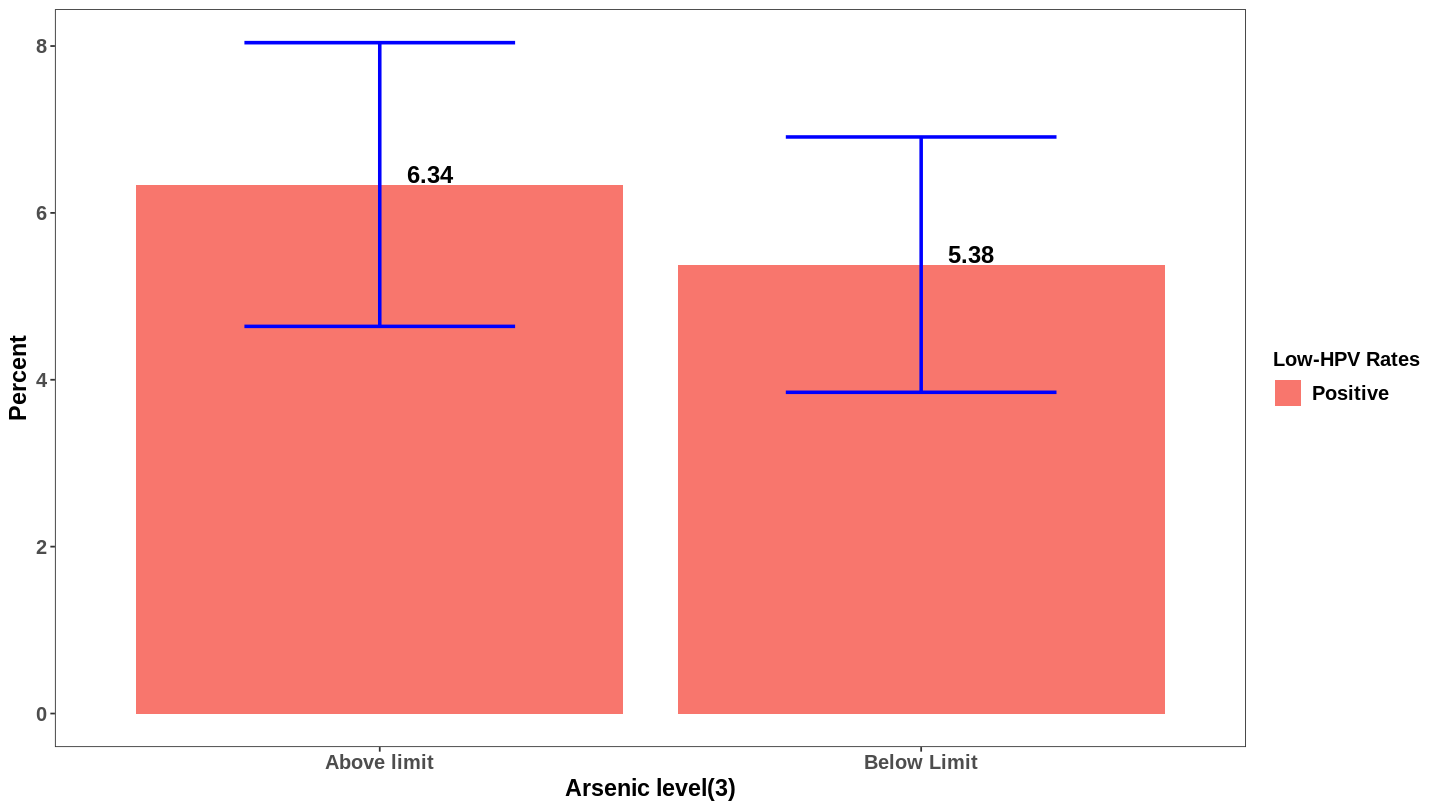

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUABLC.f), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(3)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The bar plot above shows the percentage proportion of arsenic level(3) that tested positive for low HPV, and their confidence intervals. The proportion that was above detection limit was 0.54 percent and below detection limit was 0.58 percent.


# **Arsenic level(4)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUACLC.f != "NA")

HSV_df %$% freq(URDUACLC.f)


URDUACLC.f,Freq,% Freq
<fct>,<int>,<dbl>
0.0,304,18.70769
1.0,1321,81.29231
Total,1625,100.00000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUACLC.f)
tbl = HSV_df %$% table(high.HPV, URDUACLC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,0.0,1.0,Total
,<chr>,<chr>,<chr>
Negative,231 [ 14.22% ],968 [ 59.57% ],1199 [ 73.78% ]
Positive,73 [ 4.49% ],353 [ 21.72% ],426 [ 26.22% ]
Total,304 [ 18.71% ],1321 [ 81.29% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.37026 
Fisher Exact Test P-value:  0.34793 


For the Chi-square test above, the p-value (0.10) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic level(4) variable.







In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URDUACLC.f) %>% group_by(URDUACLC.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUACLC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URDUACLC.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.0,Negative,231,14.22,304,75.99,71.18,80.79
0.0,Positive,73,4.49,304,24.01,19.21,28.82
1.0,Negative,968,59.57,1321,73.28,70.89,75.66
1.0,Positive,353,21.72,1321,26.72,24.34,29.11


The above detection limit group(4.03) percent shows the highest positive rate for high HPV in arsenic level(4).

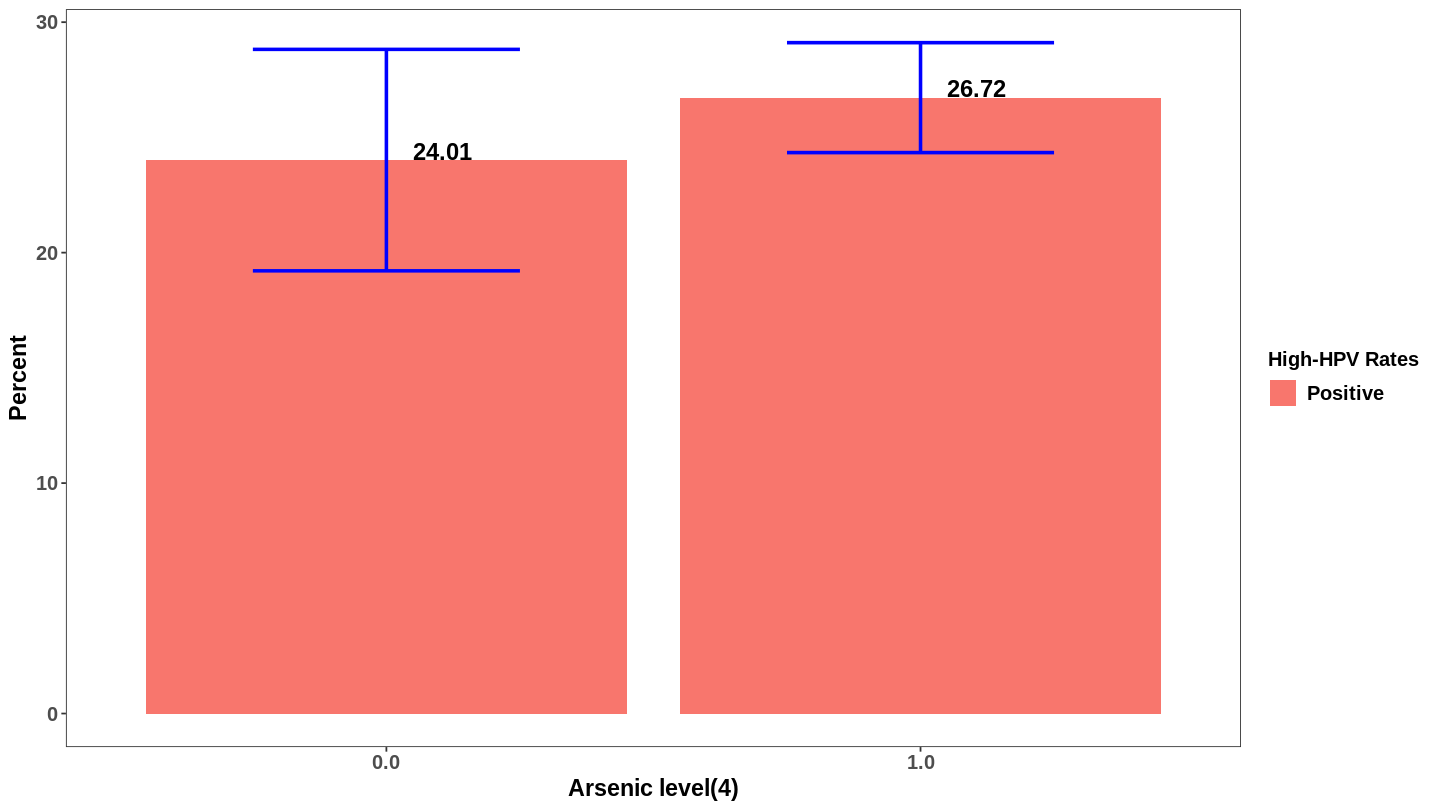

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUACLC.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(4)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))





The bar plot above shows the percentage proportion of arsenic level(4) that tested positive for high HPV, and their confidence intervals. The proportion that was above detection limit was 4.17 percent and below detection limit was 4.3 percent.

### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUACLC.f != "NA")

HSV_df %$% freq(URDUACLC.f)

cat("\n\n\n")


URDUACLC.f,Freq,% Freq
<fct>,<int>,<dbl>
0.0,304,18.70769
1.0,1321,81.29231
Total,1625,100.00000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected.

In [ ]:

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUACLC.f)
tbl = HSV_df %$% table(low.HPV, URDUACLC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,0.0,1.0,Total
,<chr>,<chr>,<chr>
Negative,284 [ 17.48% ],1246 [ 76.68% ],1530 [ 94.15% ]
Positive,20 [ 1.23% ],75 [ 4.62% ],95 [ 5.85% ]
Total,304 [ 18.71% ],1321 [ 81.29% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.63947 
Fisher Exact Test P-value:  0.58716 





For the Chi-square test above, the p-value (0.87) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(4) variable.







In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,URDUACLC.f) %>% group_by(URDUACLC.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUACLC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URDUACLC.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.0,Negative,284,17.48,304,93.42,90.63,96.21
0.0,Positive,20,1.23,304,6.58,3.79,9.37
1.0,Negative,1246,76.68,1321,94.32,93.07,95.57
1.0,Positive,75,4.62,1321,5.68,4.43,6.93


The above detection limit group(0.59) percent shows the highest positive rate for high HPV in arsenic level(4).

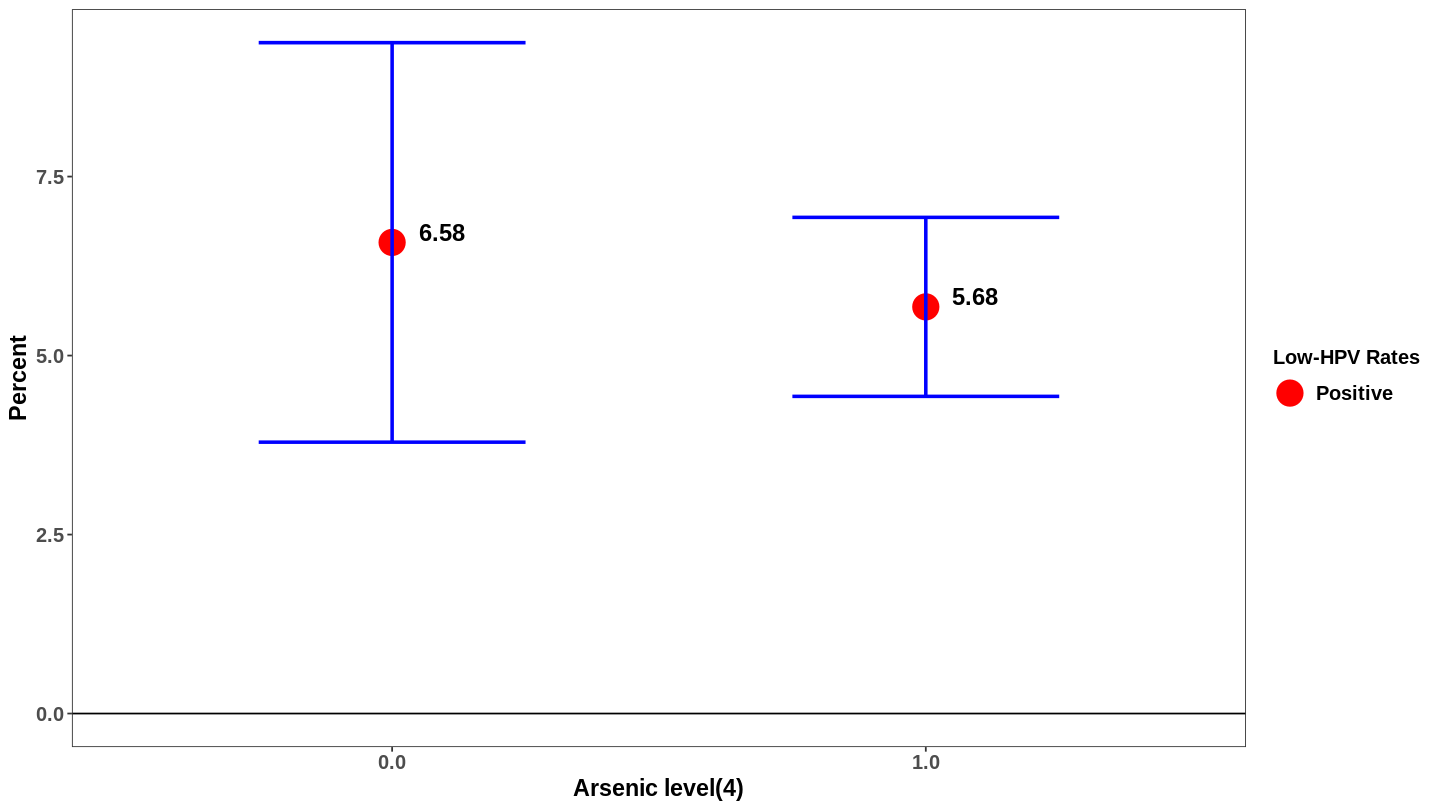

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUACLC.f), y = Percentage, fill = factor(low.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
 geom_point( colour = "red", size = 7) +
 geom_hline(yintercept = 0) +
  labs(x = "Arsenic level(4)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic level(4) that tested positive for low HPV, and their confidence intervals. The proportion that was above detection limit was 0.45 percent and below detection limit was 0.59 percent.


# **Arsenic level(5)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUDALC.f != "NA")

HSV_df %$% freq(URDUDALC.f)


URDUDALC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,304,18.70769
Below Limit,1321,81.29231
Total,1625,100.00000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUDALC.f)
tbl = HSV_df %$% table(high.HPV, URDUDALC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,231 [ 14.22% ],968 [ 59.57% ],1199 [ 73.78% ]
Positive,73 [ 4.49% ],353 [ 21.72% ],426 [ 26.22% ]
Total,304 [ 18.71% ],1321 [ 81.29% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.37026 
Fisher Exact Test P-value:  0.34793 


For the Chi-square test above, the p-value (0.96) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic level(5) variable.







In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URDUDALC.f) %>% group_by(URDUDALC.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUDALC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URDUDALC.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,231,14.22,304,75.99,71.18,80.79
Above limit,Positive,73,4.49,304,24.01,19.21,28.82
Below Limit,Negative,968,59.57,1321,73.28,70.89,75.66
Below Limit,Positive,353,21.72,1321,26.72,24.34,29.11


The below detection limit group(4.30) percent shows the highest positive rate for high HPV in arsenic level(5)



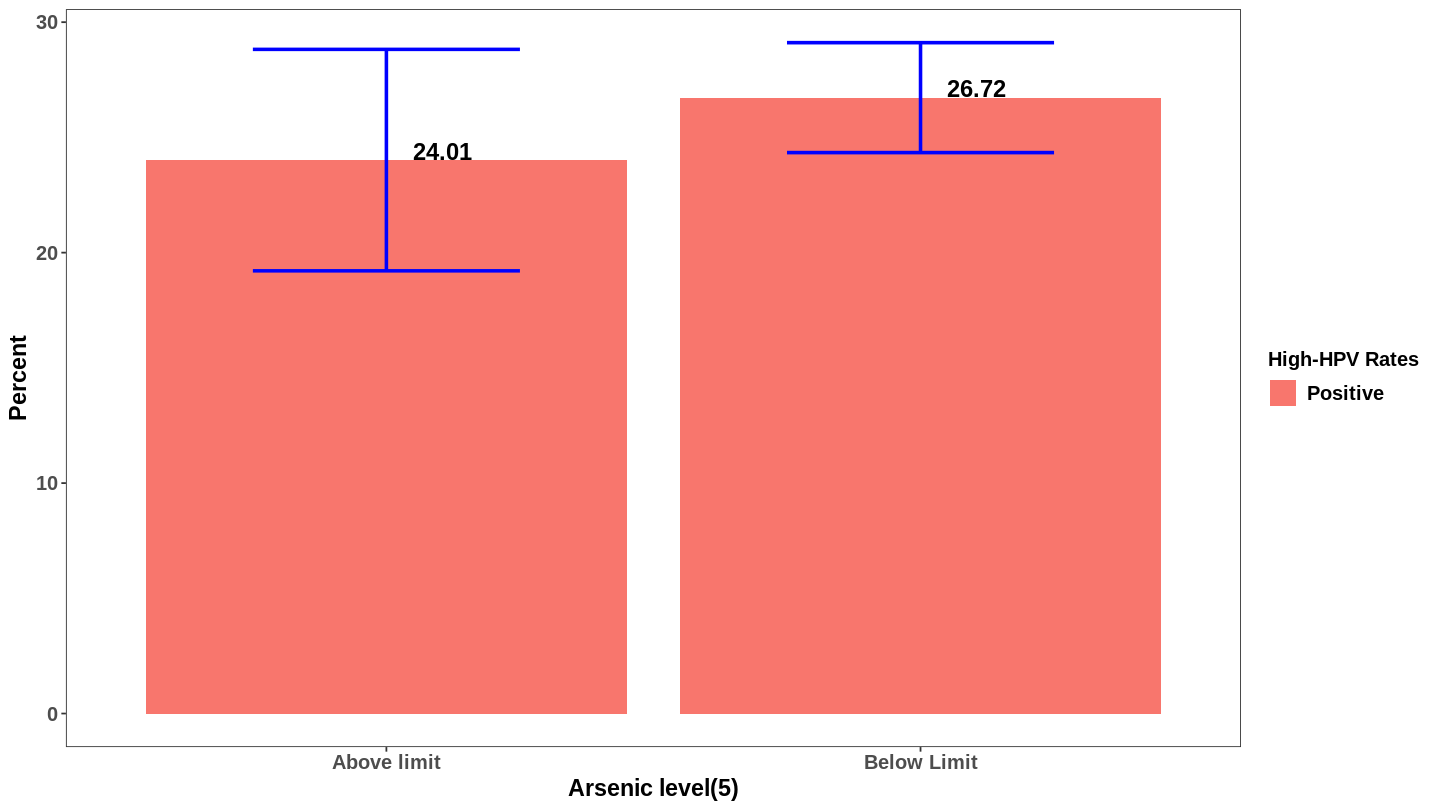

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUDALC.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(5)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))






The bar plot above shows the percentage proportion of arsenic level(5) that tested positive for high HPV, and their confidence intervals. The proportion that was above detection limit was 4.17 percent and below detection limit was 4.3 percent.


### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUDALC.f != "NA")

HSV_df %$% freq(URDUDALC.f)


URDUDALC.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,304,18.70769
Below Limit,1321,81.29231
Total,1625,100.00000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUDALC.f)
tbl = HSV_df %$% table(low.HPV, URDUDALC.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,284 [ 17.48% ],1246 [ 76.68% ],1530 [ 94.15% ]
Positive,20 [ 1.23% ],75 [ 4.62% ],95 [ 5.85% ]
Total,304 [ 18.71% ],1321 [ 81.29% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.63947 
Fisher Exact Test P-value:  0.58716 


For the Chi-square test above, the p-value (0.87) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(5) variable.







In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URDUDALC.f) %>% group_by(URDUDALC.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUDALC.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var

cat("\n\n\n")


URDUDALC.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,284,17.48,304,93.42,90.63,96.21
Above limit,Positive,20,1.23,304,6.58,3.79,9.37
Below Limit,Negative,1246,76.68,1321,94.32,93.07,95.57
Below Limit,Positive,75,4.62,1321,5.68,4.43,6.93


The below detection limit group(0.59) percent shows the highest positive rate for low HPV in arsenic level(5)



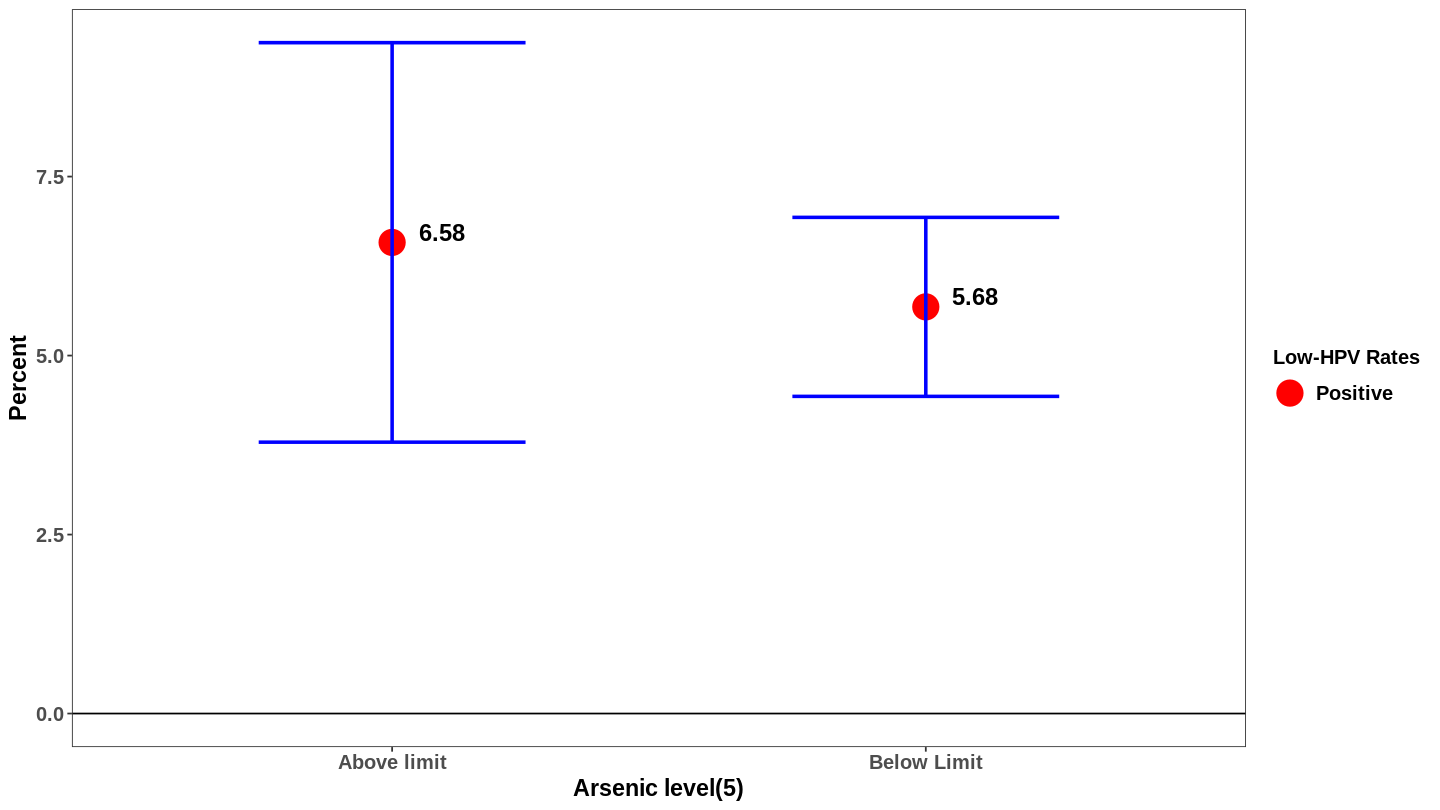

In [ ]:

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUDALC.f), y = Percentage, fill = factor(low.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
   geom_point( colour = "red", size = 7) +
   geom_hline(yintercept = 0) +
  labs(x = "Arsenic level(5)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))









The plot above shows the percentage proportion of arsenic level(5) that tested positive for low HPV, and their confidence intervals. The proportion that was above detection limit was 0.45 percent and below detection limit was 0.59 percent.

# **Arsenic level(6)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URDUMMAL.f != "NA")

HSV_df %$% freq(URDUMMAL.f)


URDUMMAL.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,1196,73.6
Below Limit,429,26.4
Total,1625,100.0


From the frequency table above, the below detection limit (67) percent has the highest percentage of the total sample collected.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URDUMMAL.f)
tbl = HSV_df %$% table(high.HPV, URDUMMAL.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,880 [ 54.15% ],319 [ 19.63% ],1199 [ 73.78% ]
Positive,316 [ 19.45% ],110 [ 6.77% ],426 [ 26.22% ]
Total,1196 [ 73.6% ],429 [ 26.4% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.80157 
Fisher Exact Test P-value:  0.79807 





For the Chi-square test above, the p-value (0.03) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the arsenic level(6) variable. 

In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,URDUMMAL.f) %>% group_by(URDUMMAL.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUMMAL.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URDUMMAL.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,880,54.15,1196,73.58,71.08,76.08
Above limit,Positive,316,19.45,1196,26.42,23.92,28.92
Below Limit,Negative,319,19.63,429,74.36,70.23,78.49
Below Limit,Positive,110,6.77,429,25.64,21.51,29.77


The above detection limit group(4.78) percent shows the highest positive rate for high HPV in arsenic level(6).



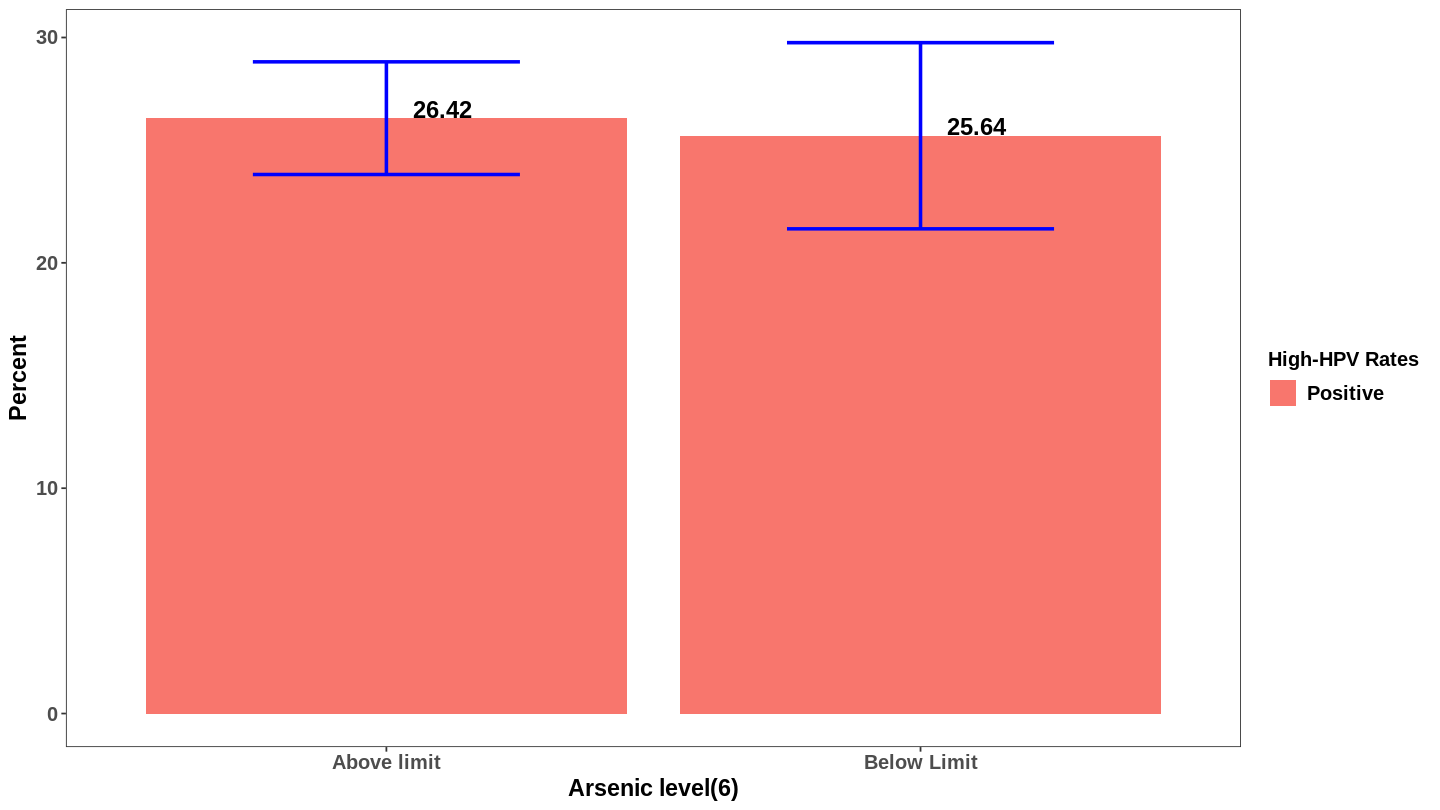

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URDUMMAL.f), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(6)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion of arsenic level(6) that tested positive for high HPV, and their confidence intervals. The proportion that was above detection limit was 4.78 percent and was below detection limit was 3.26 percent.


### **Low HPV Section**

In [ ]:




HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URDUMMAL.f != "NA")

HSV_df %$% freq(URDUMMAL.f)


URDUMMAL.f,Freq,% Freq
<fct>,<int>,<dbl>
Above limit,1196,73.6
Below Limit,429,26.4
Total,1625,100.0


From the frequency table above, the below detection limit (67) percent has the highest percentage of the total sample collected.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URDUMMAL.f)
tbl = HSV_df %$% table(low.HPV, URDUMMAL.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Above limit,Below Limit,Total
,<chr>,<chr>,<chr>
Negative,1127 [ 69.35% ],403 [ 24.8% ],1530 [ 94.15% ]
Positive,69 [ 4.25% ],26 [ 1.6% ],95 [ 5.85% ]
Total,1196 [ 73.6% ],429 [ 26.4% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.91975 
Fisher Exact Test P-value:  0.81117 






For the Chi-square test above, the p-value (0.73) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic level(6) variable.


In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,URDUMMAL.f) %>% group_by(URDUMMAL.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URDUMMAL.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URDUMMAL.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Above limit,Negative,1127,69.35,1196,94.23,92.91,95.55
Above limit,Positive,69,4.25,1196,5.77,4.45,7.09
Below Limit,Negative,403,24.80,429,93.94,91.68,96.20
Below Limit,Positive,26,1.60,429,6.06,3.80,8.32


The above detection limit group(0.61) percent shows the highest positive rate for low HPV in arsenic level(6).



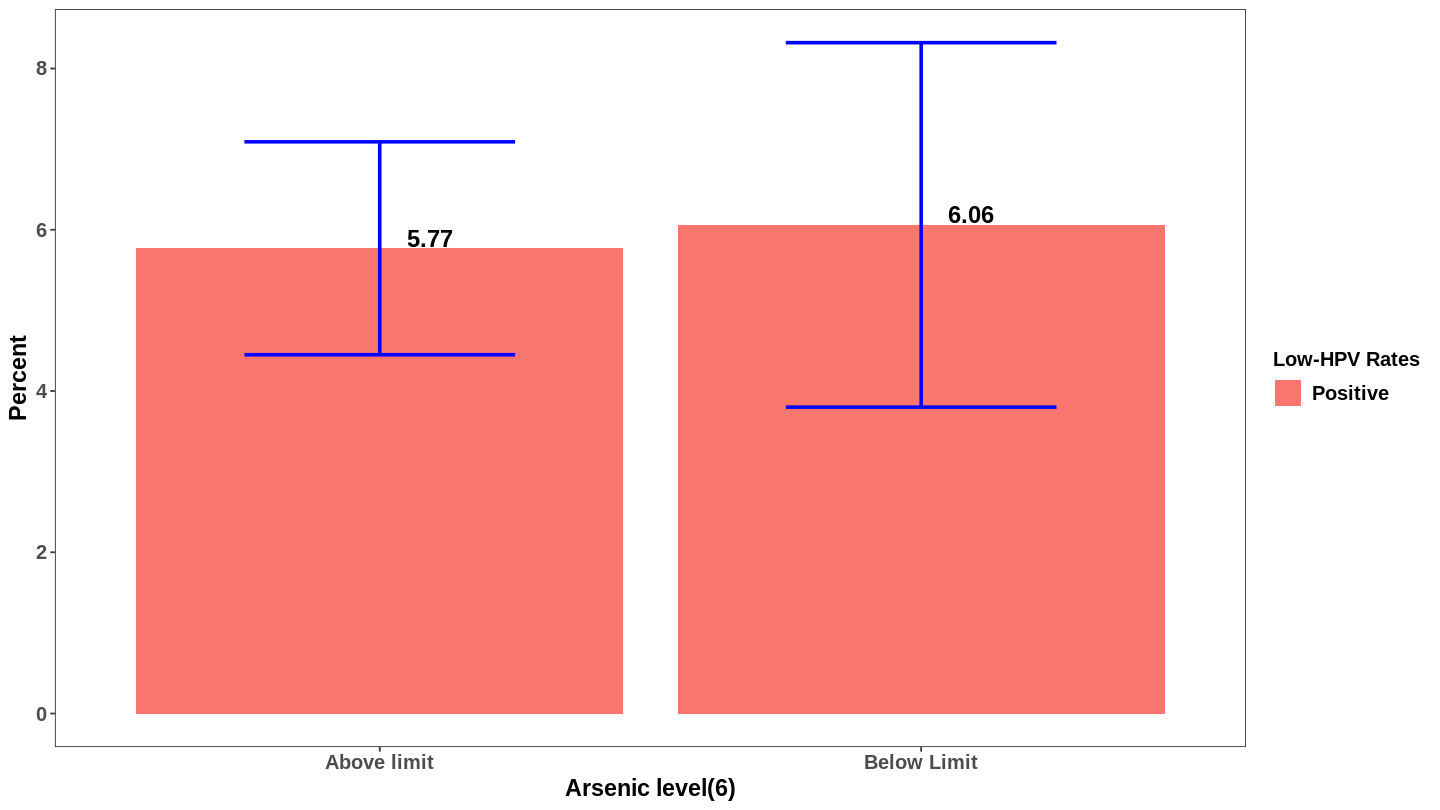

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URDUMMAL.f), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level(6)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))









The bar plot above shows the percentage proportion of arsenic that tested positive for low HPV, and their confidence intervals. The proportion above detection limit was 0.61 percent and below detection limit was 0.47 percent.

# **Arsenic by Quantile (1)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUAB.q != "NA")

HSV_df %$% freq(URXUAB.q)


URXUAB.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,836,51.44615
Q1,200,12.30769
Q2,195,12.00000
Q3,197,12.12308
Q4,197,12.12308
Total,1625,100.00000


From the frequency table above, the below detection limit (52.89) percent has the highest percentage of the total sample collected. Q1(12.05%), Q2(12.00%), Q3(12.00%), and Q4(11.05%) are close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUAB.q)
tbl = HSV_df %$% table(high.HPV, URXUAB.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,609 [ 37.48% ],148 [ 9.11% ],148 [ 9.11% ],142 [ 8.74% ],152 [ 9.35% ],1199 [ 73.78% ]
Positive,227 [ 13.97% ],52 [ 3.2% ],47 [ 2.89% ],55 [ 3.38% ],45 [ 2.77% ],426 [ 26.22% ]
Total,836 [ 51.45% ],200 [ 12.31% ],195 [ 12% ],197 [ 12.12% ],197 [ 12.12% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.68279 
Fisher Exact Test P-value:  0.69044 



For the Chi-square test above, the p-value (0.20) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(1) variable.


In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUAB.q) %>% group_by(URXUAB.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAB.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUAB.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,609,37.48,836,72.85,69.83,75.86
belowDL,Positive,227,13.97,836,27.15,24.14,30.17
Q1,Negative,148,9.11,200,74.00,67.92,80.08
Q1,Positive,52,3.20,200,26.00,19.92,32.08
Q2,Negative,148,9.11,195,75.90,69.89,81.90
Q2,Positive,47,2.89,195,24.10,18.10,30.11
Q3,Negative,142,8.74,197,72.08,65.82,78.35
Q3,Positive,55,3.38,197,27.92,21.65,34.18
Q4,Negative,152,9.35,197,77.16,71.29,83.02


The  Q1 group (5.74) percent shows the highest positive rate for high HPV in arsenic by quantile(1).



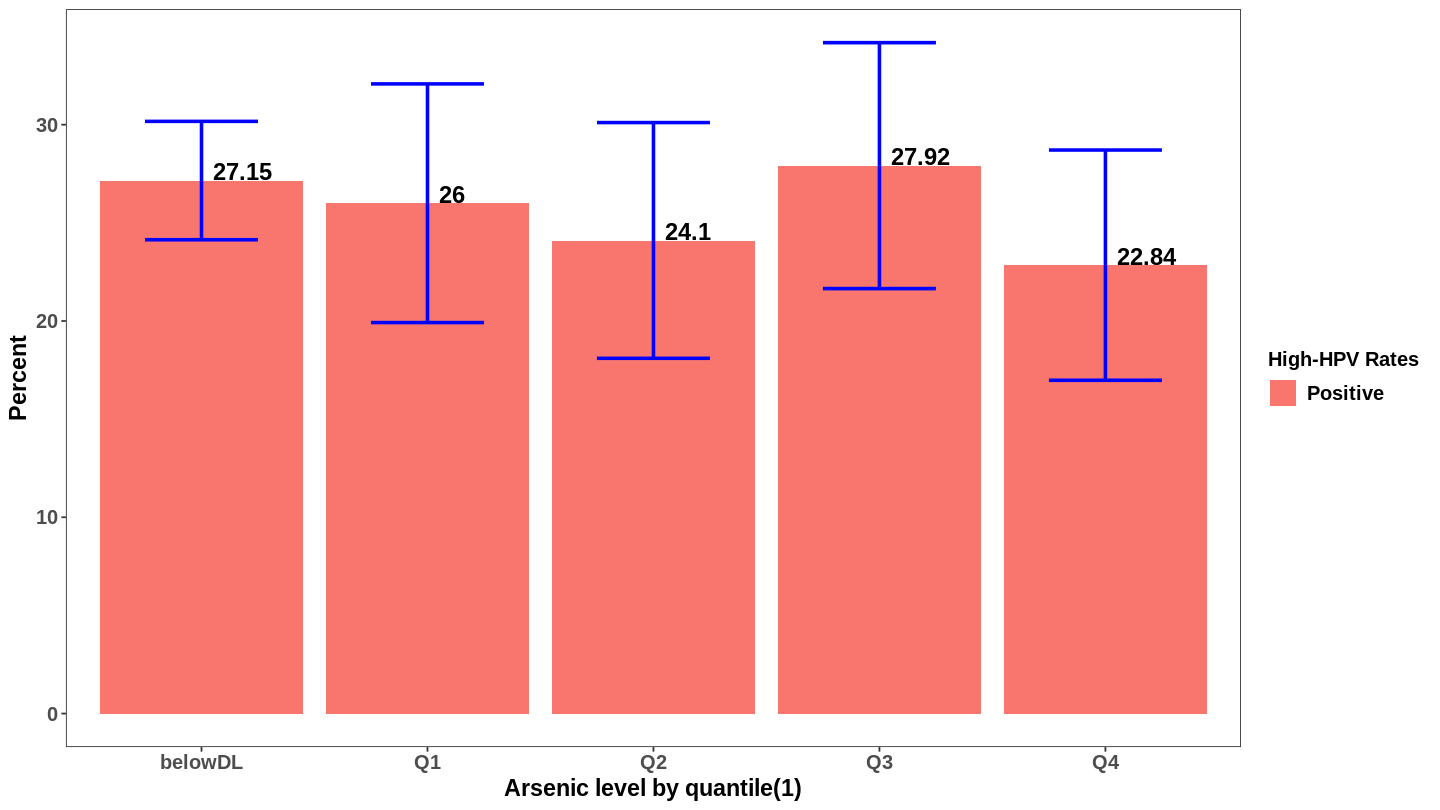

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUAB.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level by quantile(1)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the percentage proportion of arsenic by quantile(1) that tested positive for high HPV, and their confidence intervals. The proportion below detection limit was 4.31 percent, first quantile was 5.74 percent, second quantile was 4.91 percent, third quantile was 2.99 percent and fourth quantile was 3.25 percent. 

### **Low HPV Section**

In [ ]:




HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUAB.q != "NA")

HSV_df %$% freq(URXUAB.q)


URXUAB.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,836,51.44615
Q1,200,12.30769
Q2,195,12.00000
Q3,197,12.12308
Q4,197,12.12308
Total,1625,100.00000


From the frequency table above, the below detection limit (52.89) percent has the highest percentage of the total sample collected. Q1(12.05%), Q2(12.00%), Q3(12.00%), and Q4(11.05%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUAB.q)
tbl = HSV_df %$% table(low.HPV, URXUAB.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,791 [ 48.68% ],194 [ 11.94% ],182 [ 11.2% ],187 [ 11.51% ],176 [ 10.83% ],1530 [ 94.15% ]
Positive,45 [ 2.77% ],6 [ 0.37% ],13 [ 0.8% ],10 [ 0.62% ],21 [ 1.29% ],95 [ 5.85% ]
Total,836 [ 51.45% ],200 [ 12.31% ],195 [ 12% ],197 [ 12.12% ],197 [ 12.12% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.01725 
Fisher Exact Test P-value:  0.0262 



For the Chi-square test above, the p-value (0.51) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic by quantile(1) variable.


In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URXUAB.q) %>% group_by(URXUAB.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAB.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUAB.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,791,48.68,836,94.62,93.09,96.15
belowDL,Positive,45,2.77,836,5.38,3.85,6.91
Q1,Negative,194,11.94,200,97.00,94.64,99.36
Q1,Positive,6,0.37,200,3.00,0.64,5.36
Q2,Negative,182,11.20,195,93.33,89.83,96.83
Q2,Positive,13,0.80,195,6.67,3.17,10.17
Q3,Negative,187,11.51,197,94.92,91.86,97.99
Q3,Positive,10,0.62,197,5.08,2.01,8.14
Q4,Negative,176,10.83,197,89.34,85.03,93.65


The  Q1 and Q3 group both (0.85) percent shows the highest positive rate for low HPV in arsenic by quantile(1).



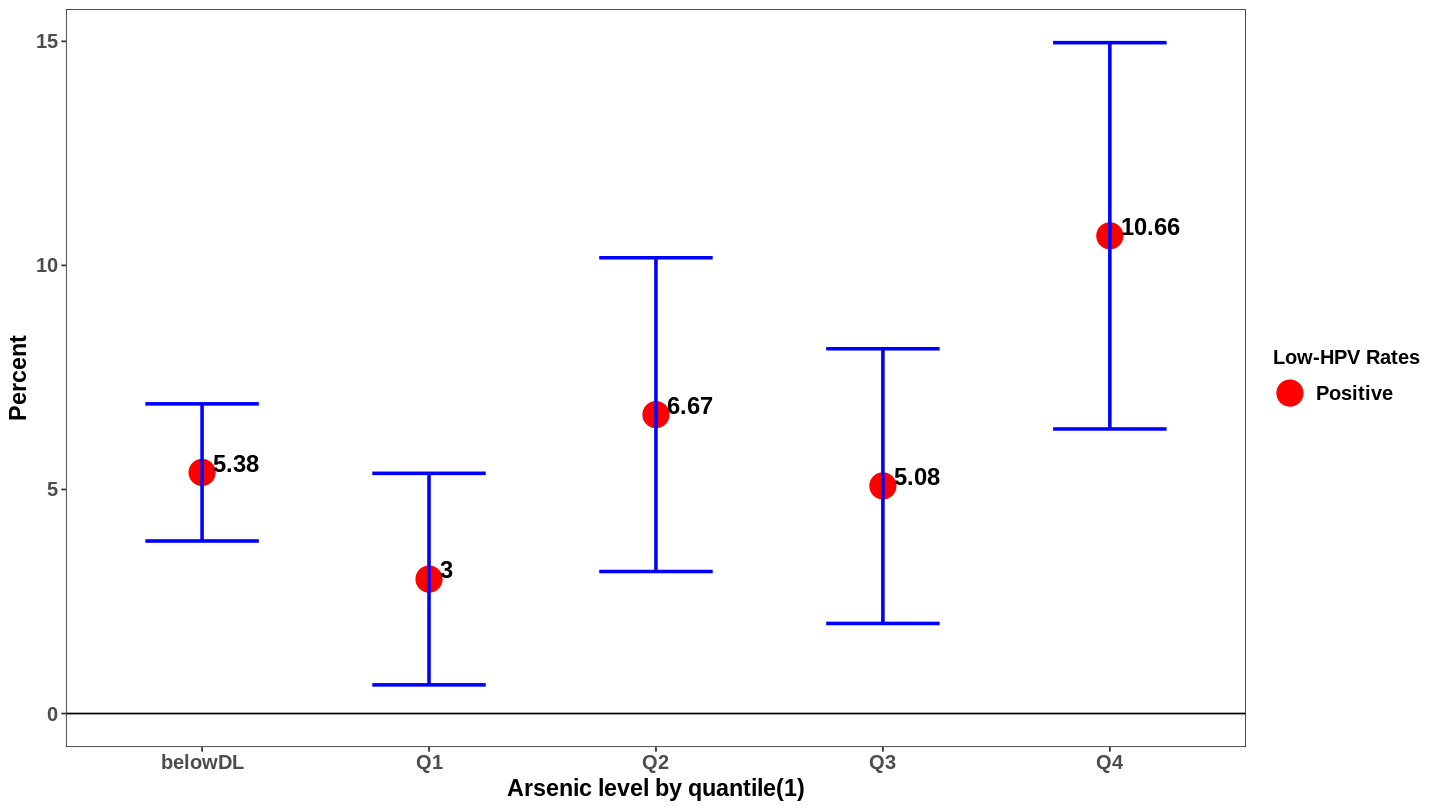

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUAB.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(1)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(1) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.58 percent, first quantile was 0.85 percent, second quantile was 0.21 percent, third quantile was 0.85 percent, fouth quantile was 0.23 percent. 

# **Arsenic by quantile (2)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUAS5.q != "NA")

HSV_df %$% freq(URXUAS5.q)


URXUAS5.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,1578,97.1076923
Q1,12,0.7384615
Q2,12,0.7384615
Q3,11,0.6769231
Q4,12,0.7384615
Total,1625,100.0000000


From the frequency table above, the below detection limit (97.53) percent has the highest percentage of the total sample collected. Q1(0.62%), Q2(0.62%), Q3(0.62%), and Q4(0.62%) are the same.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUAS5.q)
tbl = HSV_df %$% table(high.HPV, URXUAS5.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1168 [ 71.88% ],8 [ 0.49% ],8 [ 0.49% ],8 [ 0.49% ],7 [ 0.43% ],1199 [ 73.78% ]
Positive,410 [ 25.23% ],4 [ 0.25% ],4 [ 0.25% ],3 [ 0.18% ],5 [ 0.31% ],426 [ 26.22% ]
Total,1578 [ 97.11% ],12 [ 0.74% ],12 [ 0.74% ],11 [ 0.68% ],12 [ 0.74% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.70628 
Fisher Exact Test P-value:  0.59424 



For the Chi-square test above, the p-value (0.20) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(2) variable.


In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUAS5.q) %>% group_by(URXUAS5.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAS5.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUAS5.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,1168,71.88,1578,74.02,71.85,76.18
belowDL,Positive,410,25.23,1578,25.98,23.82,28.15
Q1,Negative,8,0.49,12,66.67,39.99,93.34
Q1,Positive,4,0.25,12,33.33,6.66,60.01
Q2,Negative,8,0.49,12,66.67,39.99,93.34
Q2,Positive,4,0.25,12,33.33,6.66,60.01
Q3,Negative,8,0.49,11,72.73,46.41,99.05
Q3,Positive,3,0.18,11,27.27,0.95,53.59
Q4,Negative,7,0.43,12,58.33,30.44,86.23


The Q4 group (12.50) percent shows the highest positive rate for high HPV in arsenic by quantile(2).



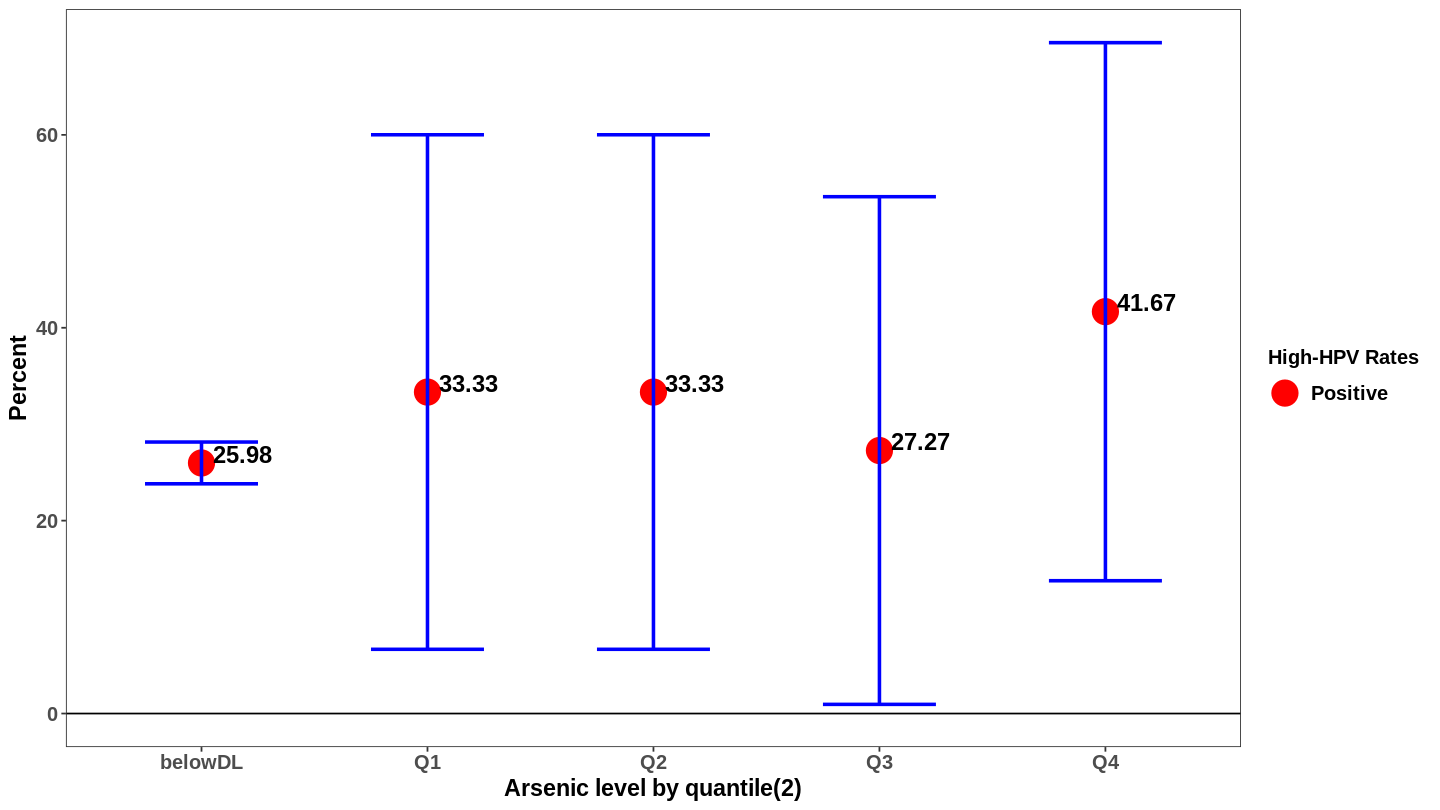

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUAS5.q), y = Percentage, fill = factor(high.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
 geom_point( colour = "red", size = 7) +
 geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(2)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))


The plot above shows the percentage proportion of arsenic that tested positive for high HPV. The proportion below detection limit was 4.23 percent, second quantile was 4.17 percent, third quantile was 8.33 percent, and fourth quantile is 12.5 percent. 

### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUAS5.q != "NA")

HSV_df %$% freq(URXUAS5.q)


URXUAS5.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,1578,97.1076923
Q1,12,0.7384615
Q2,12,0.7384615
Q3,11,0.6769231
Q4,12,0.7384615
Total,1625,100.0000000


From the frequency table above, the below detection limit (97.53) percent has the highest percentage of the total sample collected. Q1(0.62%), Q2(0.62%), Q3(0.62%), and Q4(0.62%) are the same.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUAS5.q)
tbl = HSV_df %$% table(low.HPV, URXUAS5.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1485 [ 91.38% ],12 [ 0.74% ],11 [ 0.68% ],10 [ 0.62% ],12 [ 0.74% ],1530 [ 94.15% ]
Positive,93 [ 5.72% ],0 [ 0% ],1 [ 0.06% ],1 [ 0.06% ],0 [ 0% ],95 [ 5.85% ]
Total,1578 [ 97.11% ],12 [ 0.74% ],12 [ 0.74% ],11 [ 0.68% ],12 [ 0.74% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.76481 
Fisher Exact Test P-value:  0.67457 



For the Chi-square test above, the p-value (0.20) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic by quantile(2) variable.


In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URXUAS5.q) %>% group_by(URXUAS5.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAS5.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUAS5.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,1485,91.38,1578,94.11,92.94,95.27
belowDL,Positive,93,5.72,1578,5.89,4.73,7.06
Q1,Negative,12,0.74,12,100.00,100.00,100.00
Q2,Negative,11,0.68,12,91.67,76.03,107.30
Q2,Positive,1,0.06,12,8.33,-7.30,23.97
Q3,Negative,10,0.62,11,90.91,73.92,107.90
Q3,Positive,1,0.06,11,9.09,-7.90,26.08
Q4,Negative,12,0.74,12,100.00,100.00,100.00


The Q4  group (4.17) percent shows the highest positive rate for low HPV in arsenic by quantile(2).



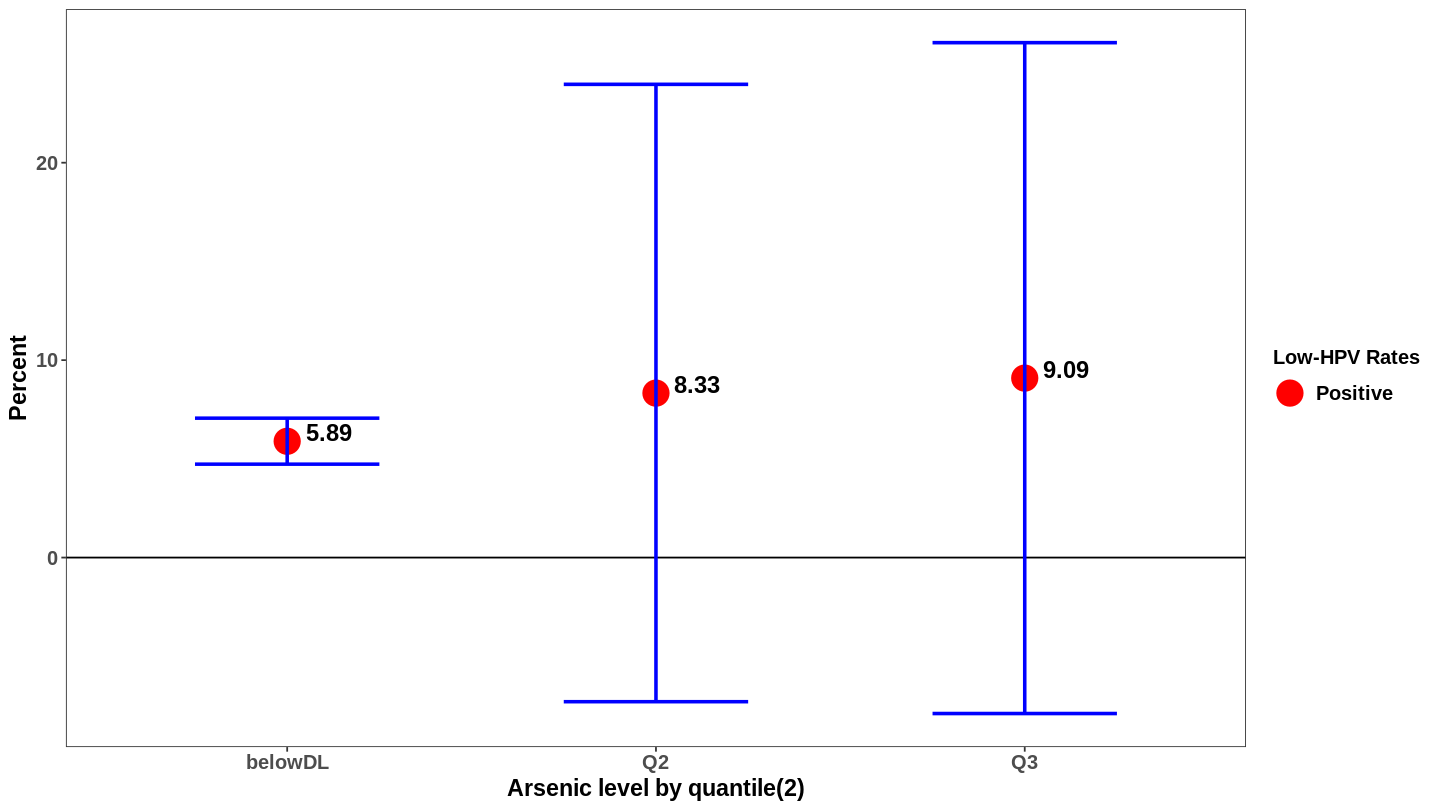

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUAS5.q), y = Percentage, fill = factor(low.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(2)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(2) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.55 percent and the fourth quantile was 4.17 percent. 




# **Arsenic by quantile (3)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUAS3.q != "NA")

HSV_df %$% freq(URXUAS3.q)


URXUAS3.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,404,24.86154
Q1,309,19.01538
Q2,316,19.44615
Q3,292,17.96923
Q4,304,18.70769
Total,1625,100.00000


From the frequency table above, the below detection limit (34.46) percent has the highest percentage of the total sample collected. Q1(16.94%), Q2(16.41%), Q3(16.02%), and Q4(16.15%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUAS3.q)
tbl = HSV_df %$% table(high.HPV, URXUAS3.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,298 [ 18.34% ],222 [ 13.66% ],228 [ 14.03% ],224 [ 13.78% ],227 [ 13.97% ],1199 [ 73.78% ]
Positive,106 [ 6.52% ],87 [ 5.35% ],88 [ 5.42% ],68 [ 4.18% ],77 [ 4.74% ],426 [ 26.22% ]
Total,404 [ 24.86% ],309 [ 19.02% ],316 [ 19.45% ],292 [ 17.97% ],304 [ 18.71% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.65285 
Fisher Exact Test P-value:  0.651 



For the Chi-square test above, the p-value (0.51) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(3) variable.


In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUAS3.q) %>% group_by(URXUAS3.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAS3.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUAS3.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,298,18.34,404,73.76,69.47,78.05
belowDL,Positive,106,6.52,404,26.24,21.95,30.53
Q1,Negative,222,13.66,309,71.84,66.83,76.86
Q1,Positive,87,5.35,309,28.16,23.14,33.17
Q2,Negative,228,14.03,316,72.15,67.21,77.09
Q2,Positive,88,5.42,316,27.85,22.91,32.79
Q3,Negative,224,13.78,292,76.71,71.86,81.56
Q3,Positive,68,4.18,292,23.29,18.44,28.14
Q4,Negative,227,13.97,304,74.67,69.78,79.56


The Q3 group (5.44)  percent shows the highest positive rate for high HPV in arsenic by quantile(3).



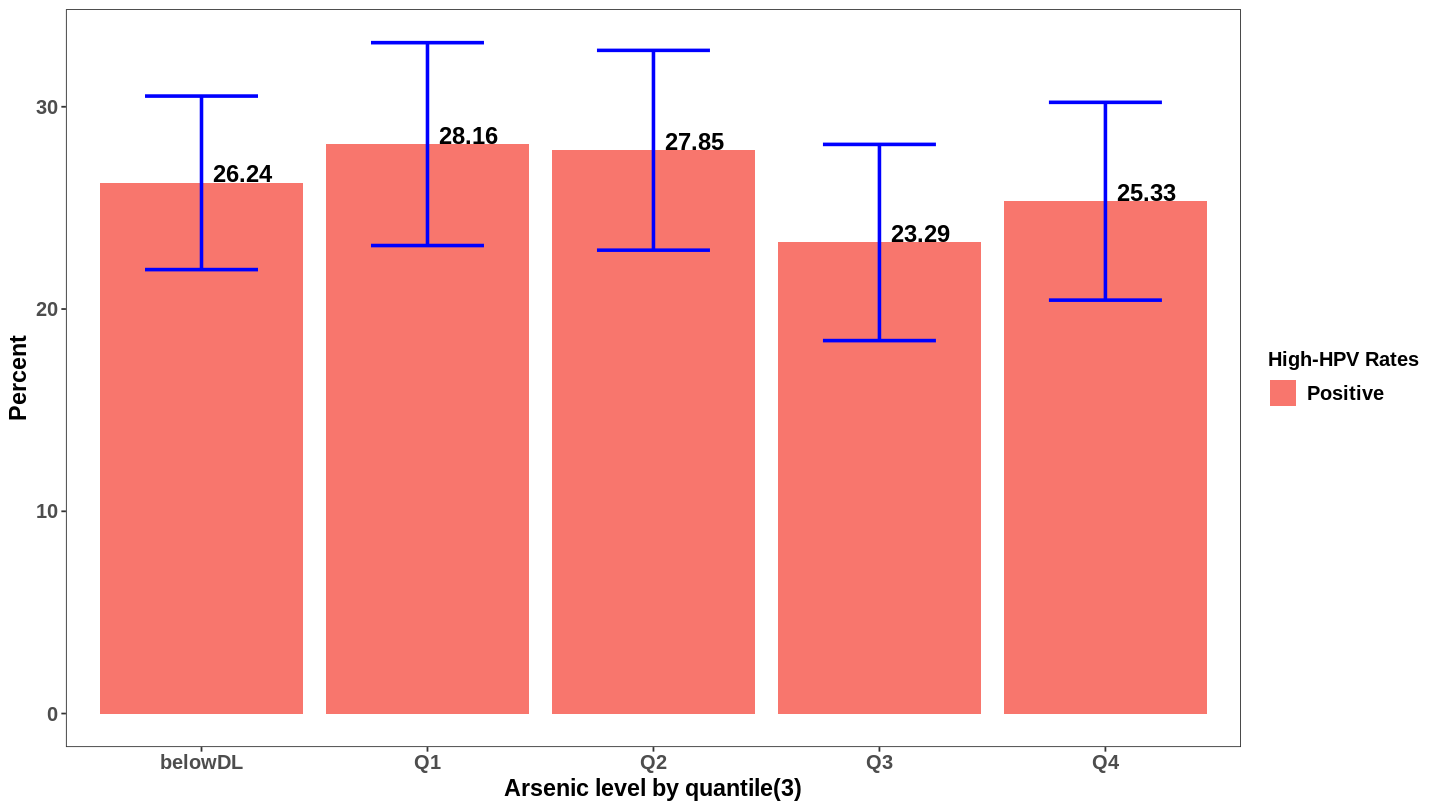

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUAS3.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level by quantile(3)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))


The bar plot above shows the percentage proportion of arsenic by quantile(3) that tested positive for high HPV, and their confidence intervals. The proportion below detection limit was 3.79 percent, first quantile was 4.54 percent second quantile was 4.37 percent, third quantile was 5.44 percent, and the fourth quantile was 3.81 percent. 

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUAS3.q != "NA")

HSV_df %$% freq(URXUAS3.q)


URXUAS3.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,404,24.86154
Q1,309,19.01538
Q2,316,19.44615
Q3,292,17.96923
Q4,304,18.70769
Total,1625,100.00000


From the frequency table above, the below detection limit (34.46) percent has the highest percentage of the total sample collected. Q1(16.94%), Q2(16.41%), Q3(16.02%), and Q4(16.15%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUAS3.q)
tbl = HSV_df %$% table(low.HPV, URXUAS3.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,384 [ 23.63% ],286 [ 17.6% ],300 [ 18.46% ],275 [ 16.92% ],285 [ 17.54% ],1530 [ 94.15% ]
Positive,20 [ 1.23% ],23 [ 1.42% ],16 [ 0.98% ],17 [ 1.05% ],19 [ 1.17% ],95 [ 5.85% ]
Total,404 [ 24.86% ],309 [ 19.02% ],316 [ 19.45% ],292 [ 17.97% ],304 [ 18.71% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.65125 
Fisher Exact Test P-value:  0.65654 



For the Chi-square test above, the p-value (0.88) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(3) variable.


In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URXUAS3.q) %>% group_by(URXUAS3.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAS3.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUAS3.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,384,23.63,404,95.05,92.93,97.16
belowDL,Positive,20,1.23,404,4.95,2.84,7.07
Q1,Negative,286,17.60,309,92.56,89.63,95.48
Q1,Positive,23,1.42,309,7.44,4.52,10.37
Q2,Negative,300,18.46,316,94.94,92.52,97.35
Q2,Positive,16,0.98,316,5.06,2.65,7.48
Q3,Negative,275,16.92,292,94.18,91.49,96.86
Q3,Positive,17,1.05,292,5.82,3.14,8.51
Q4,Negative,285,17.54,304,93.75,91.03,96.47


The Q3 and Q4 group (0.63)  percent shows the highest positive rate for low HPV in arsenic by quantile(3).



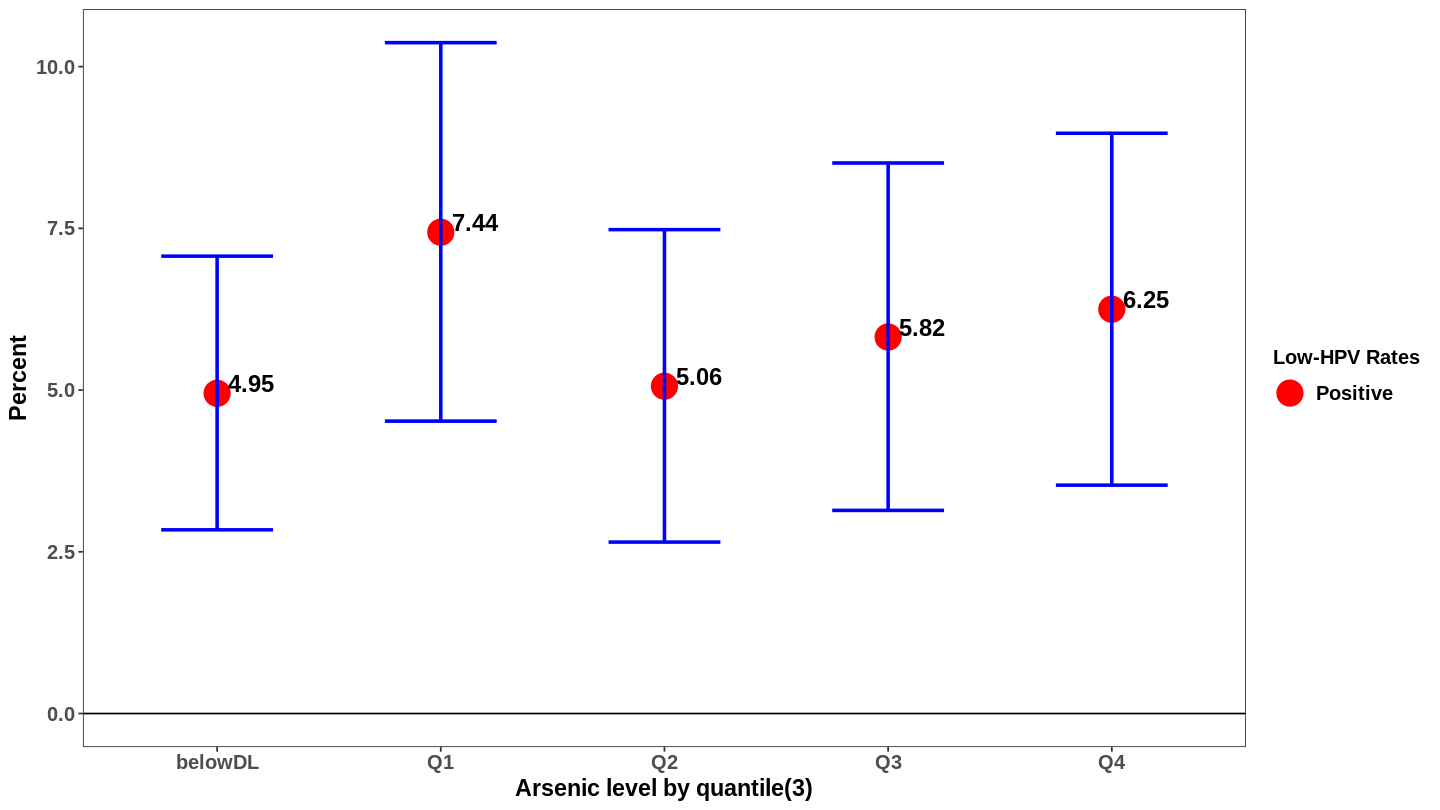

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUAS3.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(3)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(3) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.45 percent, first quantile was 0.45 percent, second quantile was 0.63 percent, third quantile was 0.8 percent, and the fourth quantile was 0.63 percent. 




# **Arsenic by quantile (4)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUAC.q != "NA")

HSV_df %$% freq(URXUAC.q)


URXUAC.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,1321,81.292308
Q1,77,4.738462
Q2,79,4.861538
Q3,72,4.430769
Q4,76,4.676923
Total,1625,100.000000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected. Q1(4.71%), Q2(4.03%), Q3(4.33%), and Q4(4.12%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUAC.q)
tbl = HSV_df %$% table(high.HPV, URXUAC.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,968 [ 59.57% ],57 [ 3.51% ],58 [ 3.57% ],53 [ 3.26% ],63 [ 3.88% ],1199 [ 73.78% ]
Positive,353 [ 21.72% ],20 [ 1.23% ],21 [ 1.29% ],19 [ 1.17% ],13 [ 0.8% ],426 [ 26.22% ]
Total,1321 [ 81.29% ],77 [ 4.74% ],79 [ 4.86% ],72 [ 4.43% ],76 [ 4.68% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.48625 
Fisher Exact Test P-value:  0.47745 


For the Chi-square test above, the p-value (0.11) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the arsenic by quantile(4) variable. 

In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUAC.q) %>% group_by(URXUAC.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAC.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUAC.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,968,59.57,1321,73.28,70.89,75.66
belowDL,Positive,353,21.72,1321,26.72,24.34,29.11
Q1,Negative,57,3.51,77,74.03,64.23,83.82
Q1,Positive,20,1.23,77,25.97,16.18,35.77
Q2,Negative,58,3.57,79,73.42,63.68,83.16
Q2,Positive,21,1.29,79,26.58,16.84,36.32
Q3,Negative,53,3.26,72,73.61,63.43,83.79
Q3,Positive,19,1.17,72,26.39,16.21,36.57
Q4,Negative,63,3.88,76,82.89,74.43,91.36


The Q1 group (8.70)  percent shows the highest positive rate for high HPV in arsenic by quantile(4).



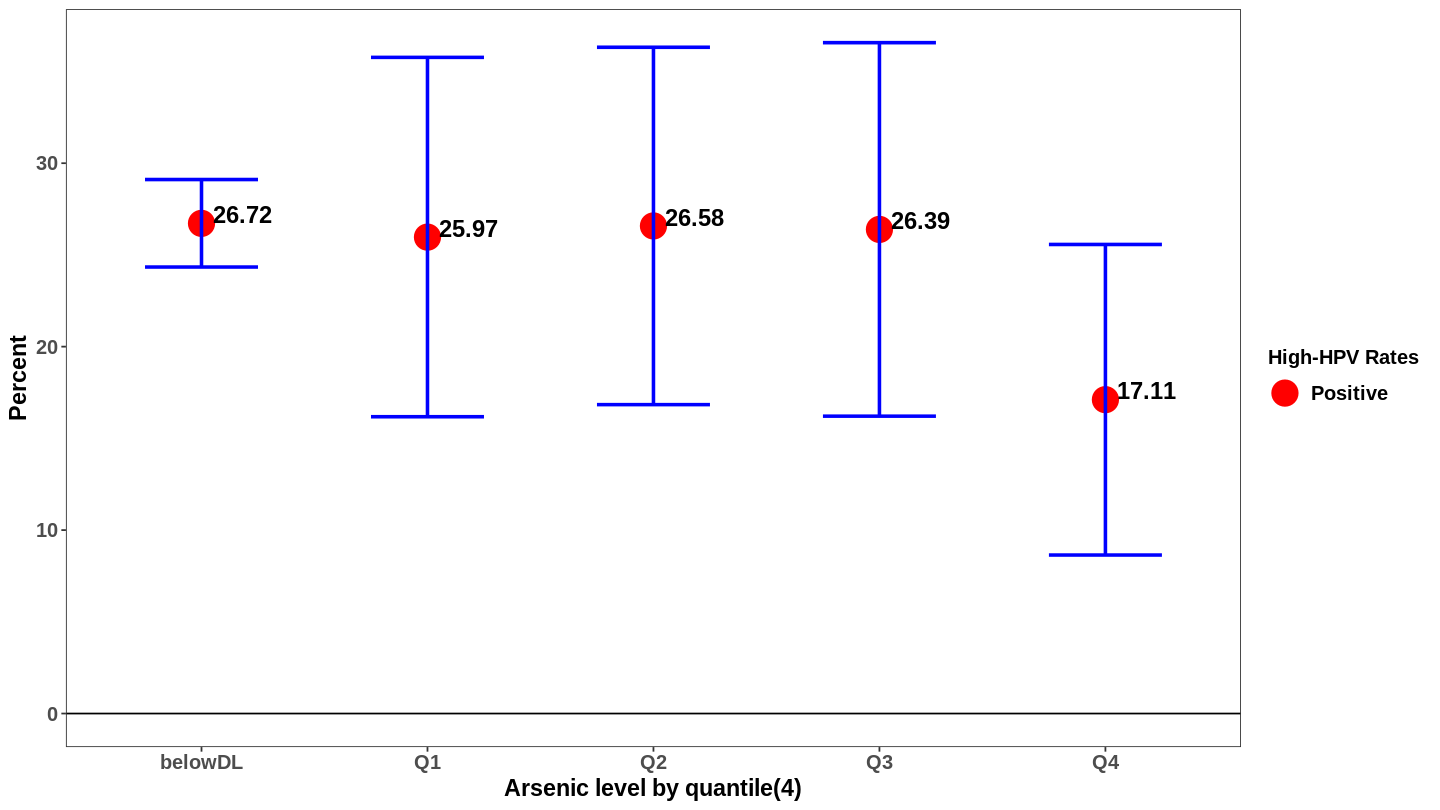

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUAC.q), y = Percentage, fill = factor(high.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(4)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The plot above shows the percentage proportion of arsenic by quantile(4) that tested positive for high HPV, and their confidence intervals. The proportion below detection limit was 4.30 percent, first quantile was 8.70 percent, second quantile was 1.91 percent, third quantile was 2.37 percent, and the fourth quantile was 3.11 percent. 



### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUAC.q != "NA")

HSV_df %$% freq(URXUAC.q)


URXUAC.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,1321,81.292308
Q1,77,4.738462
Q2,79,4.861538
Q3,72,4.430769
Q4,76,4.676923
Total,1625,100.000000


From the frequency table above, the below detection limit (82.79) percent has the highest percentage of the total sample collected. Q1(4.71%), Q2(4.03%), Q3(4.33%), and Q4(4.12%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUAC.q)
tbl = HSV_df %$% table(low.HPV, URXUAC.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,1246 [ 76.68% ],72 [ 4.43% ],72 [ 4.43% ],68 [ 4.18% ],72 [ 4.43% ],1530 [ 94.15% ]
Positive,75 [ 4.62% ],5 [ 0.31% ],7 [ 0.43% ],4 [ 0.25% ],4 [ 0.25% ],95 [ 5.85% ]
Total,1321 [ 81.29% ],77 [ 4.74% ],79 [ 4.86% ],72 [ 4.43% ],76 [ 4.68% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.82856 
Fisher Exact Test P-value:  0.77535 





For the Chi-square test above, the p-value (0.51) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic by quantile(4) variable.




In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,URXUAC.q) %>% group_by(URXUAC.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUAC.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUAC.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,1246,76.68,1321,94.32,93.07,95.57
belowDL,Positive,75,4.62,1321,5.68,4.43,6.93
Q1,Negative,72,4.43,77,93.51,88.00,99.01
Q1,Positive,5,0.31,77,6.49,0.99,12.00
Q2,Negative,72,4.43,79,91.14,84.87,97.41
Q2,Positive,7,0.43,79,8.86,2.59,15.13
Q3,Negative,68,4.18,72,94.44,89.15,99.74
Q3,Positive,4,0.25,72,5.56,0.26,10.85
Q4,Negative,72,4.43,76,94.74,89.72,99.76


The Q2 group (1.27)  percent shows the highest positive rate for low HPV in arsenic by quantile(4).



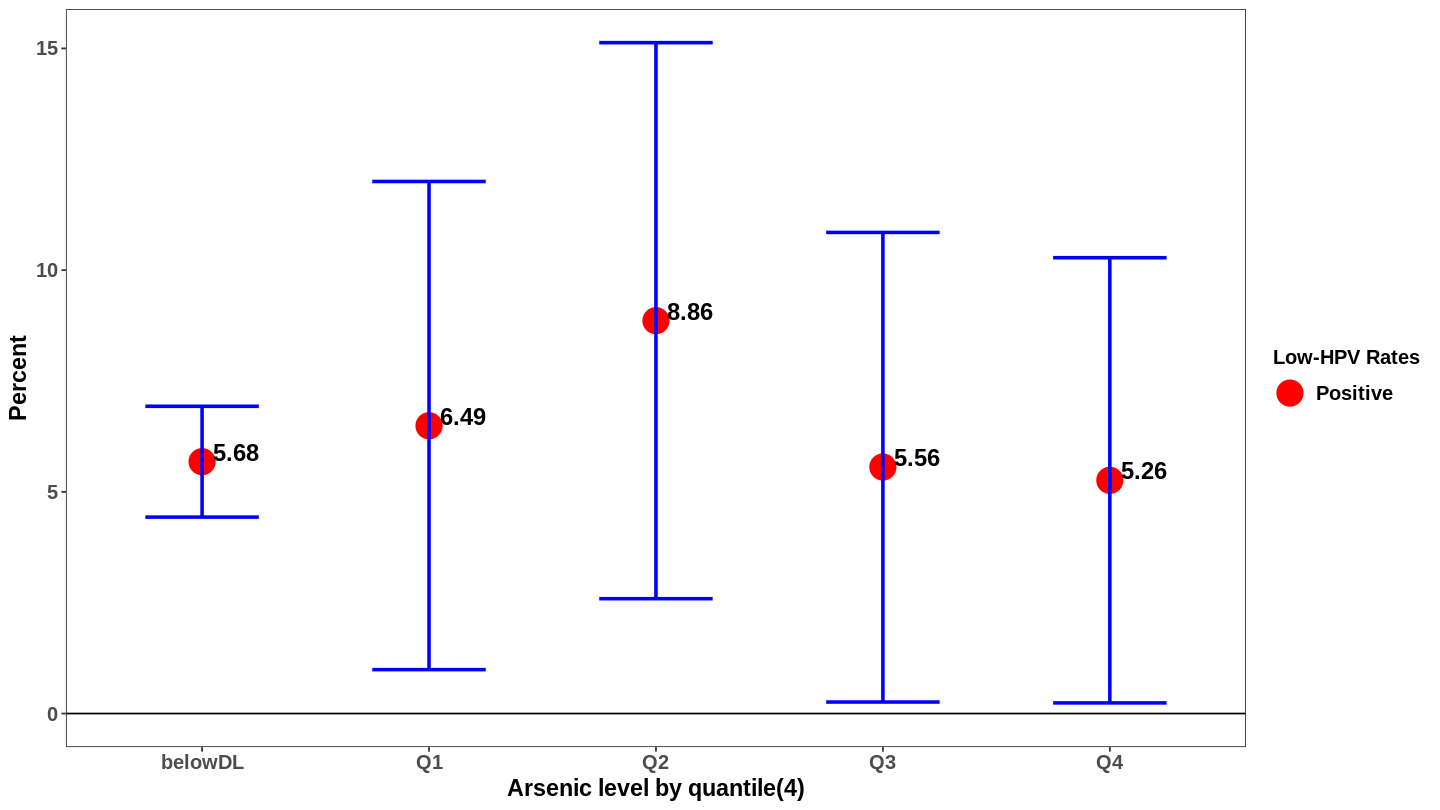

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUAC.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(4)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(4) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.59 percent, first quantile was 0.54 percent, and the second quantile was 1.27 percent.



# **Arsenic by quantile (5)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUDMA.q != "NA")

HSV_df %$% freq(URXUDMA.q)


URXUDMA.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,370,22.76923
Q1,316,19.44615
Q2,312,19.20000
Q3,313,19.26154
Q4,314,19.32308
Total,1625,100.00000


From the frequency table above, the below detection limit (25.15) percent has the highest percentage of the total sample collected. Q1(18.74%), Q2(18.74%), Q3(18.69%), and Q4(18.82%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUDMA.q)
tbl = HSV_df %$% table(high.HPV, URXUDMA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,274 [ 16.86% ],229 [ 14.09% ],223 [ 13.72% ],228 [ 14.03% ],245 [ 15.08% ],1199 [ 73.78% ]
Positive,96 [ 5.91% ],87 [ 5.35% ],89 [ 5.48% ],85 [ 5.23% ],69 [ 4.25% ],426 [ 26.22% ]
Total,370 [ 22.77% ],316 [ 19.45% ],312 [ 19.2% ],313 [ 19.26% ],314 [ 19.32% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.37696 
Fisher Exact Test P-value:  0.36648 


For the Chi-square test above, the p-value (0.62) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(5) variable.




In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUDMA.q) %>% group_by(URXUDMA.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUDMA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUDMA.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,274,16.86,370,74.05,69.59,78.52
belowDL,Positive,96,5.91,370,25.95,21.48,30.41
Q1,Negative,229,14.09,316,72.47,67.54,77.39
Q1,Positive,87,5.35,316,27.53,22.61,32.46
Q2,Negative,223,13.72,312,71.47,66.46,76.48
Q2,Positive,89,5.48,312,28.53,23.52,33.54
Q3,Negative,228,14.03,313,72.84,67.92,77.77
Q3,Positive,85,5.23,313,27.16,22.23,32.08
Q4,Negative,245,15.08,314,78.03,73.45,82.61


The Q3 group (5.10)  percent shows the highest positive rate for high HPV in arsenic by quantile(5).



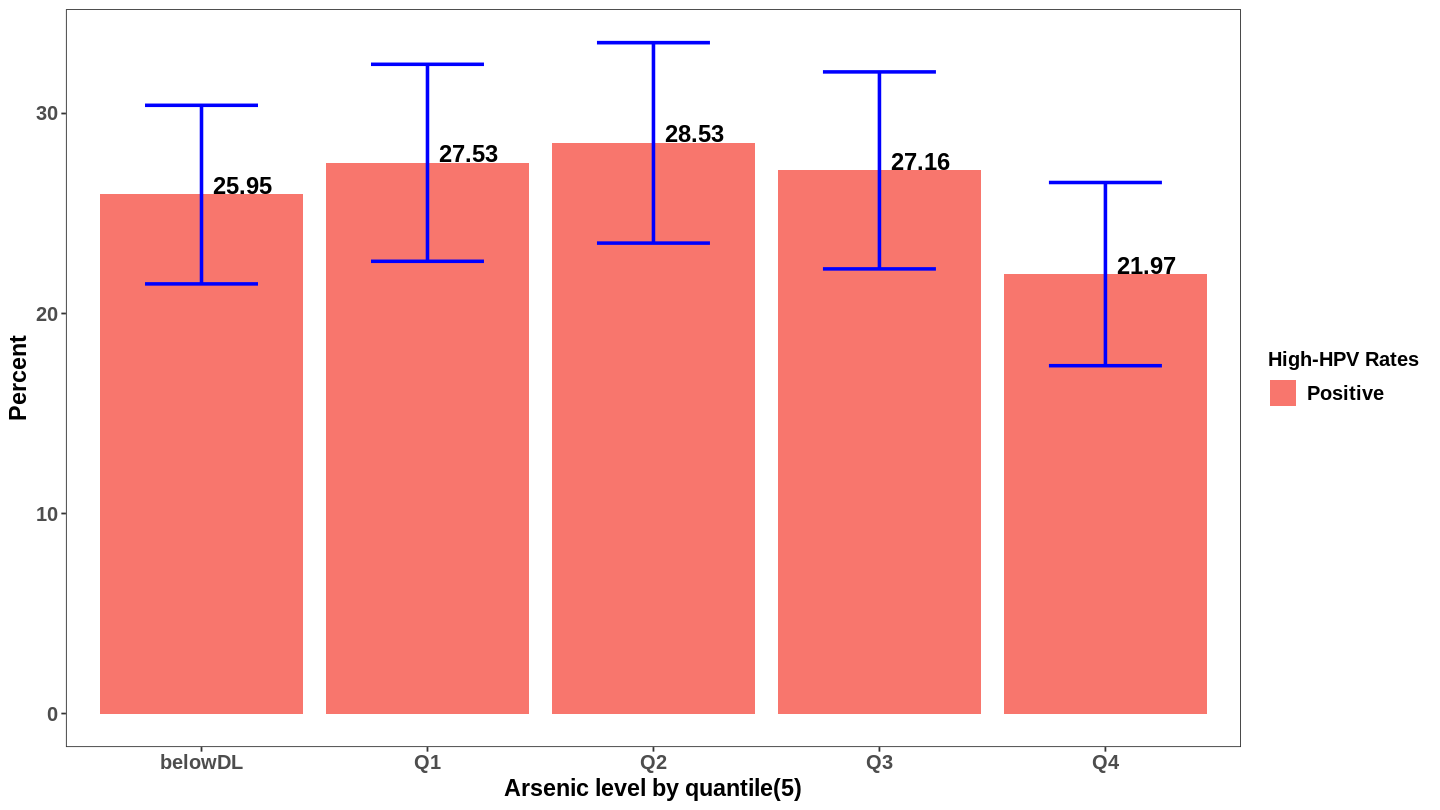

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUDMA.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level by quantile(5)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the percentage proportion of arsenic by quantile(5) that tested positive for high HPV, and their confidence intervals. The proportion below detection limit was 4.18 percent, first quantile was 3.56 percent, second quantile was 4.66 percent, third quantile was 5.10 percent and the the proportion in fourth quantile was 3.95 percent. 

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUDMA.q != "NA")

HSV_df %$% freq(URXUDMA.q)


URXUDMA.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,370,22.76923
Q1,316,19.44615
Q2,312,19.20000
Q3,313,19.26154
Q4,314,19.32308
Total,1625,100.00000


The total sample was 3900. Of which 25.15385 percent were below detection limit , 18.74359 percent were on first quantile, 18.69231 percent were in second quantile, 18.58974 percent were in third quantile and 18.82051 percent were in the fourth quantile.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUDMA.q)
tbl = HSV_df %$% table(low.HPV, URXUDMA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,347 [ 21.35% ],298 [ 18.34% ],294 [ 18.09% ],298 [ 18.34% ],293 [ 18.03% ],1530 [ 94.15% ]
Positive,23 [ 1.42% ],18 [ 1.11% ],18 [ 1.11% ],15 [ 0.92% ],21 [ 1.29% ],95 [ 5.85% ]
Total,370 [ 22.77% ],316 [ 19.45% ],312 [ 19.2% ],313 [ 19.26% ],314 [ 19.32% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.88723 
Fisher Exact Test P-value:  0.88422 





For the Chi-square test above, the p-value (0.56) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic by quantile(5) variable.




In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,URXUDMA.q) %>% group_by(URXUDMA.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUDMA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUDMA.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,347,21.35,370,93.78,91.32,96.24
belowDL,Positive,23,1.42,370,6.22,3.76,8.68
Q1,Negative,298,18.34,316,94.30,91.75,96.86
Q1,Positive,18,1.11,316,5.70,3.14,8.25
Q2,Negative,294,18.09,312,94.23,91.64,96.82
Q2,Positive,18,1.11,312,5.77,3.18,8.36
Q3,Negative,298,18.34,313,95.21,92.84,97.57
Q3,Positive,15,0.92,313,4.79,2.43,7.16
Q4,Negative,293,18.03,314,93.31,90.55,96.08


The Q3 group (0.96)  percent shows the highest positive rate for low HPV in arsenic by quantile(5).



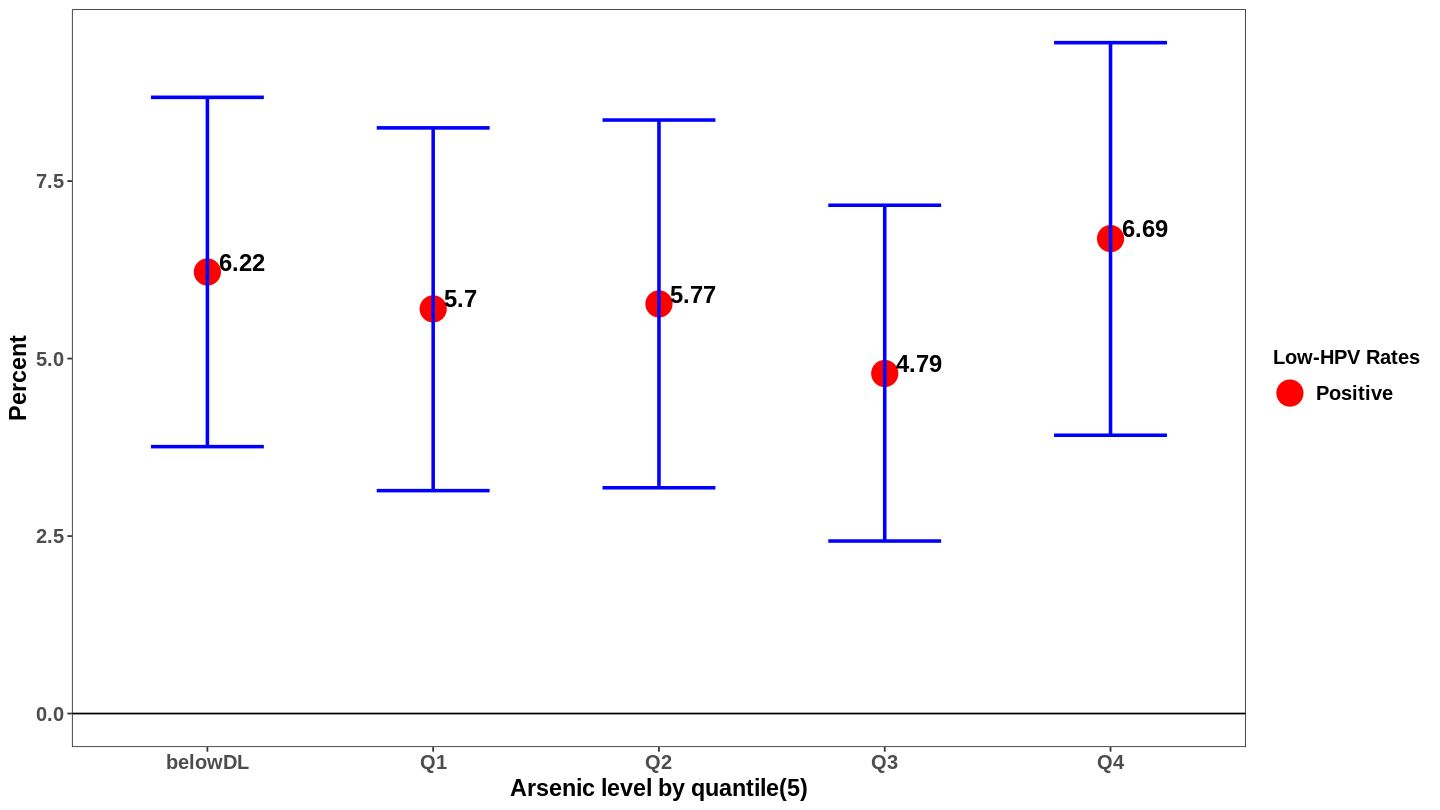

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUDMA.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(5)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(5) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.61 percent, first quantile was 0.96 percent, second quantile was 0.41 percent,  third quantile was 0.41 percent, and the fourth quantile was 0.41 percent. 



# **Arsenic by quantile (6)**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(URXUMMA.q != "NA")

HSV_df %$% freq(URXUMMA.q)


URXUMMA.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,429,26.40000
Q1,307,18.89231
Q2,301,18.52308
Q3,292,17.96923
Q4,296,18.21538
Total,1625,100.00000


From the frequency table above, the below detection limit (33.00) percent has the highest percentage of the total sample collected. Q1(17.38%), Q2(15.97%), Q3(16.79%), and Q4(16.84%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = URXUMMA.q)
tbl = HSV_df %$% table(high.HPV, URXUMMA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,319 [ 19.63% ],211 [ 12.98% ],220 [ 13.54% ],225 [ 13.85% ],224 [ 13.78% ],1199 [ 73.78% ]
Positive,110 [ 6.77% ],96 [ 5.91% ],81 [ 4.98% ],67 [ 4.12% ],72 [ 4.43% ],426 [ 26.22% ]
Total,429 [ 26.4% ],307 [ 18.89% ],301 [ 18.52% ],292 [ 17.97% ],296 [ 18.22% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.17346 
Fisher Exact Test P-value:  0.18116 


For the Chi-square test above, the p-value (0.15) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the arsenic by quantile(6) variable.




In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,URXUMMA.q) %>% group_by(URXUMMA.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUMMA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


URXUMMA.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,319,19.63,429,74.36,70.23,78.49
belowDL,Positive,110,6.77,429,25.64,21.51,29.77
Q1,Negative,211,12.98,307,68.73,63.54,73.92
Q1,Positive,96,5.91,307,31.27,26.08,36.46
Q2,Negative,220,13.54,301,73.09,68.08,78.10
Q2,Positive,81,4.98,301,26.91,21.90,31.92
Q3,Negative,225,13.85,292,77.05,72.23,81.88
Q3,Positive,67,4.12,292,22.95,18.12,27.77
Q4,Negative,224,13.78,296,75.68,70.79,80.56


The Q4 group (5.63)  percent shows the highest positive rate for high HPV in arsenic by quantile(6).



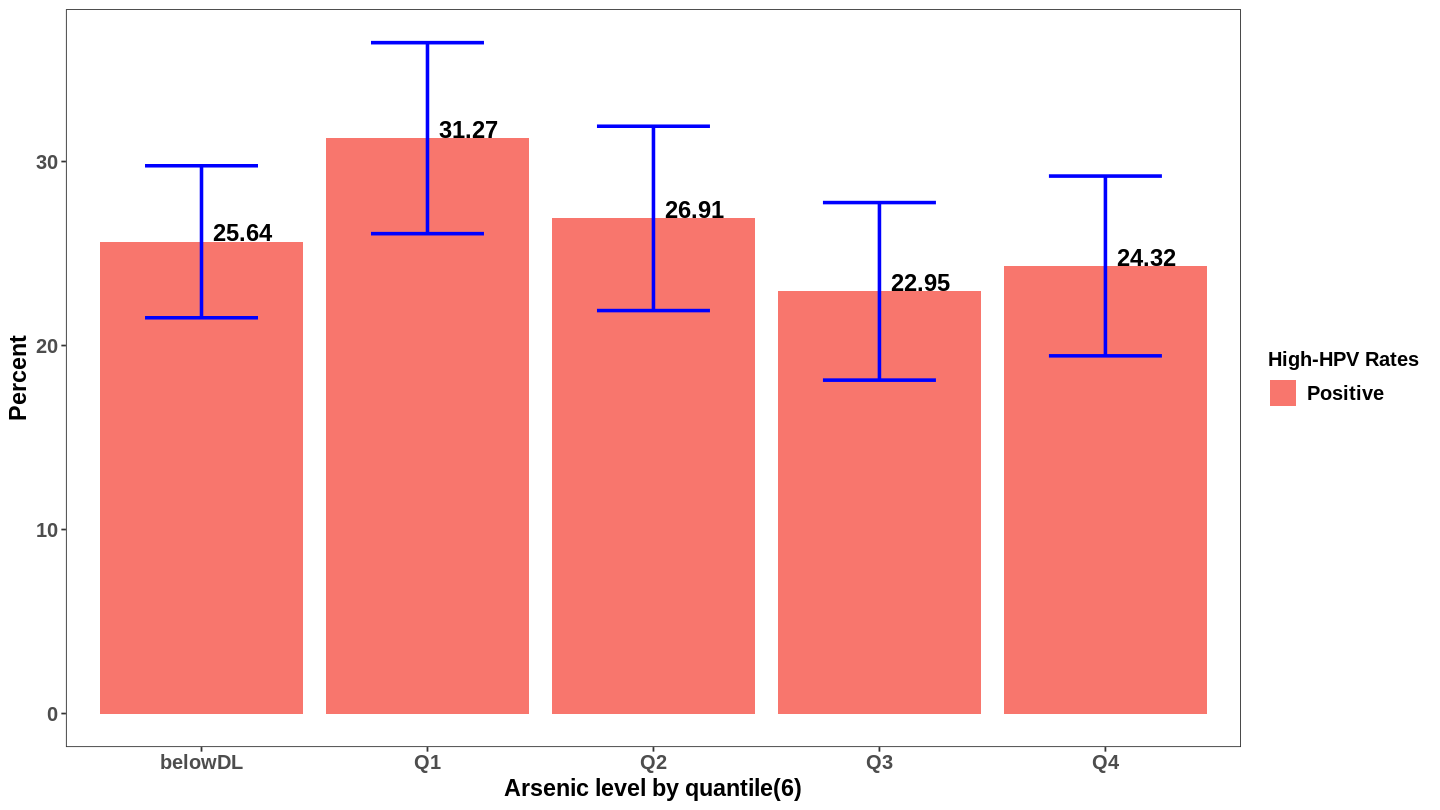

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(URXUMMA.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Arsenic level by quantile(6)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))



The bar plot above shows the percentage proportion of arsenic by quantile(6) that tested positive for high HPV, and their confidence intervals. The proportion below detection limit was 3.26 percent, first quantile was 4.13 percent, second quantile was 4.82 percent, third quantile was 4.58 percent, and the fourth quantile was 5.63 percent. 

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(URXUMMA.q != "NA")

HSV_df %$% freq(URXUMMA.q)


URXUMMA.q,Freq,% Freq
<fct>,<int>,<dbl>
belowDL,429,26.40000
Q1,307,18.89231
Q2,301,18.52308
Q3,292,17.96923
Q4,296,18.21538
Total,1625,100.00000


From the frequency table above, the below detection limit (33.00) percent has the highest percentage of the total sample collected. Q1(17.38%), Q2(15.97%), Q3(16.79%), and Q4(16.84%) are very close.

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = URXUMMA.q)
tbl = HSV_df %$% table(low.HPV, URXUMMA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,belowDL,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,403 [ 24.8% ],294 [ 18.09% ],285 [ 17.54% ],268 [ 16.49% ],280 [ 17.23% ],1530 [ 94.15% ]
Positive,26 [ 1.6% ],13 [ 0.8% ],16 [ 0.98% ],24 [ 1.48% ],16 [ 0.98% ],95 [ 5.85% ]
Total,429 [ 26.4% ],307 [ 18.89% ],301 [ 18.52% ],292 [ 17.97% ],296 [ 18.22% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.31612 
Fisher Exact Test P-value:  0.34263 


For the Chi-square test above, the p-value (0.61) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the arsenic by quantile(6) variable.




In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,URXUMMA.q) %>% group_by(URXUMMA.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(URXUMMA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


URXUMMA.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
belowDL,Negative,403,24.80,429,93.94,91.68,96.20
belowDL,Positive,26,1.60,429,6.06,3.80,8.32
Q1,Negative,294,18.09,307,95.77,93.51,98.02
Q1,Positive,13,0.80,307,4.23,1.98,6.49
Q2,Negative,285,17.54,301,94.68,92.15,97.22
Q2,Positive,16,0.98,301,5.32,2.78,7.85
Q3,Negative,268,16.49,292,91.78,88.63,94.93
Q3,Positive,24,1.48,292,8.22,5.07,11.37
Q4,Negative,280,17.23,296,94.59,92.02,97.17


The Q1 group (0.88)  percent shows the highest positive rate for high HPV in arsenic by quantile(6).



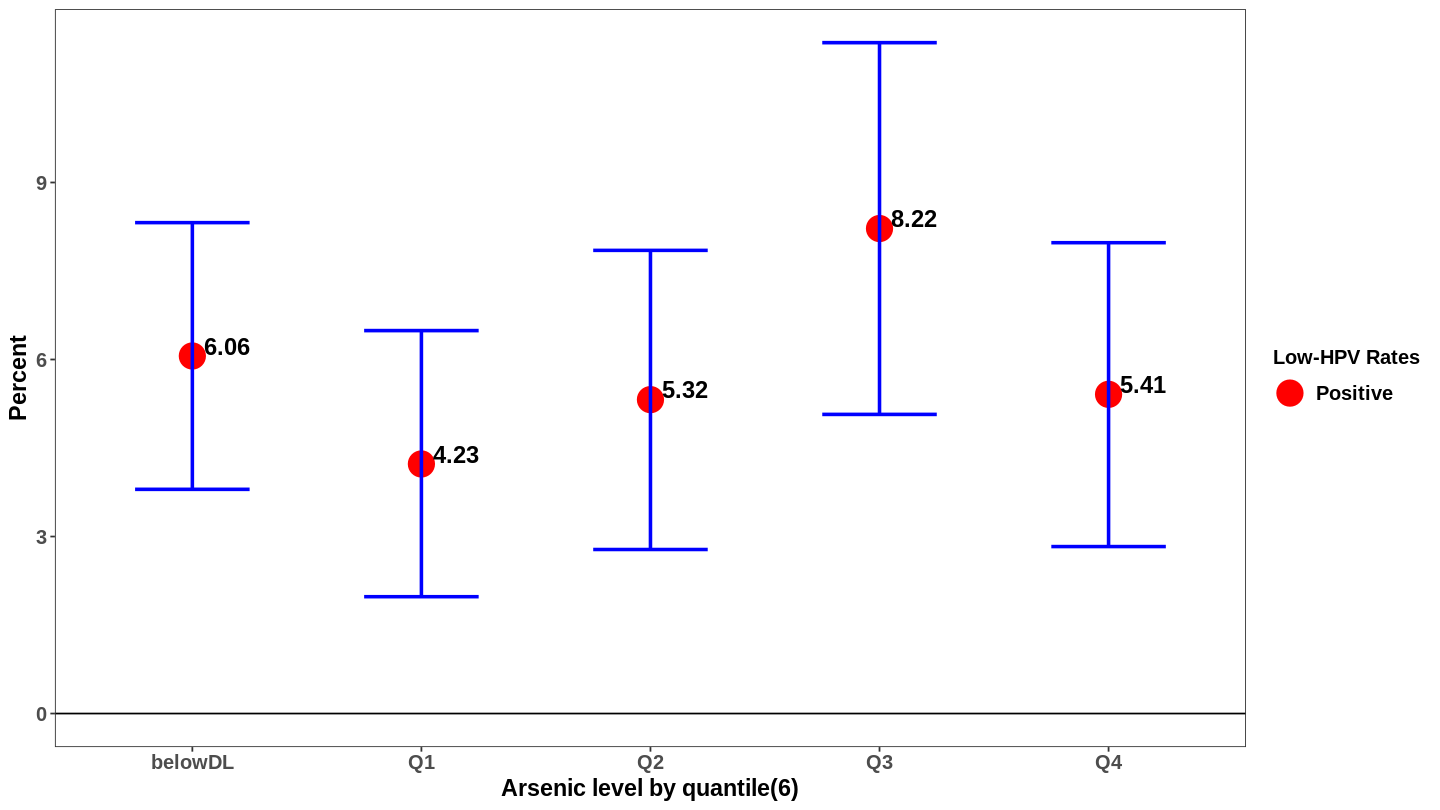

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(URXUMMA.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Arsenic level by quantile(6)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The plot above shows the percentage proportion of arsenic by quantile(6) that tested positive for low HPV, and their confidence intervals. The proportion below detection limit was 0.47 percent, first quantile was 0.88 percent, second quantile was 0.32 percent, third quantile was 0.76 percent, and the fourth quantile was 0.46 percent. 

# **Poverty Income Ratio**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(PIR != "NA")

HSV_df %$% freq(PIR)


PIR,Freq,% Freq
<fct>,<int>,<dbl>
1.0,1074,32.64438
2.0,1185,36.01824
3.0,1031,31.33739
Total,3290,100.00000


From the frequency table above, the poverty income ratio from 130 to 350 which is represented as "2"(36.07) percent has the highest percent of the total sample collected. 



In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = PIR)
tbl = HSV_df %$% table(high.HPV, PIR)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,1.0,2.0,3.0,Total
,<chr>,<chr>,<chr>,<chr>
Negative,802 [ 24.38% ],904 [ 27.48% ],831 [ 25.26% ],2537 [ 77.11% ]
Positive,272 [ 8.27% ],281 [ 8.54% ],200 [ 6.08% ],753 [ 22.89% ]
Total,1074 [ 32.64% ],1185 [ 36.02% ],1031 [ 31.34% ],3290 [ 100% ]




 Chi-Square Test P-value:  0.00372 
Fisher Exact Test P-value:  0.00343 




For the Chi-square test above, the p-value (0.58) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the PIR variable.


In [ ]:

cat("\n\n\n")

high_hpv_var = HSV_df %>% select(high.HPV,PIR) %>% group_by(PIR, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(PIR) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


PIR,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.0,Negative,802,24.38,1074,74.67,72.07,77.28
1.0,Positive,272,8.27,1074,25.33,22.72,27.93
2.0,Negative,904,27.48,1185,76.29,73.87,78.71
2.0,Positive,281,8.54,1185,23.71,21.29,26.13
3.0,Negative,831,25.26,1031,80.60,78.19,83.02
3.0,Positive,200,6.08,1031,19.40,16.98,21.81



Group "1" (3.76) percent shows the highest positive rate for high HPV in poverty income ratio.



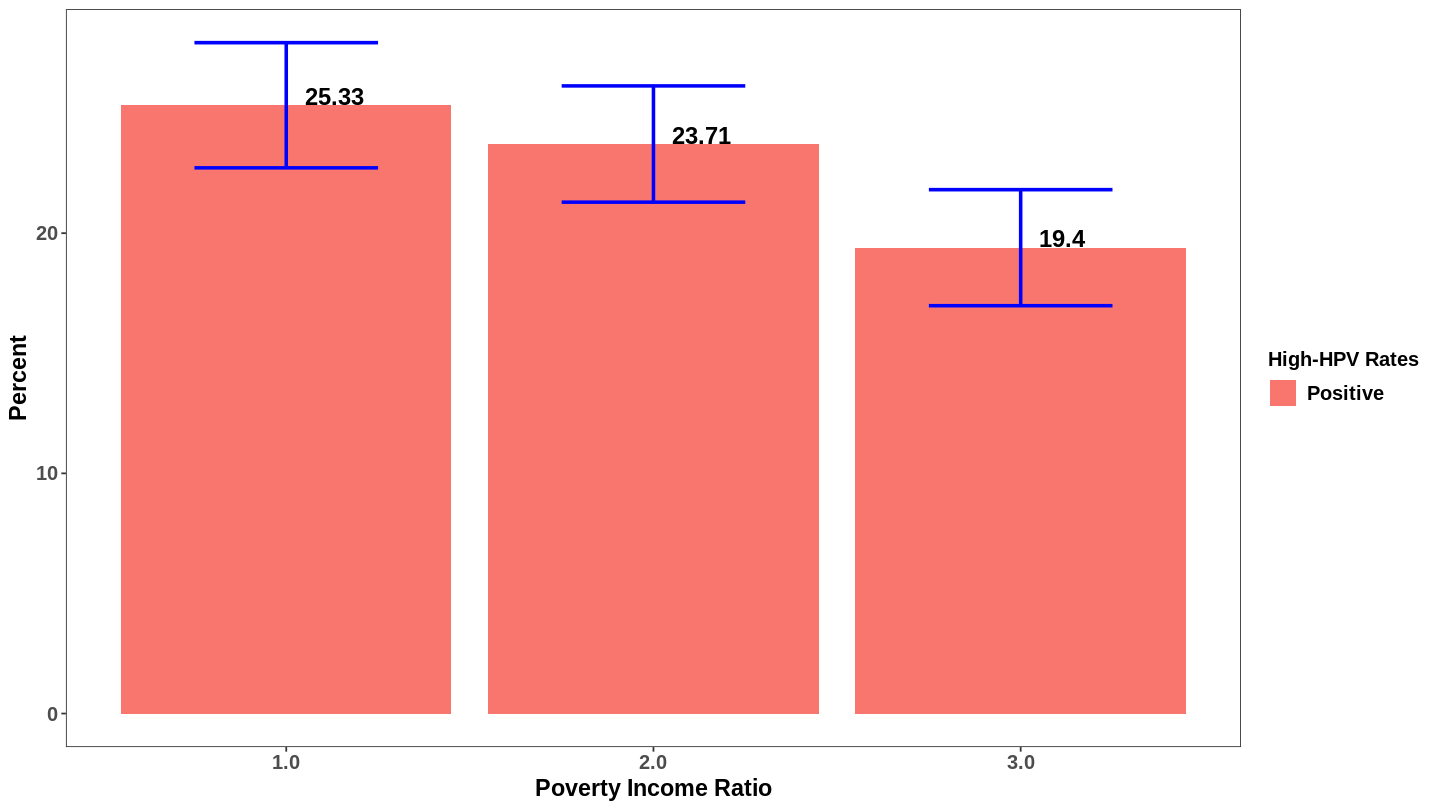

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(PIR), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Poverty Income Ratio", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion, and  confidence intervals of people that tested positive for high HPV based on their poverty income ratio. The proportion below 130 was 3.76 percent, from 130 and 350 was 3.55 percent, above 350 was 3.23 percent.

### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(PIR != "NA")

HSV_df %$% freq(PIR)


PIR,Freq,% Freq
<fct>,<int>,<dbl>
1.0,1074,32.64438
2.0,1185,36.01824
3.0,1031,31.33739
Total,3290,100.00000


From the frequency table above, poverty income ratio between 130 to 350 is represented as "2"(36.07) percent has the highest percent of the total sample collected. 



In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = PIR)
tbl = HSV_df %$% table(low.HPV, PIR)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,1.0,2.0,3.0,Total
,<chr>,<chr>,<chr>,<chr>
Negative,1026 [ 31.19% ],1119 [ 34.01% ],984 [ 29.91% ],3129 [ 95.11% ]
Positive,48 [ 1.46% ],66 [ 2.01% ],47 [ 1.43% ],161 [ 4.89% ]
Total,1074 [ 32.64% ],1185 [ 36.02% ],1031 [ 31.34% ],3290 [ 100% ]




 Chi-Square Test P-value:  0.401 
Fisher Exact Test P-value:  0.40955 







For the Chi-square test above, the p-value (0.25) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the PIR variable.


In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,PIR) %>% group_by(PIR, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(PIR) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


PIR,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1.0,Negative,1026,31.19,1074,95.53,94.29,96.77
1.0,Positive,48,1.46,1074,4.47,3.23,5.71
2.0,Negative,1119,34.01,1185,94.43,93.12,95.74
2.0,Positive,66,2.01,1185,5.57,4.26,6.88
3.0,Negative,984,29.91,1031,95.44,94.17,96.71
3.0,Positive,47,1.43,1031,4.56,3.29,5.83



Group "2" (0.63) percent shows the highest positive rate for low HPV.



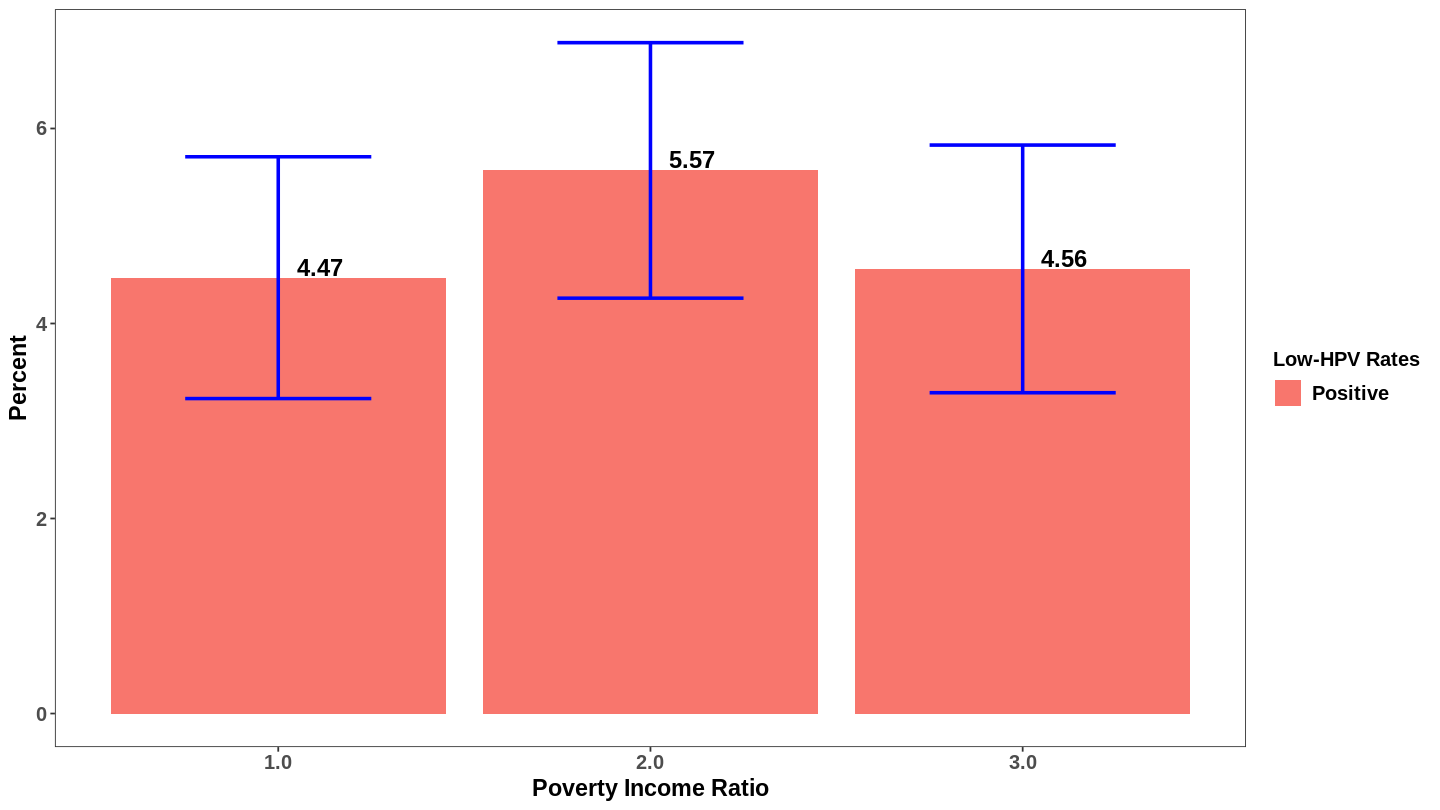

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(PIR), y = Percentage, fill = factor(low.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Poverty Income Ratio", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))










The bar plot above shows the percentage proportion, and  confidence intervals of people that tested positive for low HPV based on their poverty income ratio. The proportion below 130 was 0.38 percent, between 130 and 350 was 0.63 percent, above 350 was 0.36 percent.

# **BMI**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(BMI.f != "NA")

HSV_df %$% freq(BMI.f)


BMI.f,Freq,% Freq
<fct>,<int>,<dbl>
Underweight,52,1.452108
Normal weight,1063,29.684446
Overweight,1258,35.129852
Obesity,1208,33.733594
Total,3581,100.000000


From the frequency table above, obesity (38.80) percent has the highest percent of the total sample collected. 



In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = BMI.f)
tbl = HSV_df %$% table(high.HPV, BMI.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Underweight,Normal weight,Overweight,Obesity,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,44 [ 1.23% ],822 [ 22.95% ],960 [ 26.81% ],942 [ 26.31% ],2768 [ 77.3% ]
Positive,8 [ 0.22% ],241 [ 6.73% ],298 [ 8.32% ],266 [ 7.43% ],813 [ 22.7% ]
Total,52 [ 1.45% ],1063 [ 29.68% ],1258 [ 35.13% ],1208 [ 33.73% ],3581 [ 100% ]




 Chi-Square Test P-value:  0.45662 
Fisher Exact Test P-value:  0.47933 







For the Chi-square test above, the p-value (0.90) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the high HPV prevelence and the BMI variable.


In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,BMI.f) %>% group_by(BMI.f, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(BMI.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100,  Lower_CI  = round( Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


BMI.f,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Underweight,Negative,44,1.23,52,84.62,74.81,94.42
Underweight,Positive,8,0.22,52,15.38,5.58,25.19
Normal weight,Negative,822,22.95,1063,77.33,74.81,79.85
Normal weight,Positive,241,6.73,1063,22.67,20.15,25.19
Overweight,Negative,960,26.81,1258,76.31,73.96,78.66
Overweight,Positive,298,8.32,1258,23.69,21.34,26.04
Obesity,Negative,942,26.31,1208,77.98,75.64,80.32
Obesity,Positive,266,7.43,1208,22.02,19.68,24.36


The positive rate for high HPV in each group are close. The overweight (3.70) percent shows the highest positive rate for high HPV.



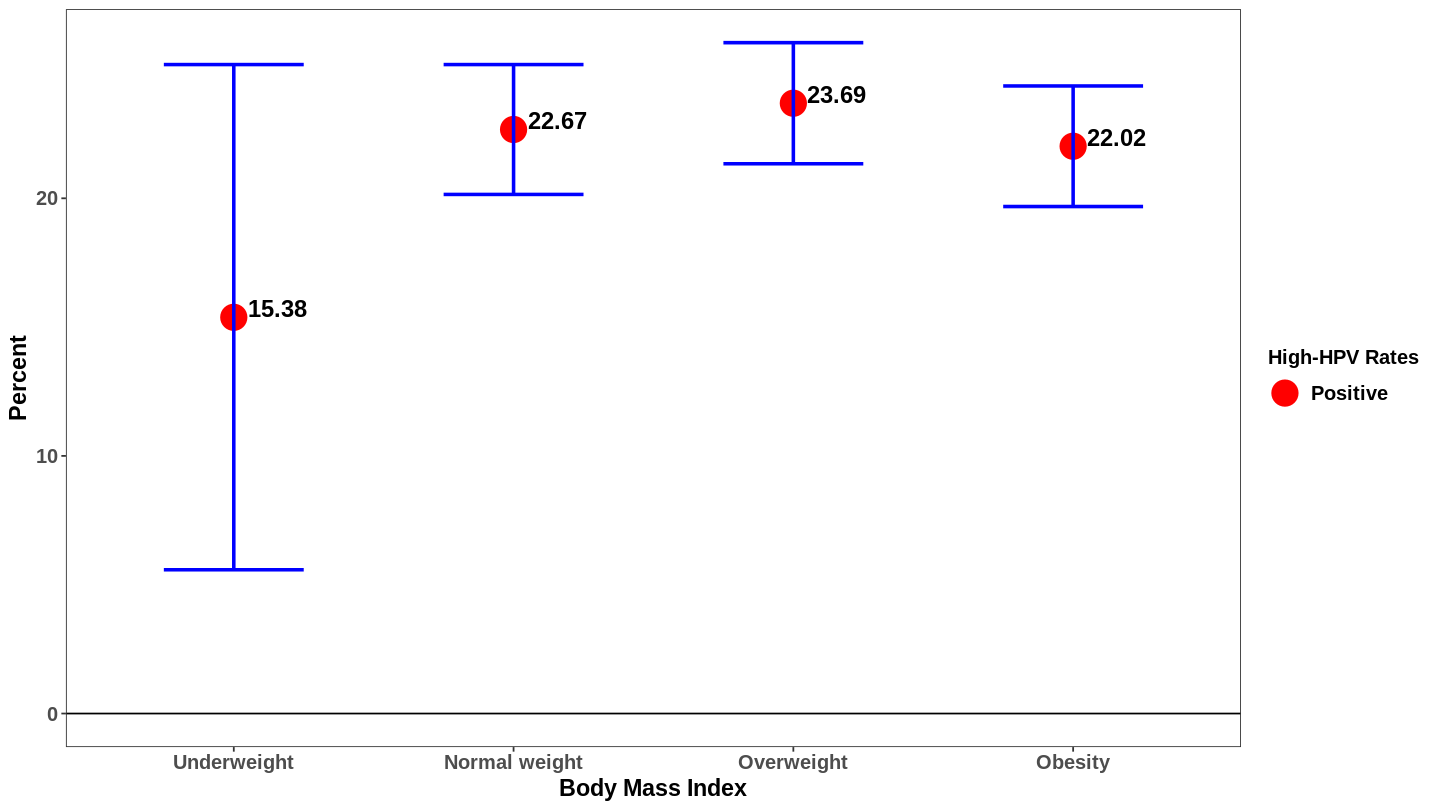

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(BMI.f), y = Percentage, fill = factor(high.HPV))) +
 # geom_bar(position="dodge", stat="identity", width = 0.9) +
   geom_point( colour = "red", size = 7) +
   geom_hline(yintercept = 0) +
  labs(x = "Body Mass Index", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin =  Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The plot above shows the percentage proportion, and  confidence intervals of people that tested positive for high HPV based on their body mass index. The proportion underweight was 3.01 percent, normal weight was 3.39 percent, overweight was 3.70 percent, and obesed was 3.44 percent.




### **Low HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(BMI.f != "NA")

HSV_df %$% freq(BMI.f)


BMI.f,Freq,% Freq
<fct>,<int>,<dbl>
Underweight,52,1.452108
Normal weight,1063,29.684446
Overweight,1258,35.129852
Obesity,1208,33.733594
Total,3581,100.000000


From the frequency table above, obesity (38.80) percent has the highest percent of the total sample collected. 



In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = BMI.f)
tbl = HSV_df %$% table(low.HPV, BMI.f)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")


,Underweight,Normal weight,Overweight,Obesity,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,51 [ 1.42% ],1015 [ 28.34% ],1187 [ 33.15% ],1148 [ 32.06% ],3401 [ 94.97% ]
Positive,1 [ 0.03% ],48 [ 1.34% ],71 [ 1.98% ],60 [ 1.68% ],180 [ 5.03% ]
Total,52 [ 1.45% ],1063 [ 29.68% ],1258 [ 35.13% ],1208 [ 33.73% ],3581 [ 100% ]




 Chi-Square Test P-value:  0.44985 
Fisher Exact Test P-value:  0.52936 




For the Chi-square test above, the p-value (0.72) greater than significance level (0.05) indicates there is evidence to conclude that there is no association between the low HPV prevelence and the BMI variable.


In [ ]:

cat("\n\n\n")

low_hpv_var = HSV_df %>% select(low.HPV,BMI.f) %>% group_by(BMI.f, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(BMI.f) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


BMI.f,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Underweight,Negative,51,1.42,52,98.08,94.34,101.81
Underweight,Positive,1,0.03,52,1.92,-1.81,5.66
Normal weight,Negative,1015,28.34,1063,95.48,94.24,96.73
Normal weight,Positive,48,1.34,1063,4.52,3.27,5.76
Overweight,Negative,1187,33.15,1258,94.36,93.08,95.63
Overweight,Positive,71,1.98,1258,5.64,4.37,6.92
Obesity,Negative,1148,32.06,1208,95.03,93.81,96.26
Obesity,Positive,60,1.68,1208,4.97,3.74,6.19


The overwight (0.60) percent shows the highest positive rate for high HPV.



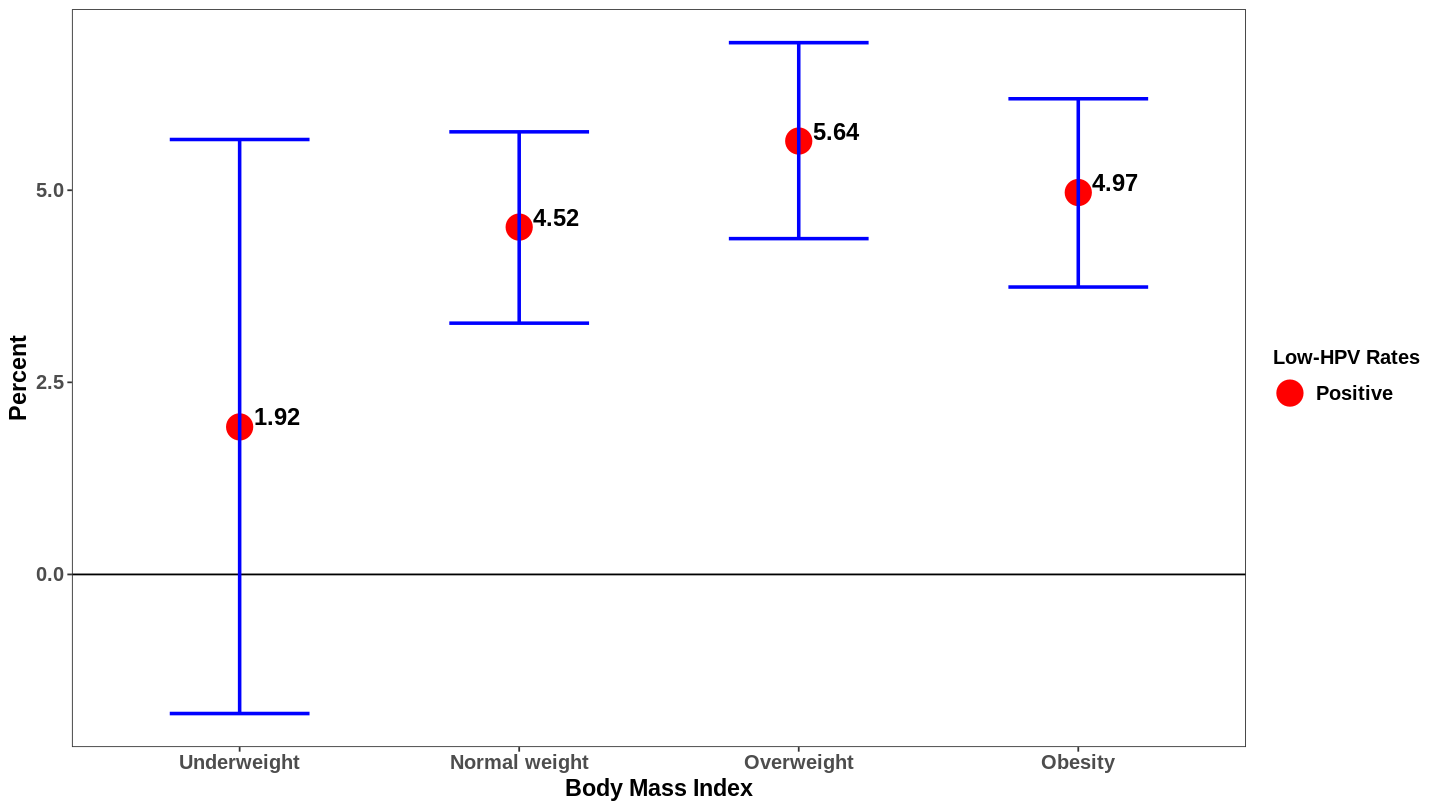

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(BMI.f), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Body Mass Index", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))












The plot above shows the percentage proportion, and  confidence intervals of people that tested positive for high HPV based on their body mass index. The proportion underweight was 0.60 percent, normal weight was 0.42 percent, overweight was 0.58 percent, and obesed was 0.40 percent.

# **Total Arsenic by Quantile 1**









### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(TUA.q != "NA")

HSV_df %$% freq(TUA.q)


TUA.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,409,25.15375
Q2,404,24.84625
Q3,406,24.96925
Q4,407,25.03075
Total,1626,100.00000


From the frequency table above, the Q1 (39.27) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = TUA.q)
tbl = HSV_df %$% table(high.HPV, TUA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,303 [ 18.63% ],291 [ 17.9% ],294 [ 18.08% ],312 [ 19.19% ],1200 [ 73.8% ]
Positive,106 [ 6.52% ],113 [ 6.95% ],112 [ 6.89% ],95 [ 5.84% ],426 [ 26.2% ]
Total,409 [ 25.15% ],404 [ 24.85% ],406 [ 24.97% ],407 [ 25.03% ],1626 [ 100% ]




 Chi-Square Test P-value:  0.42429 
Fisher Exact Test P-value:  0.42032 





For the Chi-square test above, the p-value (0.29) less than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is significantly associated with the total arsenic by quantile(1) variable. 

In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,TUA.q) %>% group_by(TUA.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
  mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


TUA.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,303,18.63,409,74.08,69.84,78.33
Q1,Positive,106,6.52,409,25.92,21.67,30.16
Q2,Negative,291,17.90,404,72.03,67.65,76.41
Q2,Positive,113,6.95,404,27.97,23.59,32.35
Q3,Negative,294,18.08,406,72.41,68.07,76.76
Q3,Positive,112,6.89,406,27.59,23.24,31.93
Q4,Negative,312,19.19,407,76.66,72.55,80.77
Q4,Positive,95,5.84,407,23.34,19.23,27.45


The Q3 (5.47) percent shows the highest positive rate for high HPV.



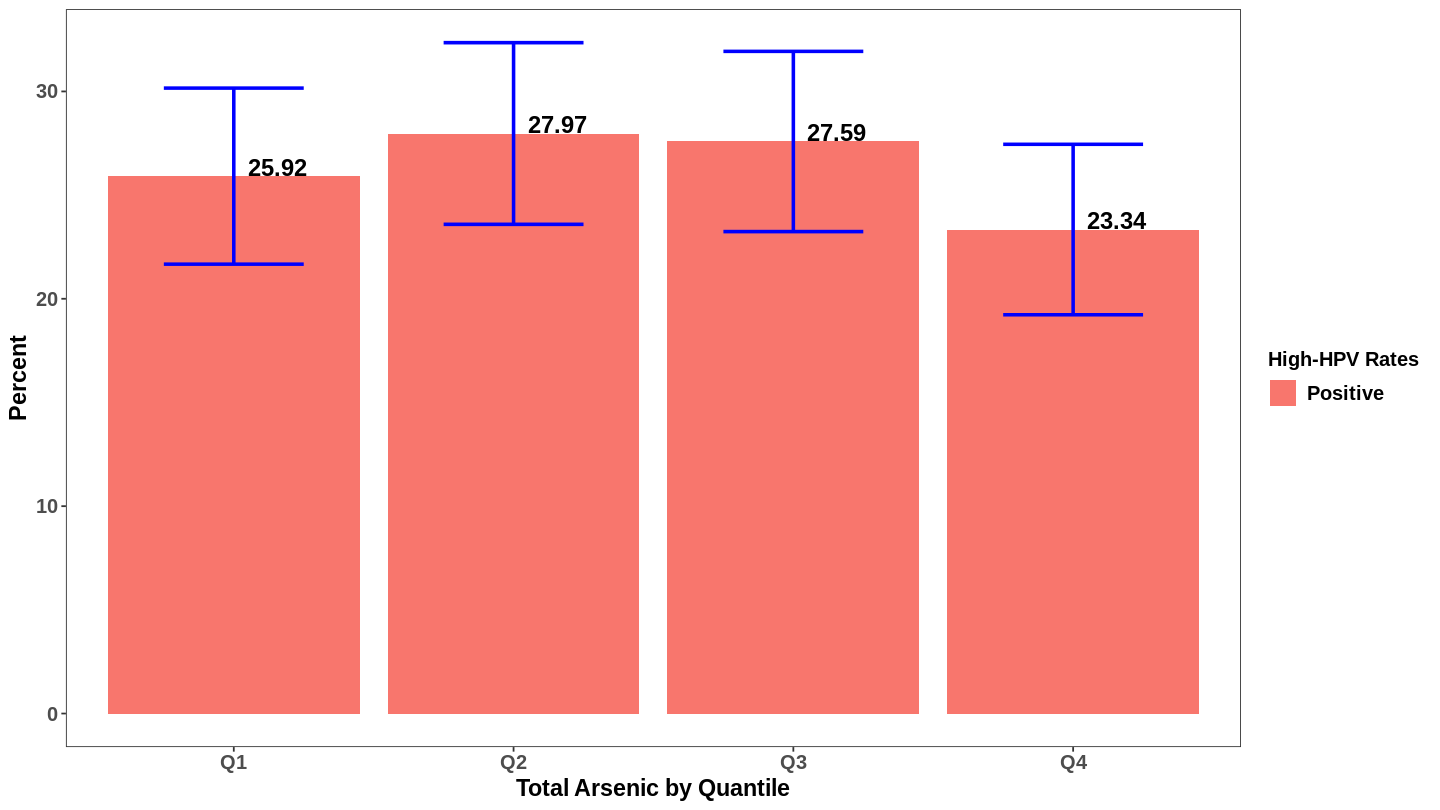

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(TUA.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Arsenic by Quantile", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion of total arsenic by quantile(1) that tested positive for high HPV,and their confidence intervals. The proportion in first quantile was 4.12 percent, second quantile was 4.59 percent, third quantile was 5.47 percent, and fourth quantile was 2.46 percent. 

### **Low HPV Section**

In [ ]:



HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(TUA.q != "NA")

HSV_df %$% freq(TUA.q)


TUA.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,409,25.15375
Q2,404,24.84625
Q3,406,24.96925
Q4,407,25.03075
Total,1626,100.00000


From the frequency table above, the Q1 (39.27) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = TUA.q)
tbl = HSV_df %$% table(low.HPV, TUA.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,383 [ 23.55% ],385 [ 23.68% ],386 [ 23.74% ],377 [ 23.19% ],1531 [ 94.16% ]
Positive,26 [ 1.6% ],19 [ 1.17% ],20 [ 1.23% ],30 [ 1.85% ],95 [ 5.84% ]
Total,409 [ 25.15% ],404 [ 24.85% ],406 [ 24.97% ],407 [ 25.03% ],1626 [ 100% ]




 Chi-Square Test P-value:  0.32093 
Fisher Exact Test P-value:  0.32971 





For the Chi-square test above, the p-value (0.18) greater than significance level (0.05) indicates there is evidence to conclude that the low HPV prevelence is not associated with the total arsenic by quantile(1) variable. 

In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,TUA.q) %>% group_by(TUA.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


TUA.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,383,23.55,409,93.64,91.28,96.01
Q1,Positive,26,1.60,409,6.36,3.99,8.72
Q2,Negative,385,23.68,404,95.30,93.23,97.36
Q2,Positive,19,1.17,404,4.70,2.64,6.77
Q3,Negative,386,23.74,406,95.07,92.97,97.18
Q3,Positive,20,1.23,406,4.93,2.82,7.03
Q4,Negative,377,23.19,407,92.63,90.09,95.17
Q4,Positive,30,1.85,407,7.37,4.83,9.91


The Q3 group (0.89) percent shows the highest positive rate for low HPV.



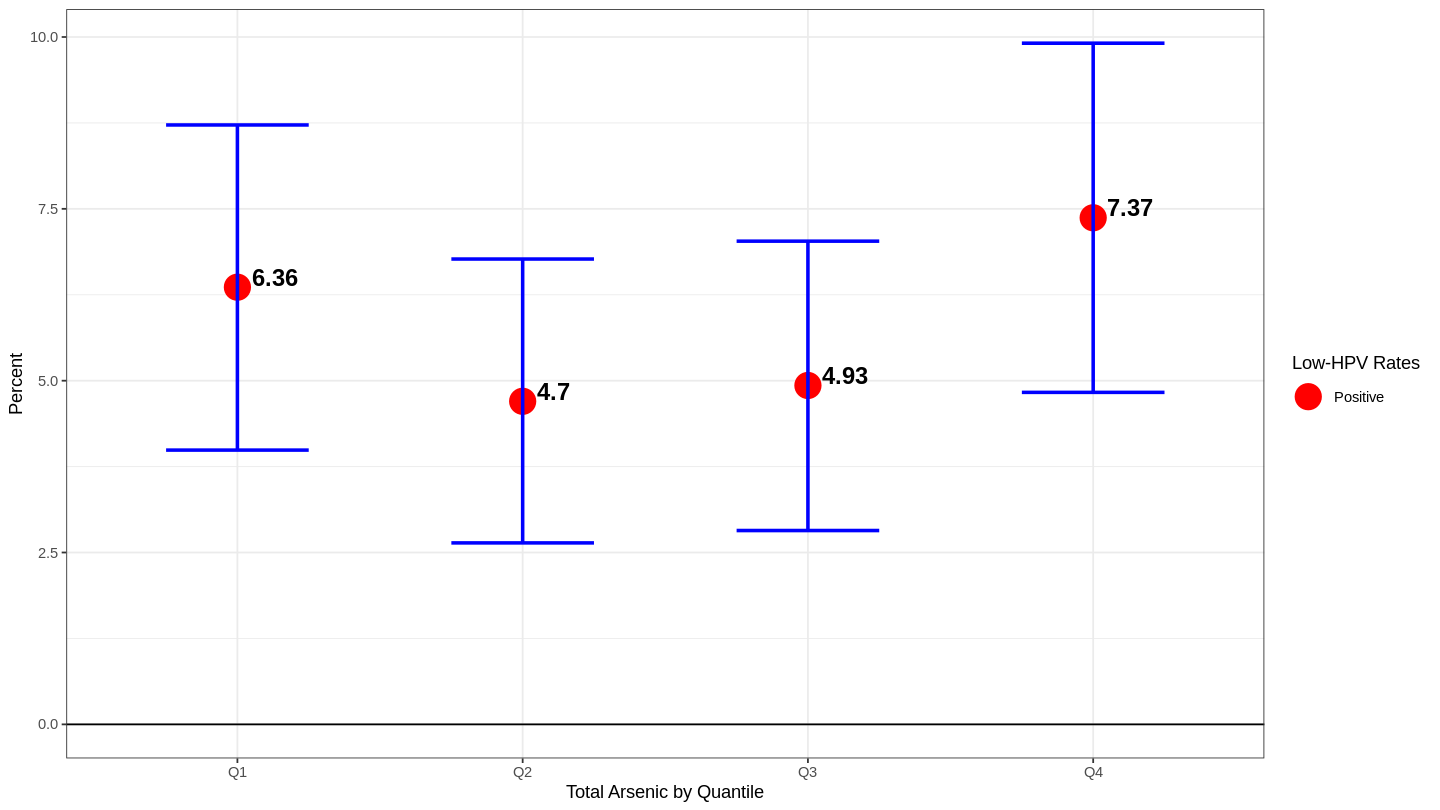

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(TUA.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_hline(yintercept = 0) +
  geom_point( colour = "red", size = 7) +
  labs(x = "Total Arsenic by Quantile", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() 
  #+
  # theme(panel.grid.major = element_blank(), panel.graid.minor = element_blank())+
  # theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
  #       axis.title=element_text(size=14,face="bold"))







The plot above shows the percentage proportion of total arsenic by quantile(1) that tested positive for low high HPV, and their confidence intervals. The proportion in first quantile was 0.72 percent, second quantile was 0.24 percent, third quantile was 0.89 percent, and fourth quantile was 0.27 percent. 

# **Total Arsenic by Quantile 2**

### **High HPV Section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(TUA1.q != "NA") %>% filter(grepl("Q", TUA1.q ))

HSV_df %$% freq(TUA1.q)


TUA1.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,408,25.10769
Q2,409,25.16923
Q3,402,24.73846
Q4,406,24.98462
Total,1625,100.00000


From the frequency table above, the Q1 (34.01) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = TUA1.q)
tbl = HSV_df %$% table(high.HPV, TUA1.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,304 [ 18.71% ],291 [ 17.91% ],291 [ 17.91% ],313 [ 19.26% ],1199 [ 73.78% ]
Positive,104 [ 6.4% ],118 [ 7.26% ],111 [ 6.83% ],93 [ 5.72% ],426 [ 26.22% ]
Total,408 [ 25.11% ],409 [ 25.17% ],402 [ 24.74% ],406 [ 24.98% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.23247 
Fisher Exact Test P-value:  0.23003 





For the Chi-square test above, the p-value (0.44) greater than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is not associated with the total arsenic by quantile(2) variable. 

In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,TUA1.q) %>% group_by(TUA1.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA1.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
  mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var


TUA1.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,304,18.71,408,74.51,70.28,78.74
Q1,Positive,104,6.40,408,25.49,21.26,29.72
Q2,Negative,291,17.91,409,71.15,66.76,75.54
Q2,Positive,118,7.26,409,28.85,24.46,33.24
Q3,Negative,291,17.91,402,72.39,68.02,76.76
Q3,Positive,111,6.83,402,27.61,23.24,31.98
Q4,Negative,313,19.26,406,77.09,73.01,81.18
Q4,Positive,93,5.72,406,22.91,18.82,26.99


The Q3 group (5.28) percent shows the highest positive rate for high HPV.



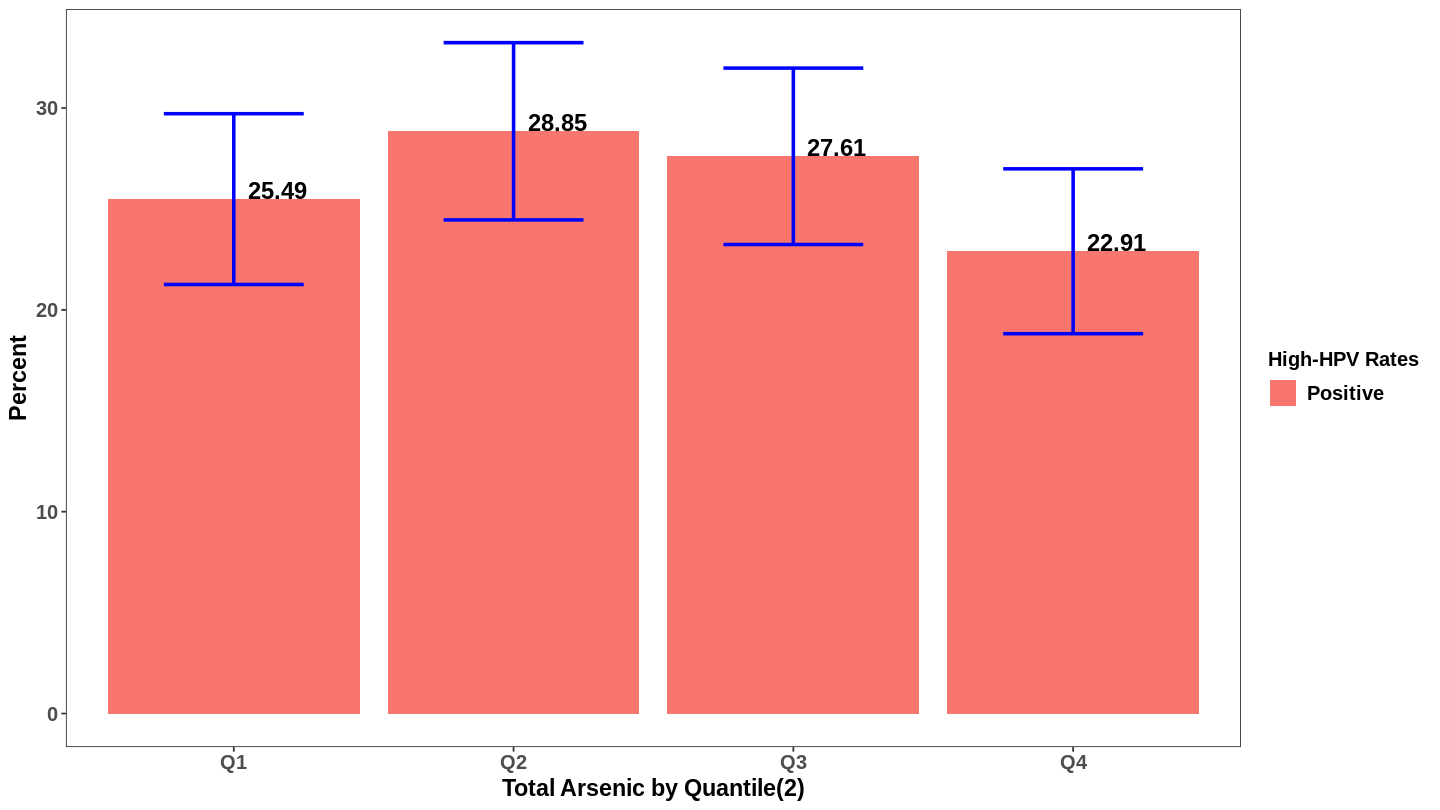

In [ ]:

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(TUA1.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Arsenic by Quantile(2)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))





The bar plot above shows the percentage proportion of total arsenic by quantile(2) that tested positive for high HPV, and their confidence intervals. The proportion in first quantile was 4.00 percent, second quantile was 4.59 percent, third quantile was 5.28 percent, and fourth quantile was 3.67 percent. 

 

### **Low HPV Section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(TUA1.q!= "NA") %>% filter(grepl("Q", TUA1.q ))

HSV_df %$% freq(TUA1.q)


TUA1.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,408,25.10769
Q2,409,25.16923
Q3,402,24.73846
Q4,406,24.98462
Total,1625,100.00000


From the frequency table above, the Q1 (34.01) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = TUA1.q)
tbl = HSV_df %$% table(low.HPV, TUA1.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,381 [ 23.45% ],387 [ 23.82% ],381 [ 23.45% ],381 [ 23.45% ],1530 [ 94.15% ]
Positive,27 [ 1.66% ],22 [ 1.35% ],21 [ 1.29% ],25 [ 1.54% ],95 [ 5.85% ]
Total,408 [ 25.11% ],409 [ 25.17% ],402 [ 24.74% ],406 [ 24.98% ],1625 [ 100% ]




 Chi-Square Test P-value:  0.81148 
Fisher Exact Test P-value:  0.81062 





For the Chi-square test above, the p-value (0.17) greater than significance level (0.05) indicates there is evidence to conclude that the low HPV prevelence is not associated with the total arsenic by quantile(2) variable. 

In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,TUA1.q) %>% group_by(TUA1.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA1.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


TUA1.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,381,23.45,408,93.38,90.97,95.79
Q1,Positive,27,1.66,408,6.62,4.21,9.03
Q2,Negative,387,23.82,409,94.62,92.43,96.81
Q2,Positive,22,1.35,409,5.38,3.19,7.57
Q3,Negative,381,23.45,402,94.78,92.60,96.95
Q3,Positive,21,1.29,402,5.22,3.05,7.40
Q4,Negative,381,23.45,406,93.84,91.50,96.18
Q4,Positive,25,1.54,406,6.16,3.82,8.50


The Q1 group (1.07) percent shows the highest positive rate for low HPV.



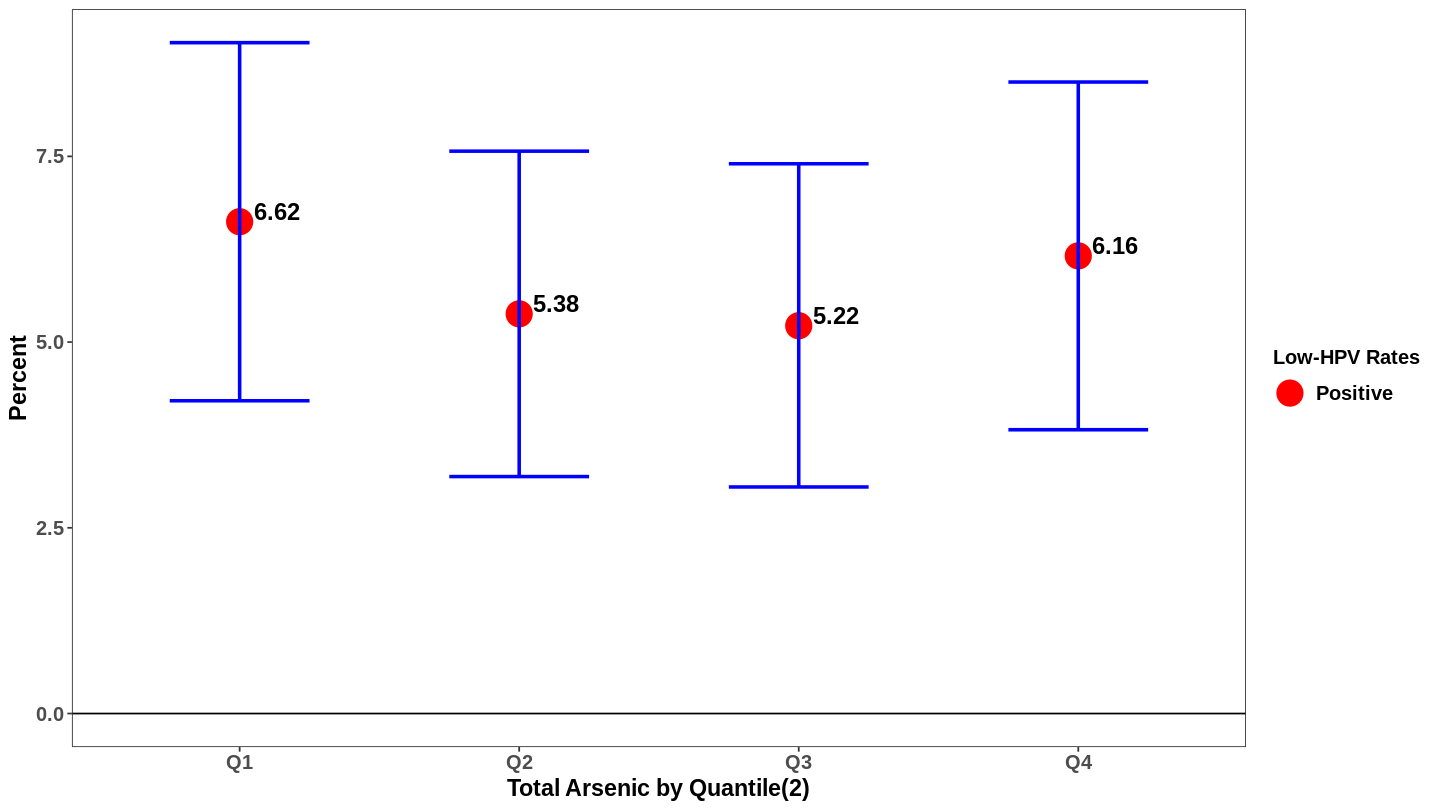

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(TUA1.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Total Arsenic by Quantile(2)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))







The bar plot above shows the percentage proportion of total arsenic by quantile(2) that tested positive for low HPV, and their confidence intervals. The proportion in first quantile was 1.07 percent, second quantile was 0.38 percent, third quantile was 0.42 percent, and fourth quantile was 0.44 percent. 

 

# **Total Arsenic by Quantile 3**

### **High HPV Section**

In [ ]:


HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(high.HPV != "NA") %>% filter(TUA2.q!= "NA")  %>% filter(grepl("Q", TUA2.q ))

HSV_df %$% freq(TUA2.q)


TUA2.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,407,25.13897
Q2,403,24.89191
Q3,404,24.95368
Q4,405,25.01544
Total,1619,100.00000


From the frequency table above, the Q1 (39.81) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = high.HPV, y = TUA2.q)
tbl = HSV_df %$% table(high.HPV, TUA2.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,309 [ 19.09% ],286 [ 17.67% ],290 [ 17.91% ],310 [ 19.15% ],1195 [ 73.81% ]
Positive,98 [ 6.05% ],117 [ 7.23% ],114 [ 7.04% ],95 [ 5.87% ],424 [ 26.19% ]
Total,407 [ 25.14% ],403 [ 24.89% ],404 [ 24.95% ],405 [ 25.02% ],1619 [ 100% ]




 Chi-Square Test P-value:  0.16836 
Fisher Exact Test P-value:  0.16888 





For the Chi-square test above, the p-value (0.10) greater than significance level (0.05) indicates there is evidence to conclude that the high HPV prevelence is not associated with the total arsenic by quantile(3) variable. 

TUA2.q,high.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,309,19.09,407,75.92,71.77,80.08
Q1,Positive,98,6.05,407,24.08,19.92,28.23
Q2,Negative,286,17.67,403,70.97,66.54,75.40
Q2,Positive,117,7.23,403,29.03,24.60,33.46
Q3,Negative,290,17.91,404,71.78,67.39,76.17
Q3,Positive,114,7.04,404,28.22,23.83,32.61
Q4,Negative,310,19.15,405,76.54,72.42,80.67
Q4,Positive,95,5.87,405,23.46,19.33,27.58


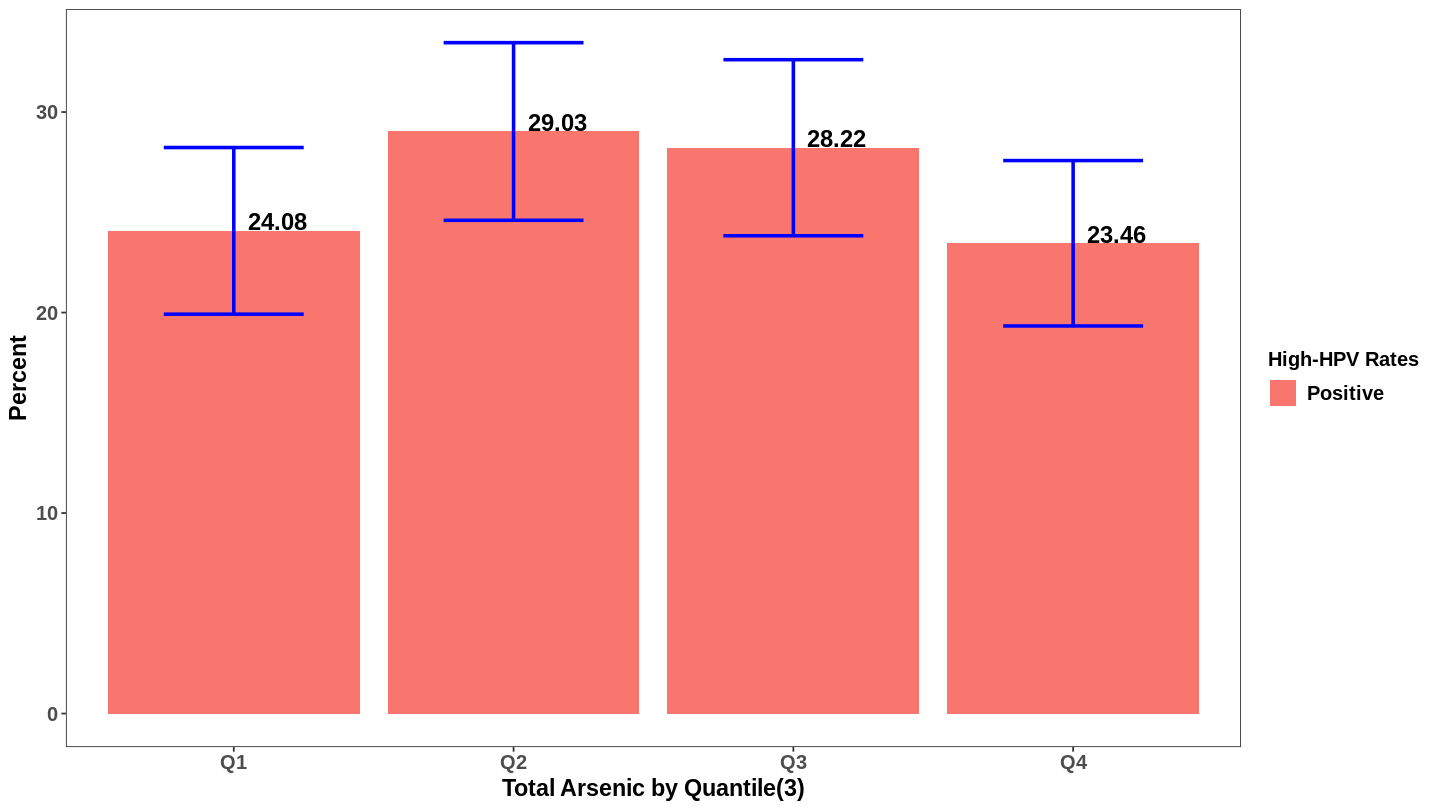

In [ ]:

high_hpv_var = HSV_df %>% select(high.HPV,TUA2.q) %>% group_by(TUA2.q, high.HPV) %>%
  summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA2.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(high.HPV, .add=TRUE) %>%
  mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100)

high_hpv_var

cat("\n\n\n")

high_hpv_var = high_hpv_var %>% filter(high.HPV == "Positive")  

ggplot(high_hpv_var, aes(x = factor(TUA2.q), y = Percentage, fill = factor(high.HPV))) +
  geom_bar(position="dodge", stat="identity", width = 0.9) +
  labs(x = "Total Arsenic by Quantile(3)", y = "Percent", fill = "High-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))




The bar plot above shows the percentage proportion of total arsenic by quantile(3) that tested positive for high HPV, and their confidence intervals. The proportion in first quantile was 4.02 percent, second quantile was 3.78 percent, third quantile was 5.28 percent, and fourth quantile was 3.44 percent. 

 

### **Low HPV Section**

In [ ]:

HSV_df = HSV_df_backup_postprep
HSV_df = HSV_df %>% filter(low.HPV != "NA") %>% filter(TUA2.q!= "NA") %>% filter(grepl("Q", TUA2.q ))

HSV_df %$% freq(TUA2.q)


TUA2.q,Freq,% Freq
<fct>,<int>,<dbl>
Q1,407,25.13897
Q2,403,24.89191
Q3,404,24.95368
Q4,405,25.01544
Total,1619,100.00000


From the frequency table above, the Q1 (39.81) percent has the highest percentage of the total sample collected. 

In [ ]:

cat("\n\n\n")

defaultW <- getOption("warn")
options(warn = -1)

HSV_df %$% ctable_fn(x = low.HPV, y = TUA2.q)
tbl = HSV_df %$% table(low.HPV, TUA2.q)
chi_res = chisq.test(tbl)$p.value # Print p-value only.
fish_res = fisher.test(tbl, hybrid = TRUE)$p.value # Print p-value only.
options(warn = defaultW)
cat("\n\n")
cat(" Chi-Square Test P-value: ", round(chi_res, 5), "\n")
cat("Fisher Exact Test P-value: ", round(fish_res, 5), "\n")

cat("\n\n\n")


,Q1,Q2,Q3,Q4,Total
,<chr>,<chr>,<chr>,<chr>,<chr>
Negative,385 [ 23.78% ],375 [ 23.16% ],383 [ 23.66% ],381 [ 23.53% ],1524 [ 94.13% ]
Positive,22 [ 1.36% ],28 [ 1.73% ],21 [ 1.3% ],24 [ 1.48% ],95 [ 5.87% ]
Total,407 [ 25.14% ],403 [ 24.89% ],404 [ 24.95% ],405 [ 25.02% ],1619 [ 100% ]




 Chi-Square Test P-value:  0.71982 
Fisher Exact Test P-value:  0.72714 





For the Chi-square test above, the p-value (0.46) greater than significance level (0.05) indicates there is evidence to conclude that the low HPV prevelence is not associated with total arsenic by quantile(3) variable. 

In [ ]:

low_hpv_var = HSV_df %>% select(low.HPV,TUA2.q) %>% group_by(TUA2.q, low.HPV) %>%
 summarise(Count = n(), .groups = 'drop') %>% 

  mutate(OverallPercentage = Count/sum(.$Count) ) %>%
  mutate( OverallPercentage = round(OverallPercentage,4) * 100) %>%
  
  group_by(TUA2.q) %>% mutate(WithinGroupSum = sum(Count)) %>%
  group_by(low.HPV, .add=TRUE) %>%
   mutate(Percentage = Count/WithinGroupSum , Lower_CI = Percentage - 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum), Upper_CI = Percentage + 1.96 * sqrt( Percentage * {1 - Percentage} / WithinGroupSum)) %>%
  mutate( Percentage = round(Percentage,4) * 100, Lower_CI  = round(Lower_CI,4) * 100, Upper_CI = round(Upper_CI,4) * 100) 

low_hpv_var


TUA2.q,low.HPV,Count,OverallPercentage,WithinGroupSum,Percentage,Lower_CI,Upper_CI
<chr>,<fct>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Q1,Negative,385,23.78,407,94.59,92.40,96.79
Q1,Positive,22,1.36,407,5.41,3.21,7.60
Q2,Negative,375,23.16,403,93.05,90.57,95.53
Q2,Positive,28,1.73,403,6.95,4.47,9.43
Q3,Negative,383,23.66,404,94.80,92.64,96.97
Q3,Positive,21,1.30,404,5.20,3.03,7.36
Q4,Negative,381,23.53,405,94.07,91.77,96.37
Q4,Positive,24,1.48,405,5.93,3.63,8.23


The Q1 group (0.78) percent shows the highest positive rate for low HPV.



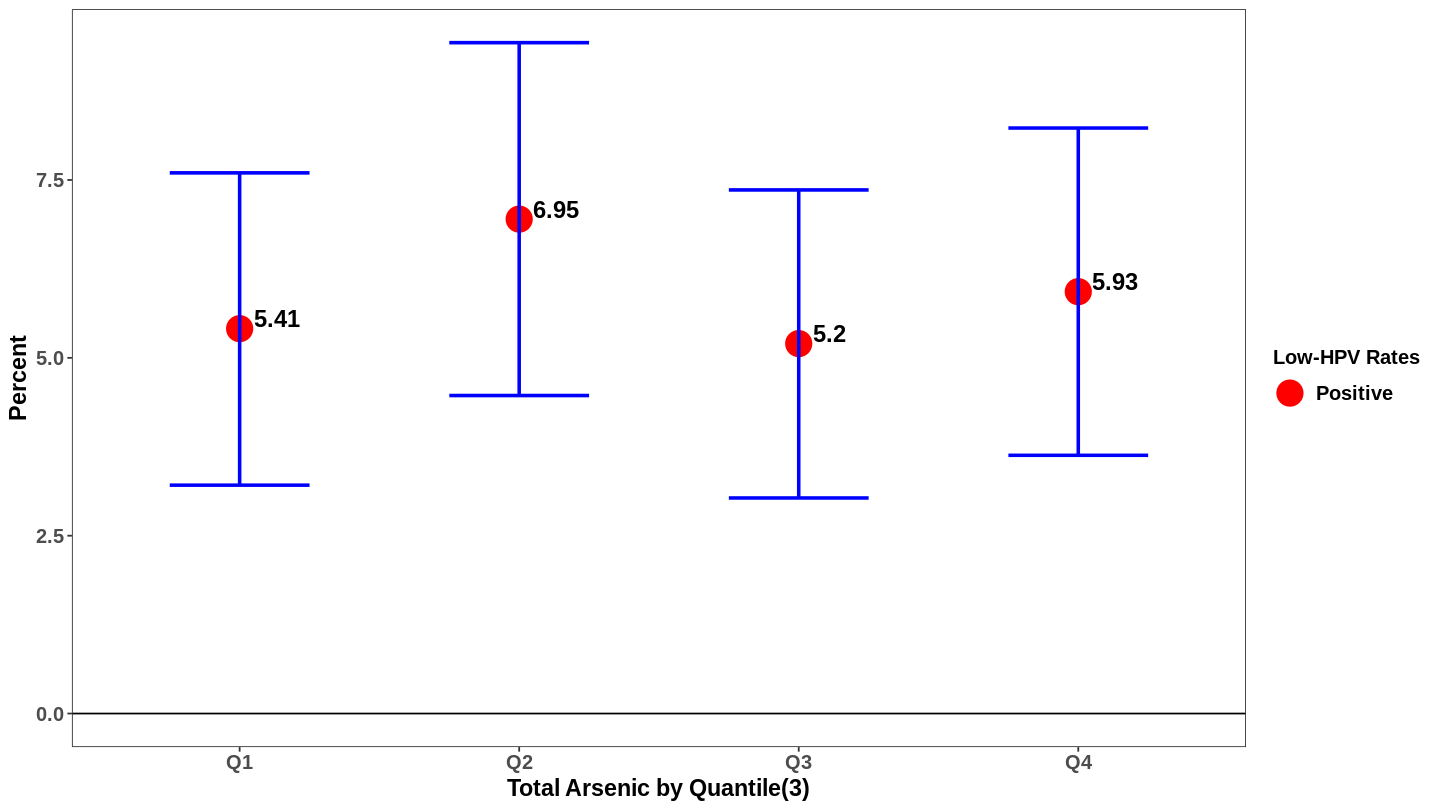

In [ ]:

cat("\n\n\n")

low_hpv_var = low_hpv_var %>% filter(low.HPV == "Positive")   

ggplot(low_hpv_var, aes(x = factor(TUA2.q), y = Percentage, fill = factor(low.HPV))) +
  #geom_bar(position="dodge", stat="identity", width = 0.9) +
  geom_point( colour = "red", size = 7) +
  geom_hline(yintercept = 0) +
  labs(x = "Total Arsenic by Quantile(3)", y = "Percent", fill = "Low-HPV Rates") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
  geom_text(aes(label = Percentage ), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5) +
  theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))








The plot above shows the percentage proportion of total arsenic by quantile(2) that tested positive for high HPV, and their confidence intervals. The proportion in first quantile was 0.78 percent, second quantile was 0.57 percent, third quantile was 0.40 percent, and fourth quantile was 0.29 percent. 

 